## Load required package

In [52]:
# ---------------------------------------------------------------------
#  ⬇  Required packages
# --------------------------------------------------------------------

suppressPackageStartupMessages({
suppressWarnings(library(tidyverse))
library(lubridate)
})

In [53]:
df <- read_csv('./data/model_data.csv', show_col_types = FALSE)%>%
        rename(Redemption_Count = `Redemption Count`,
                Sales_Count = `Sales Count`,
                Max_Temp = `Max Temp (°C)`,
                Min_Temp = `Min Temp (°C)`,
                Mean_Temp = `Mean Temp (°C)`,
                Heat_Deg_Days = `Heat Deg Days (°C)`,
                Total_Precip = `Total Precip (mm)`
                )

head(df)

# Convert Timestamp to Date format
df$Timestamp <- as.Date(df$Timestamp)

Timestamp,Redemption_Count,Sales_Count,month,quarter,year,dayofweek,dayofyear,Redemption_lag_1,Redemption_lag_7,⋯,is_covid,dayofweek_sin,dayofweek_cos,dayofyear_sin,dayofyear_cos,Max_Temp,Min_Temp,Mean_Temp,Heat_Deg_Days,Total_Precip
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-05-30,3054,3111,5,2,2015,0.8333333,0.4082192,4221,6401,⋯,0,0.6801727,0.7330519,0.007007912,0.9999754,28.0,11.9,20.0,0.0,22.5
2015-05-31,406,609,5,2,2015,1.0000000,0.4109589,3054,8208,⋯,0,0.7818315,0.6234898,0.007054944,0.9999751,11.9,7.4,9.7,8.3,20.5
2015-06-01,1116,1809,6,2,2015,0.0000000,0.4136986,406,1221,⋯,0,0.0000000,1.0000000,0.007101976,0.9999748,15.0,9.5,12.3,5.7,0.0
2015-06-02,3025,3234,6,2,2015,0.1666667,0.4164384,1116,2345,⋯,0,0.1490423,0.9888308,0.007149008,0.9999744,18.1,10.0,14.1,3.9,0.0
2015-06-03,2719,3977,6,2,2015,0.3333333,0.4191781,3025,1898,⋯,0,0.2947552,0.9555728,0.007196041,0.9999741,17.9,10.3,14.1,3.9,0.0
2015-06-04,3432,3683,6,2,2015,0.5000000,0.4219178,2719,2774,⋯,0,0.4338837,0.9009689,0.007243073,0.9999738,22.0,11.9,17.0,1.0,0.0


In [54]:
source('Model_Improved.R')

## Redemption Model Including Sales as Covariate

### Train Model

In [ ]:
rc_result1 <- run_cv_model(data = df, target_col = 'Redemption_Count', n_splits = 4, test_size = 365)

### Model Performance Metric Summary Table

In [ ]:
rc_result1$summary

,Base,RandomForest,LightGBM,XGBoost,Ensemble
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MSE,13287036.74,605444.68,375409.37,370161.07,375568.68
RMSE,3572.93,703.50,566.72,560.97,557.88
MAE,2005.14,379.49,309.98,307.48,307.79
MAPE,159.01,22.47,17.07,16.84,17.70
R2,-1.72,0.94,0.96,0.96,0.96


### Plot Observed vs Predictions

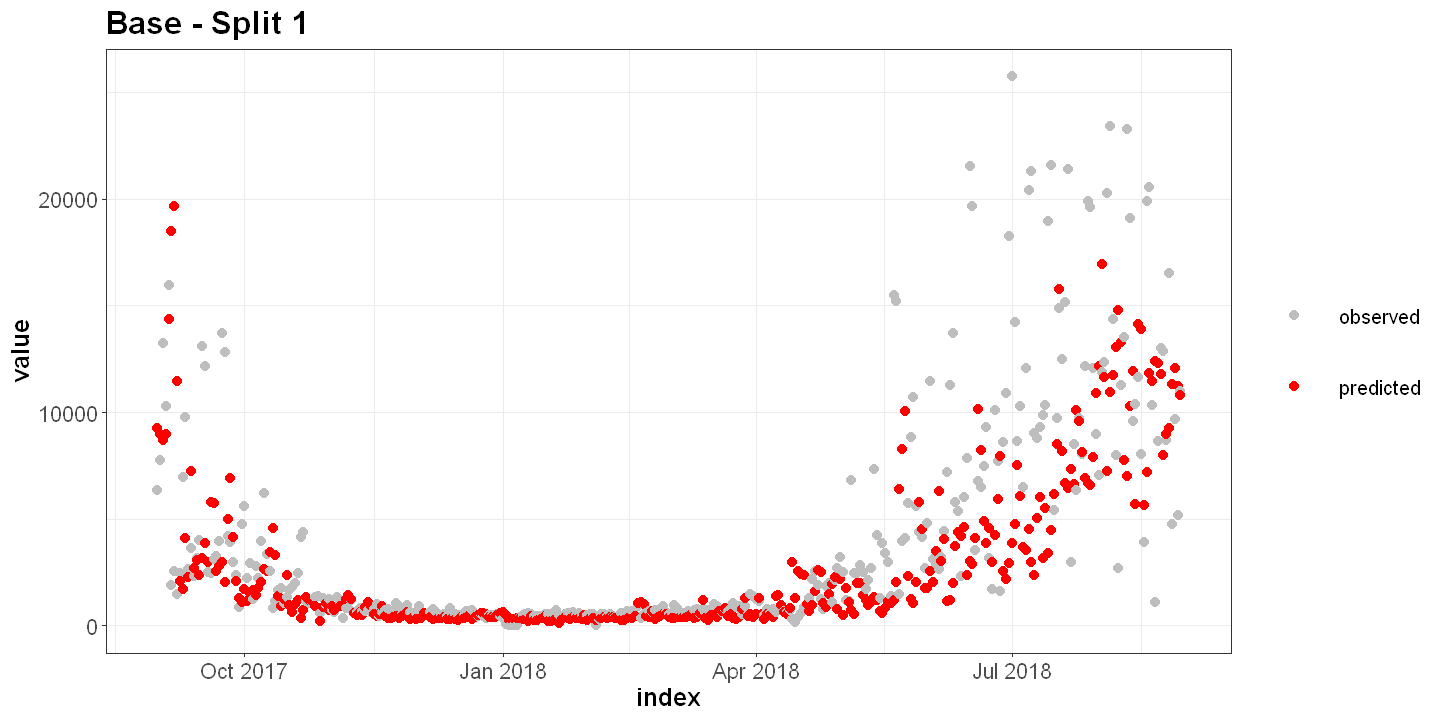

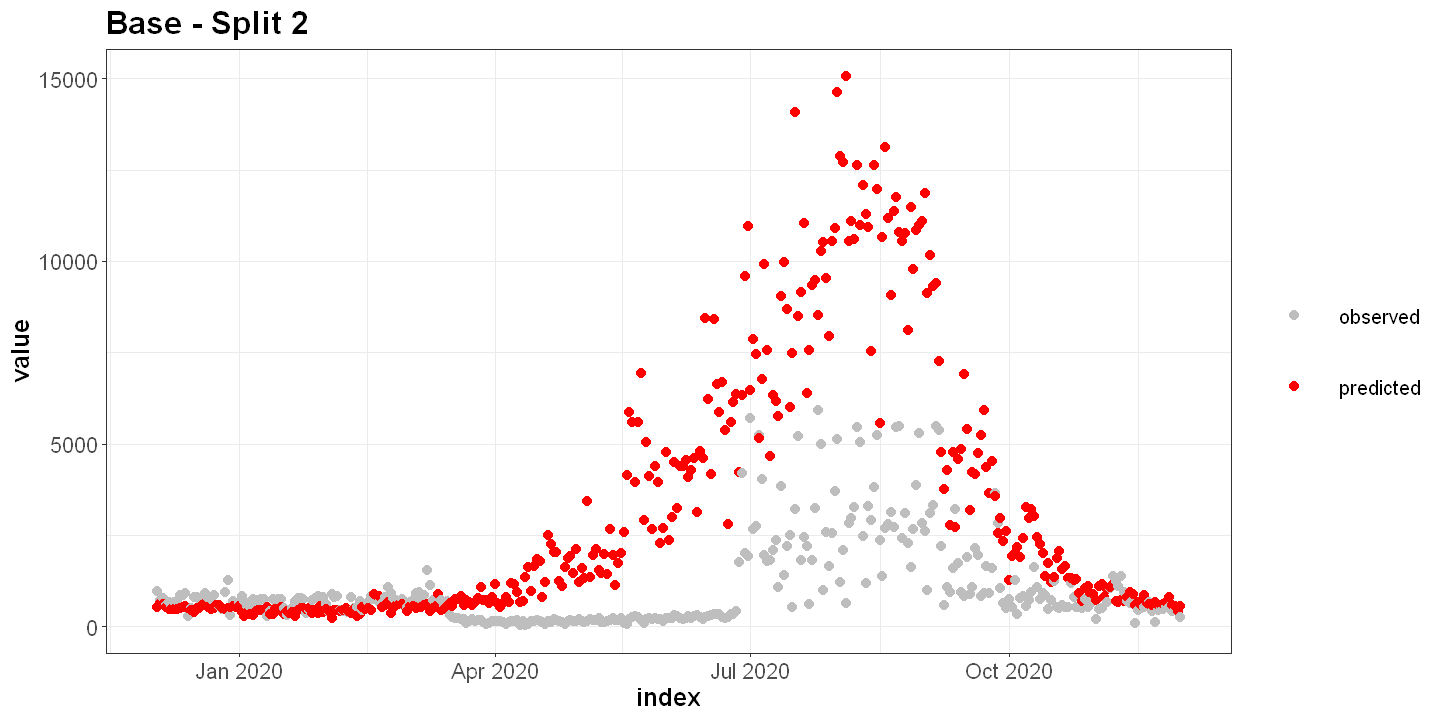

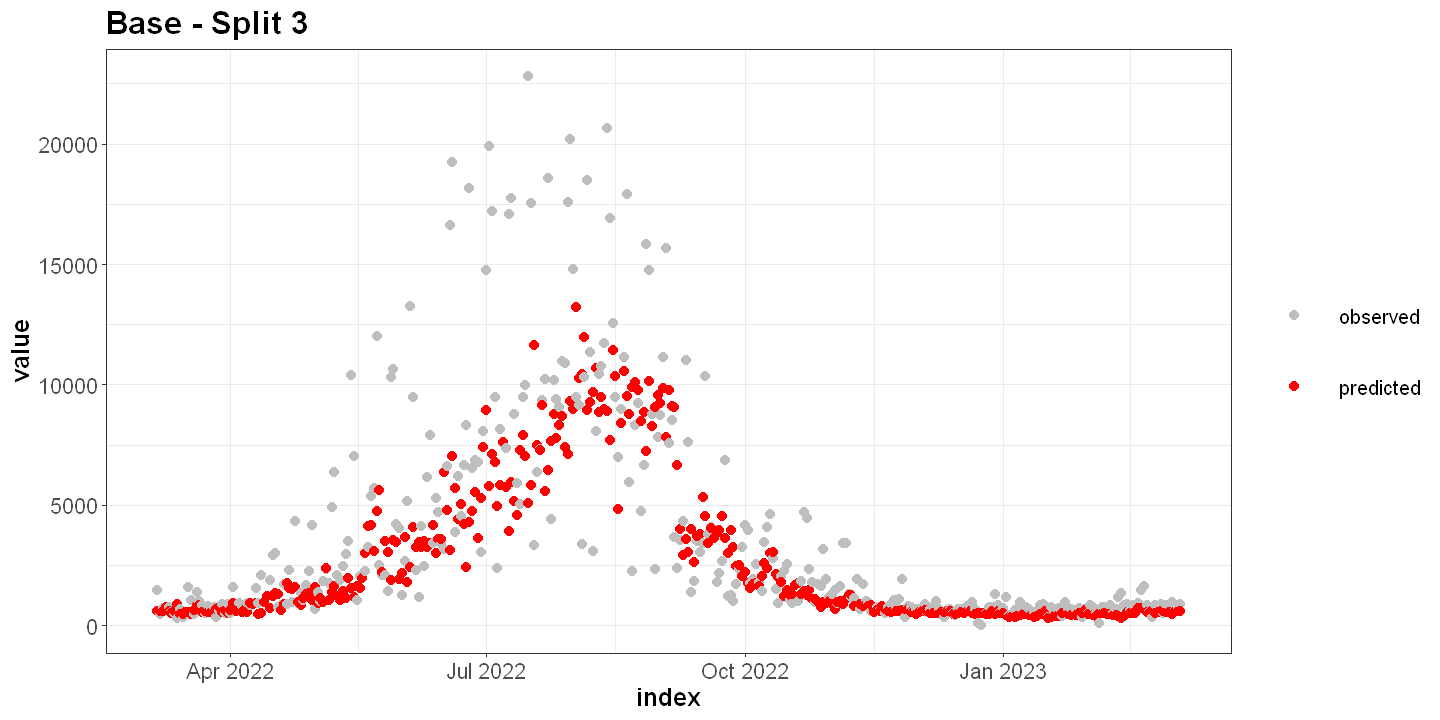

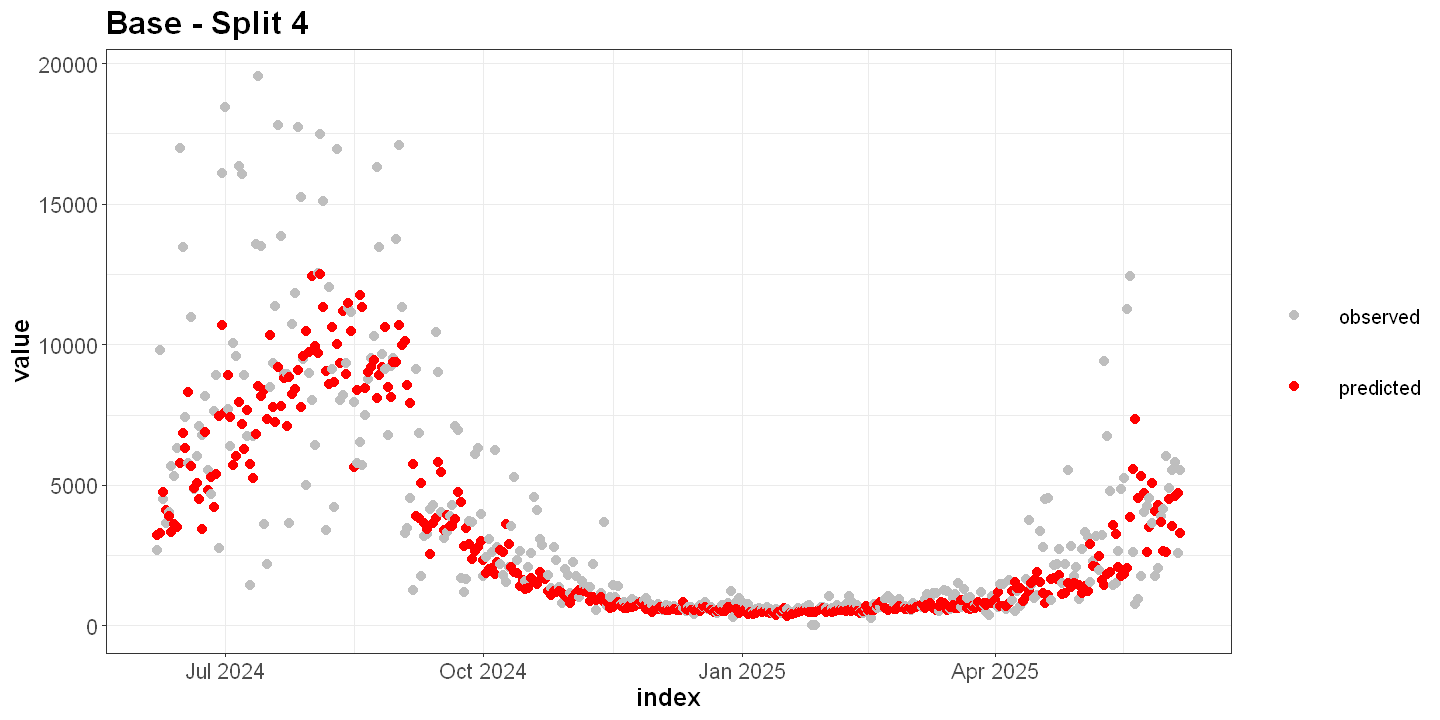

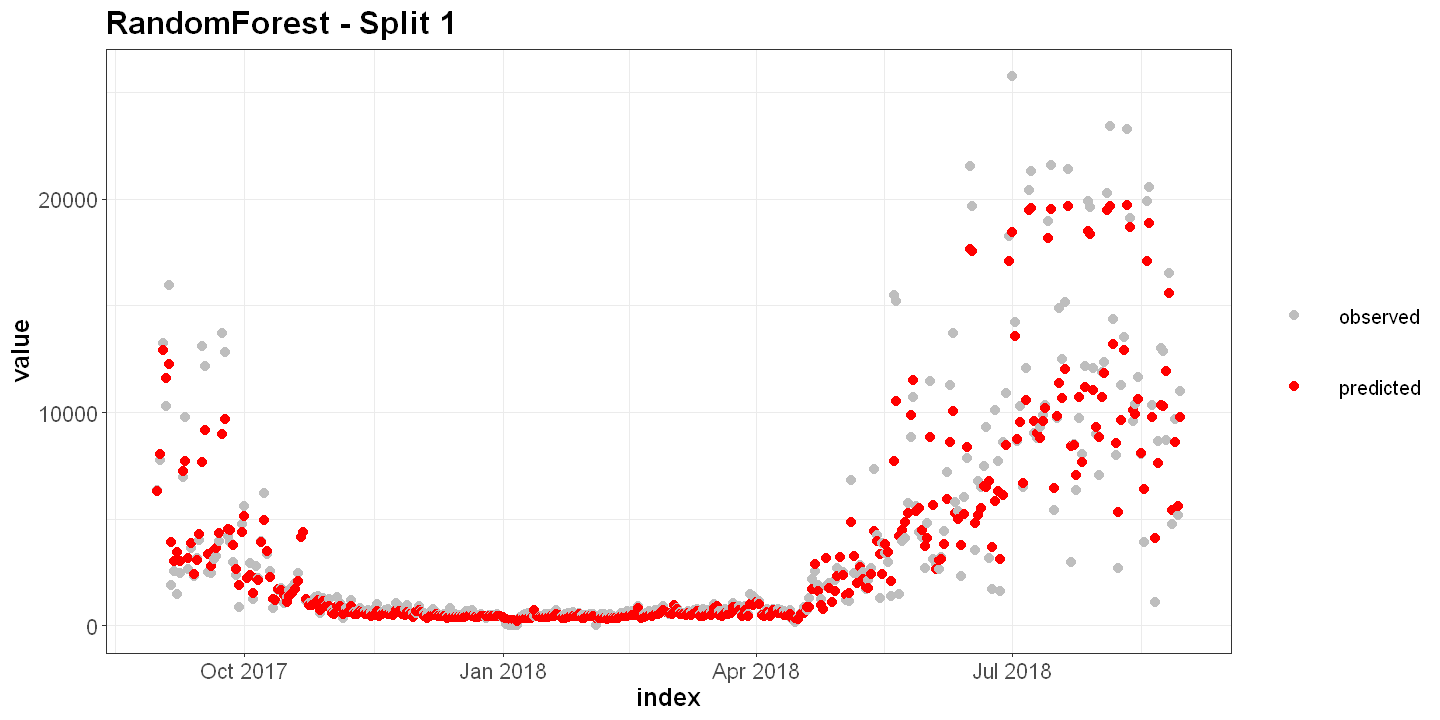

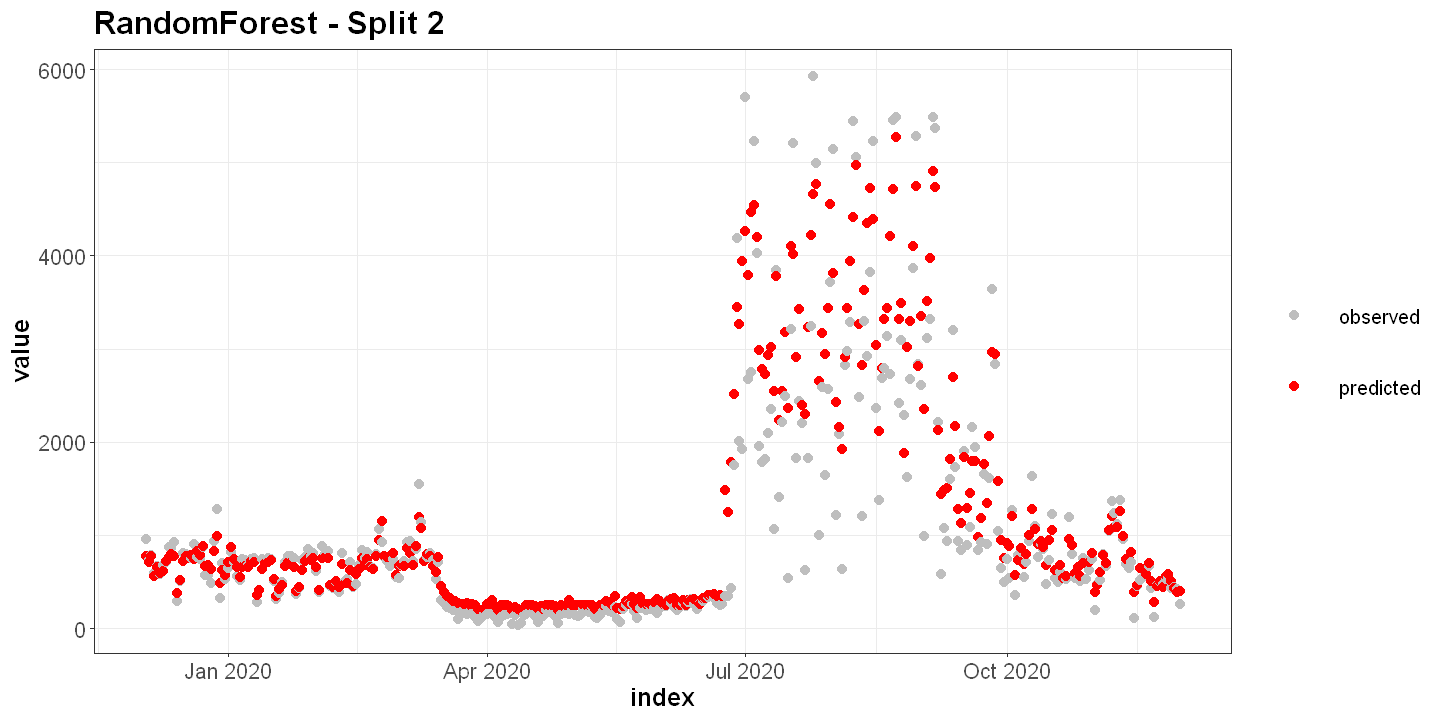

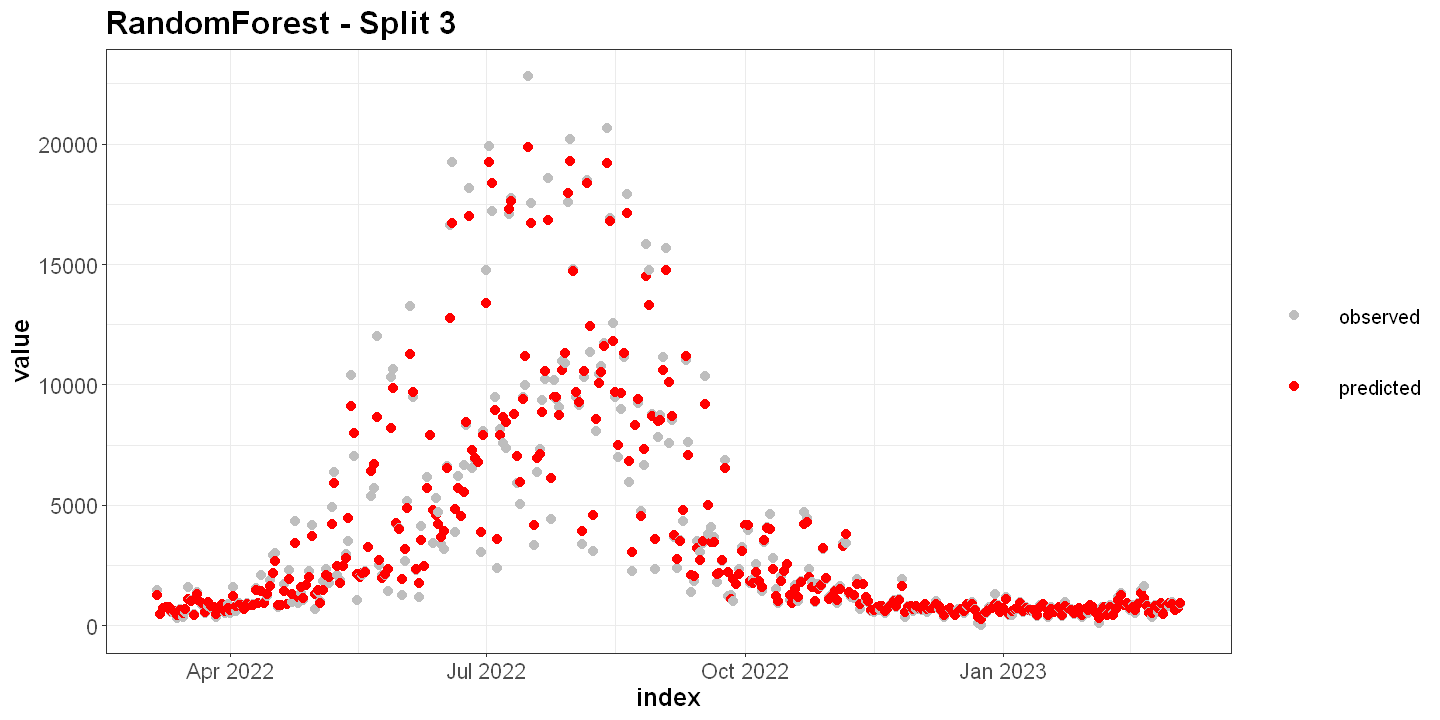

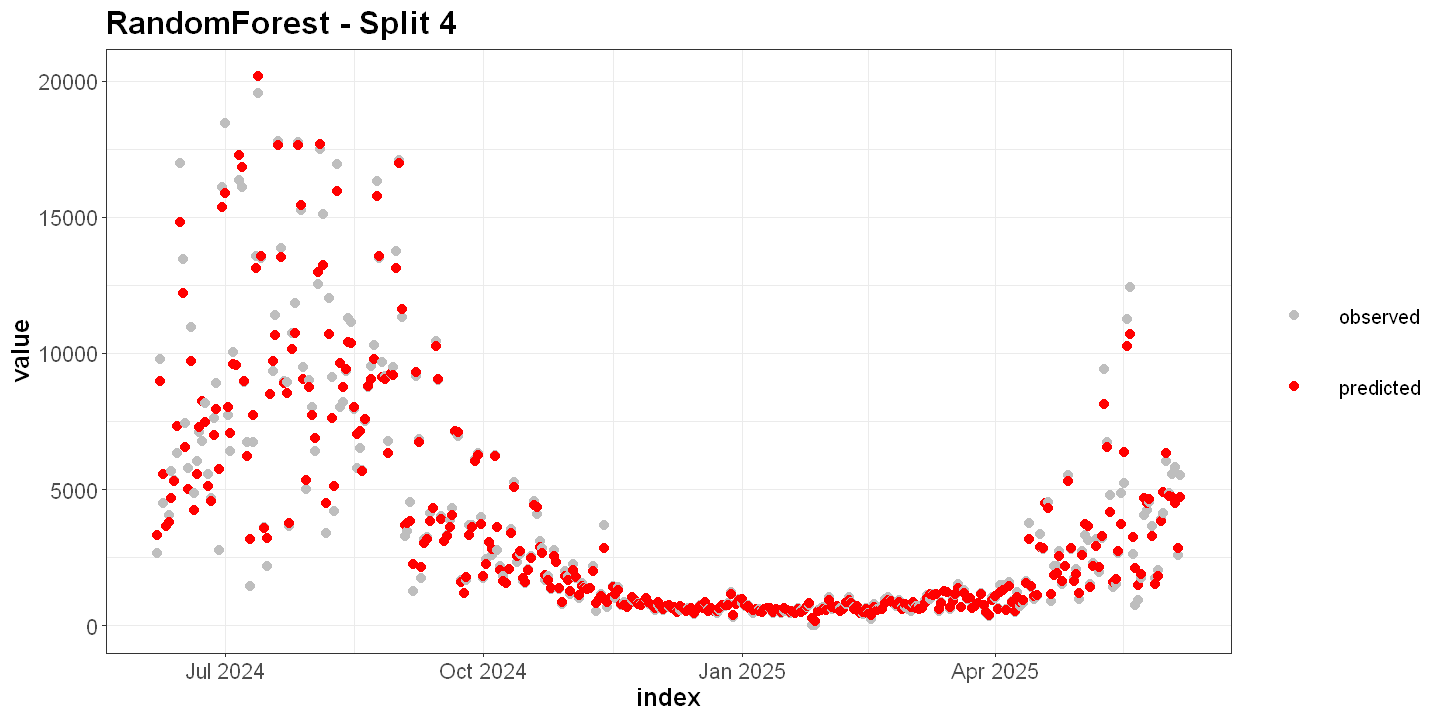

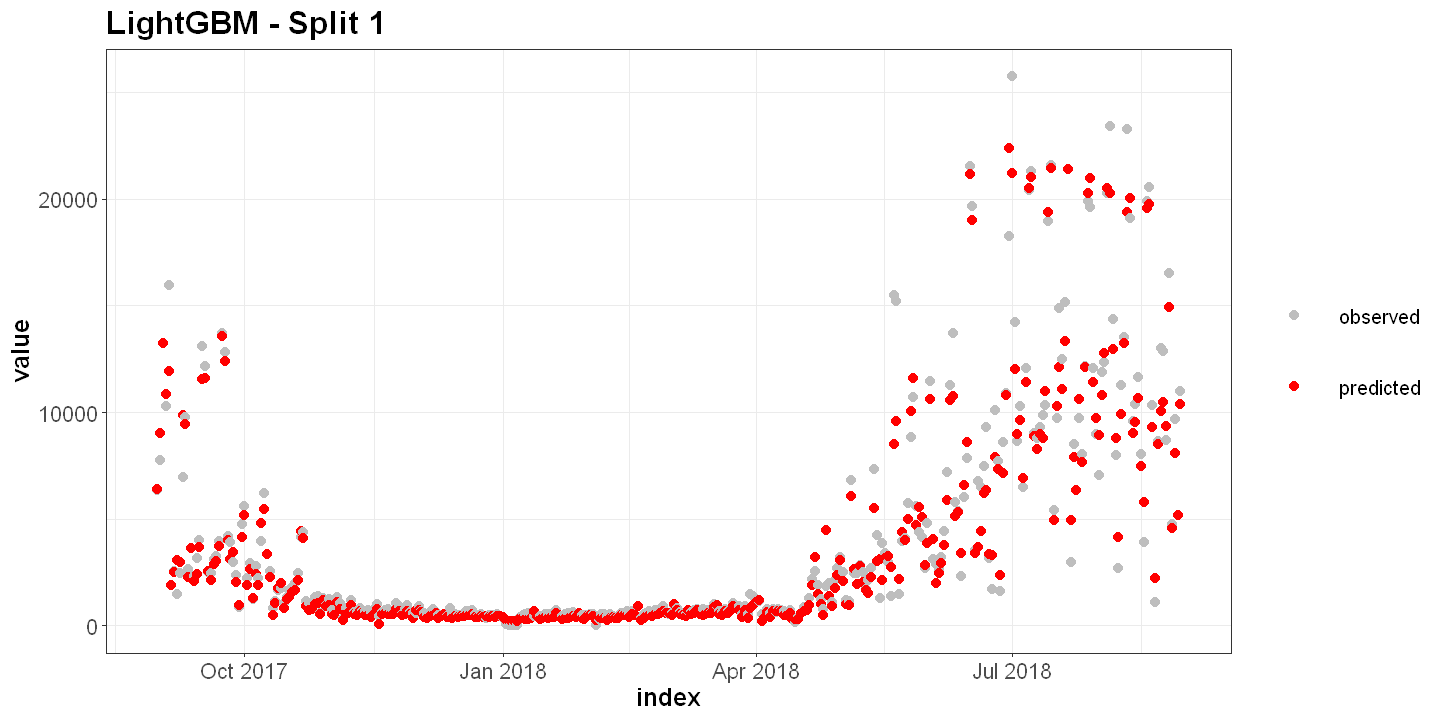

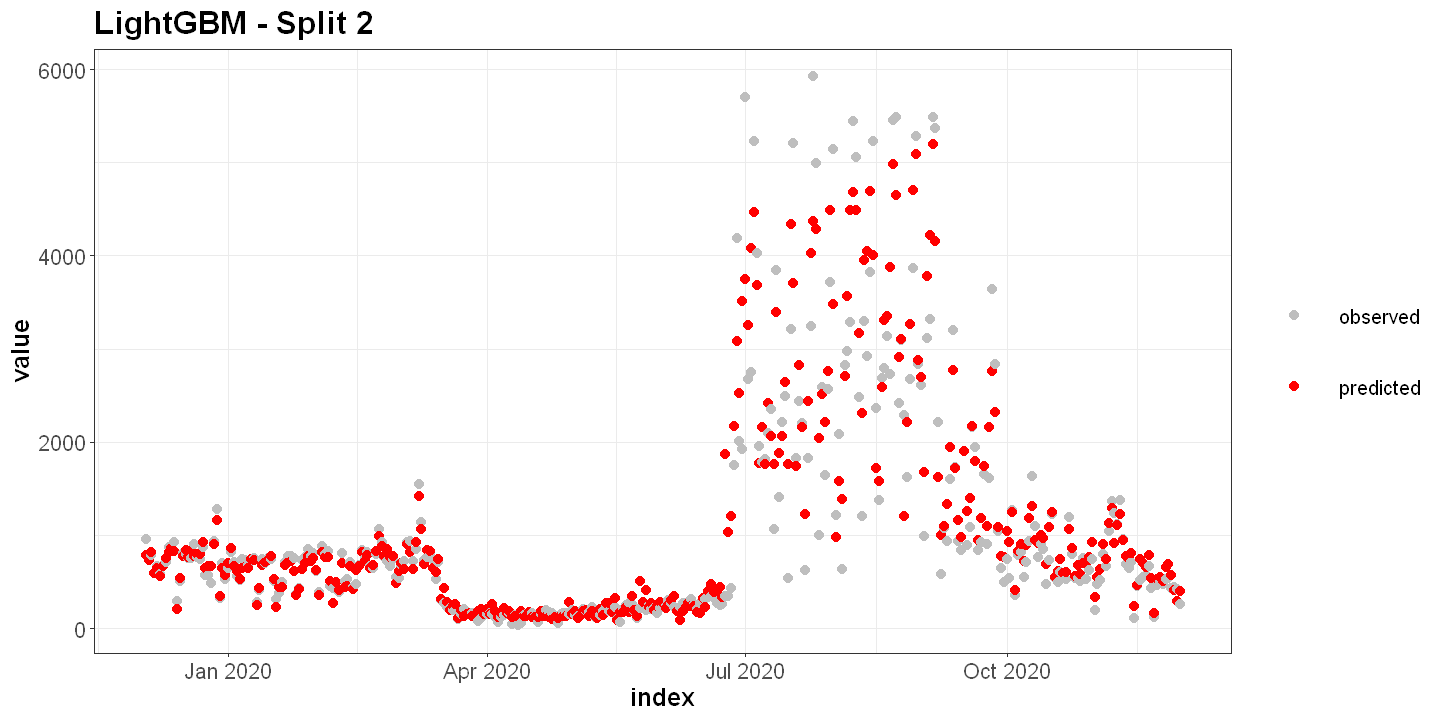

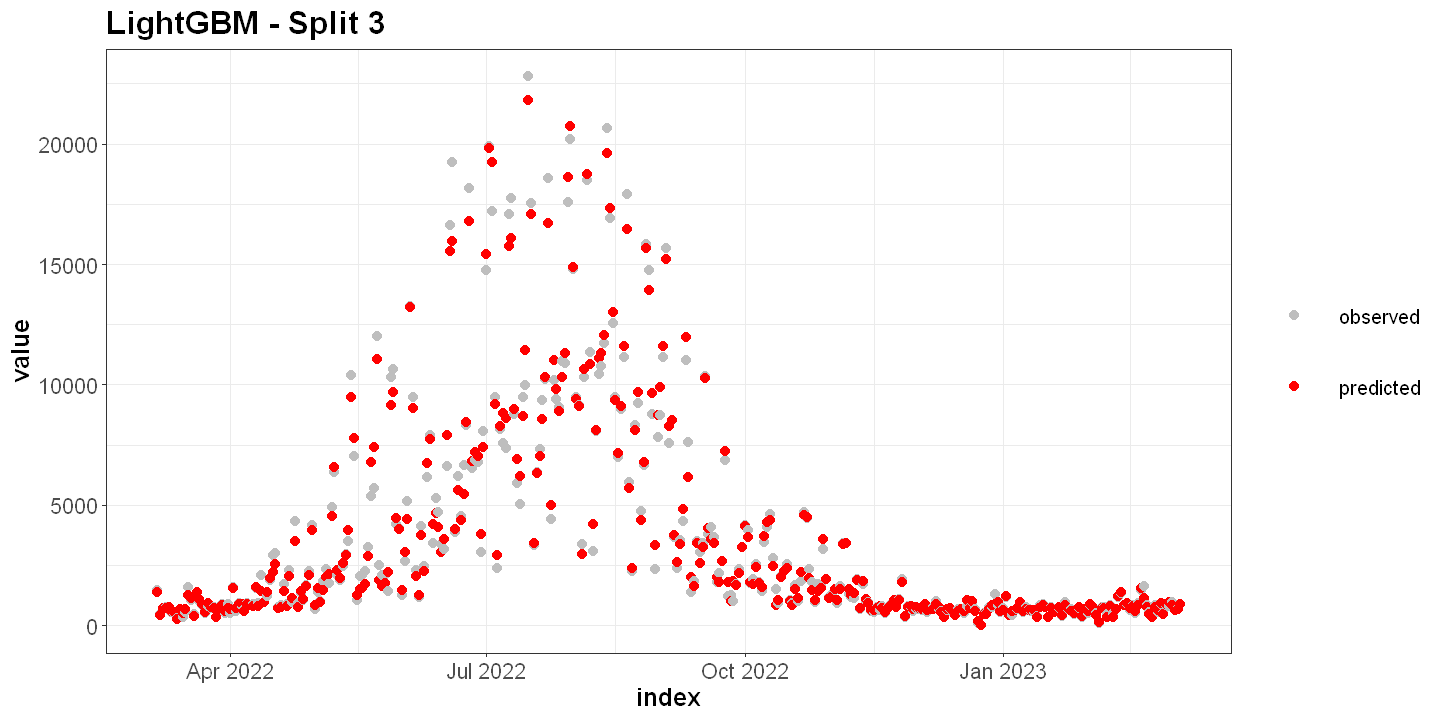

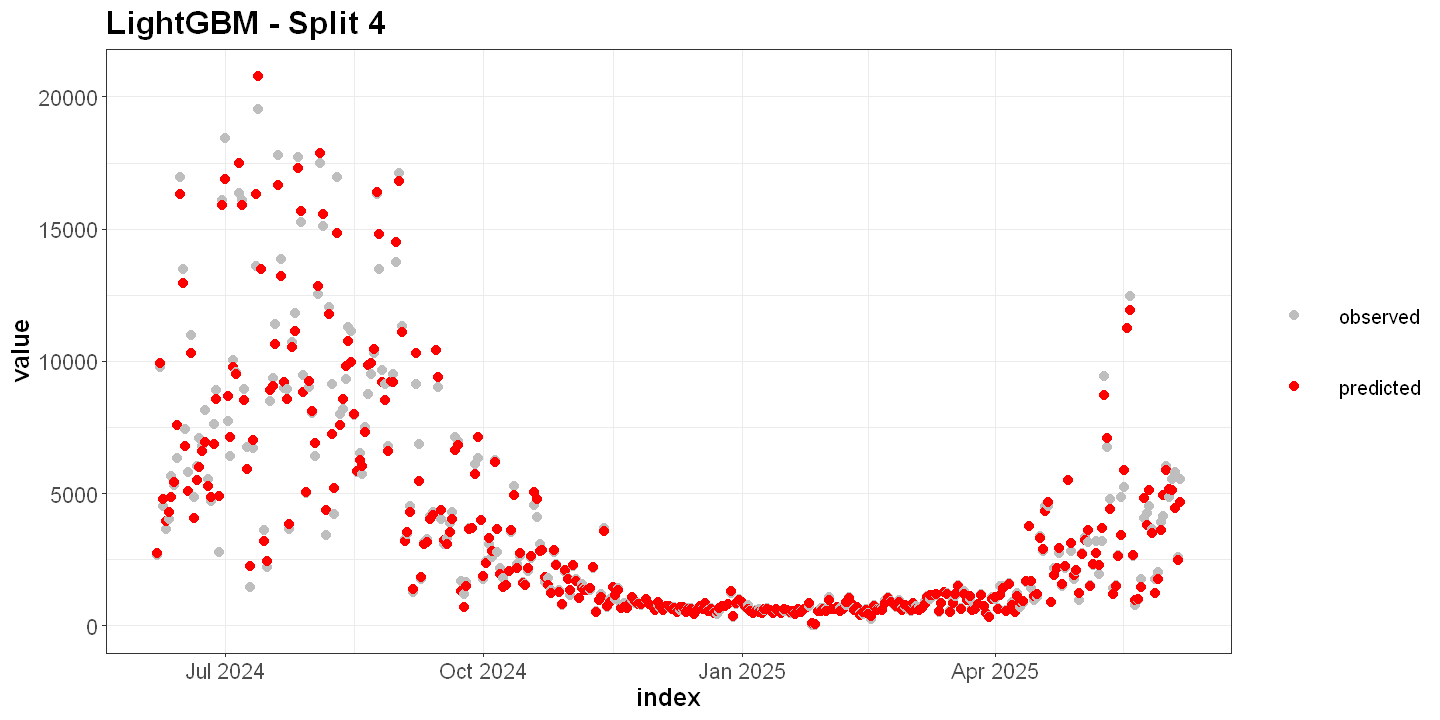

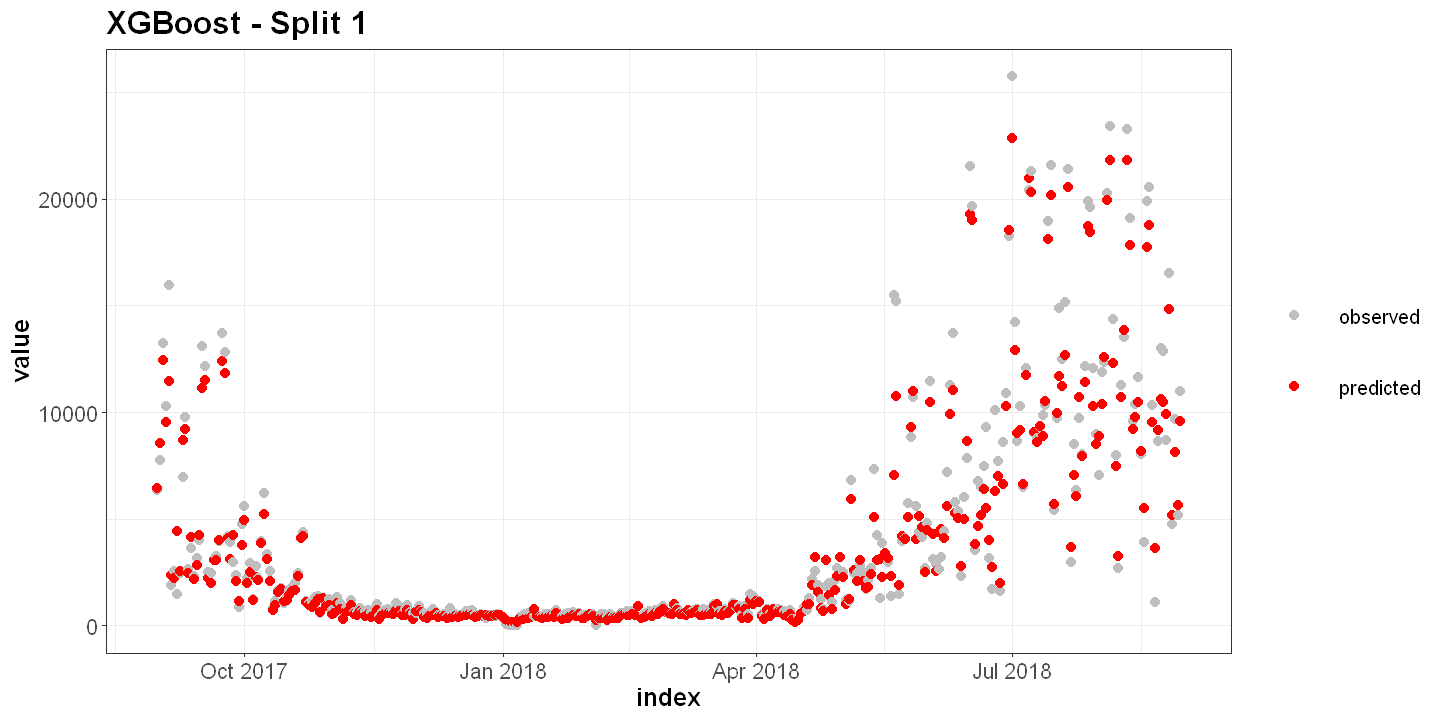

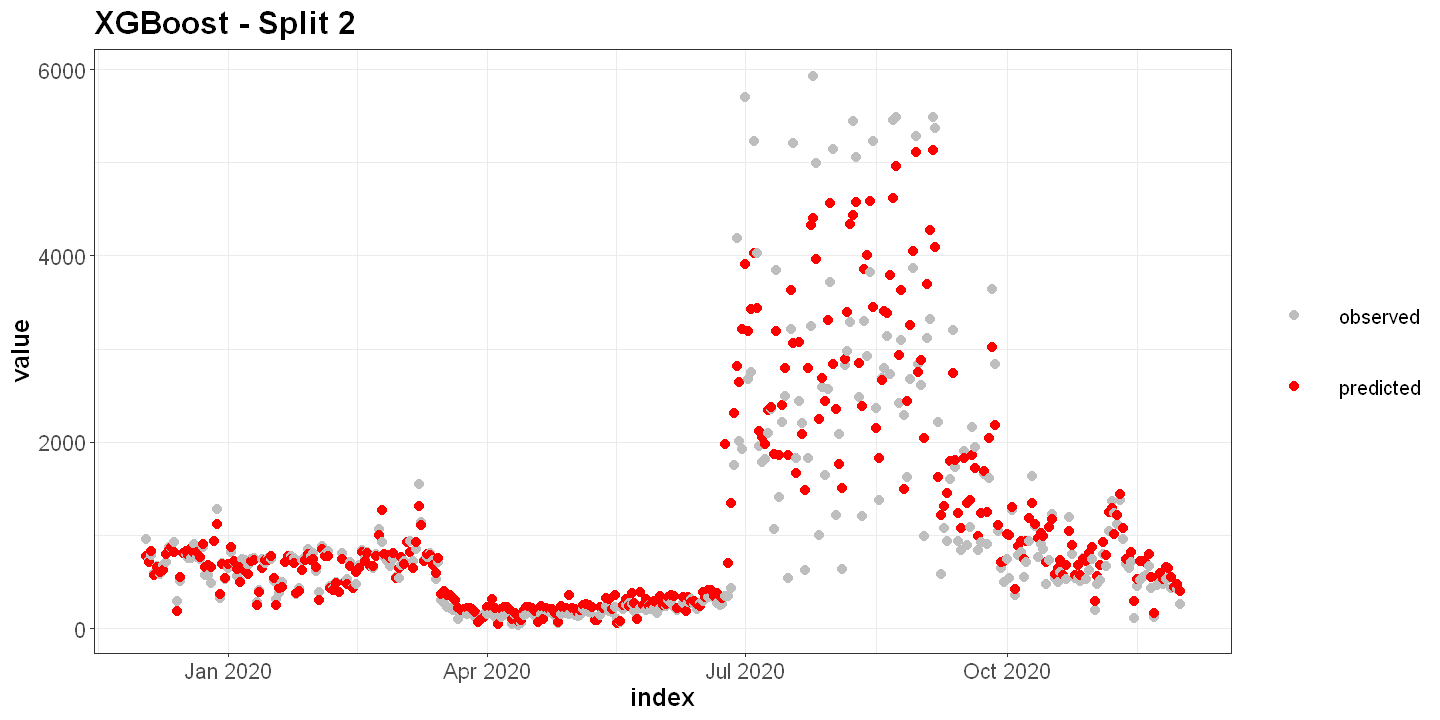

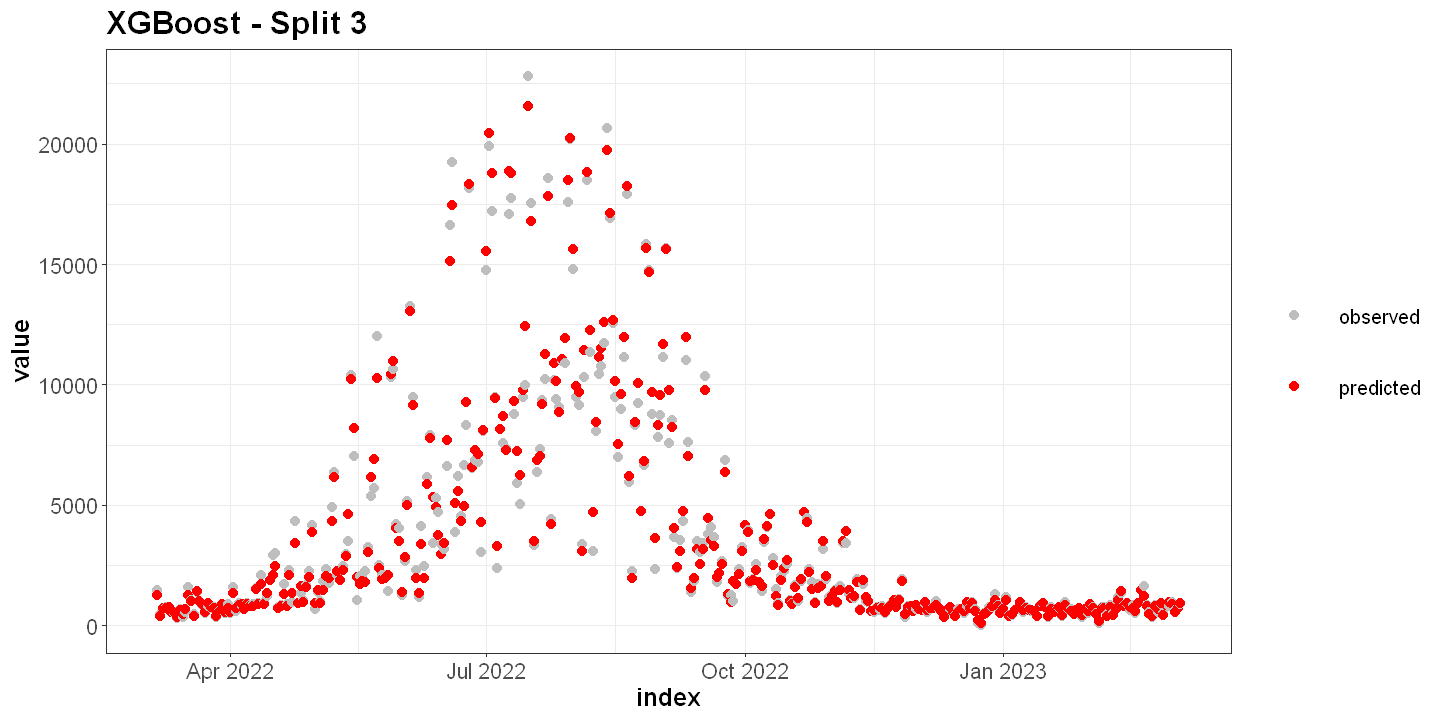

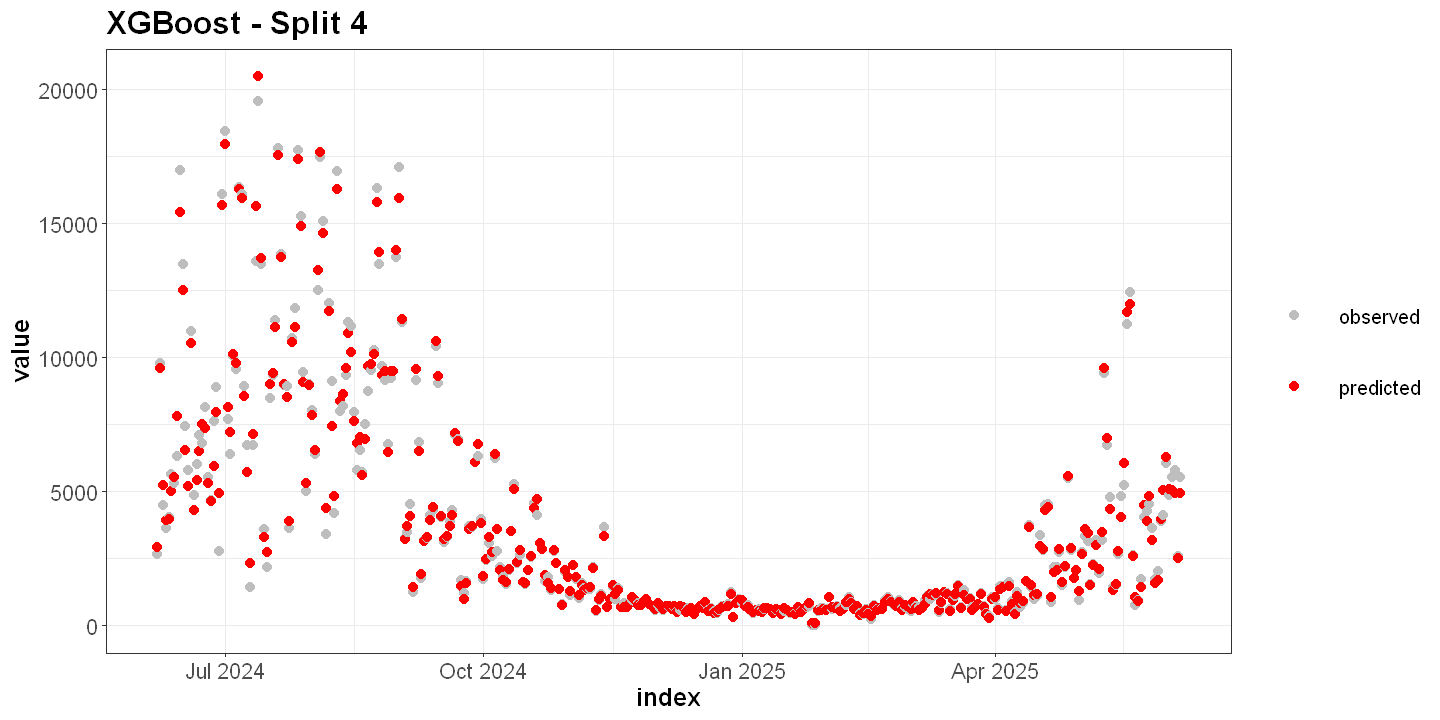

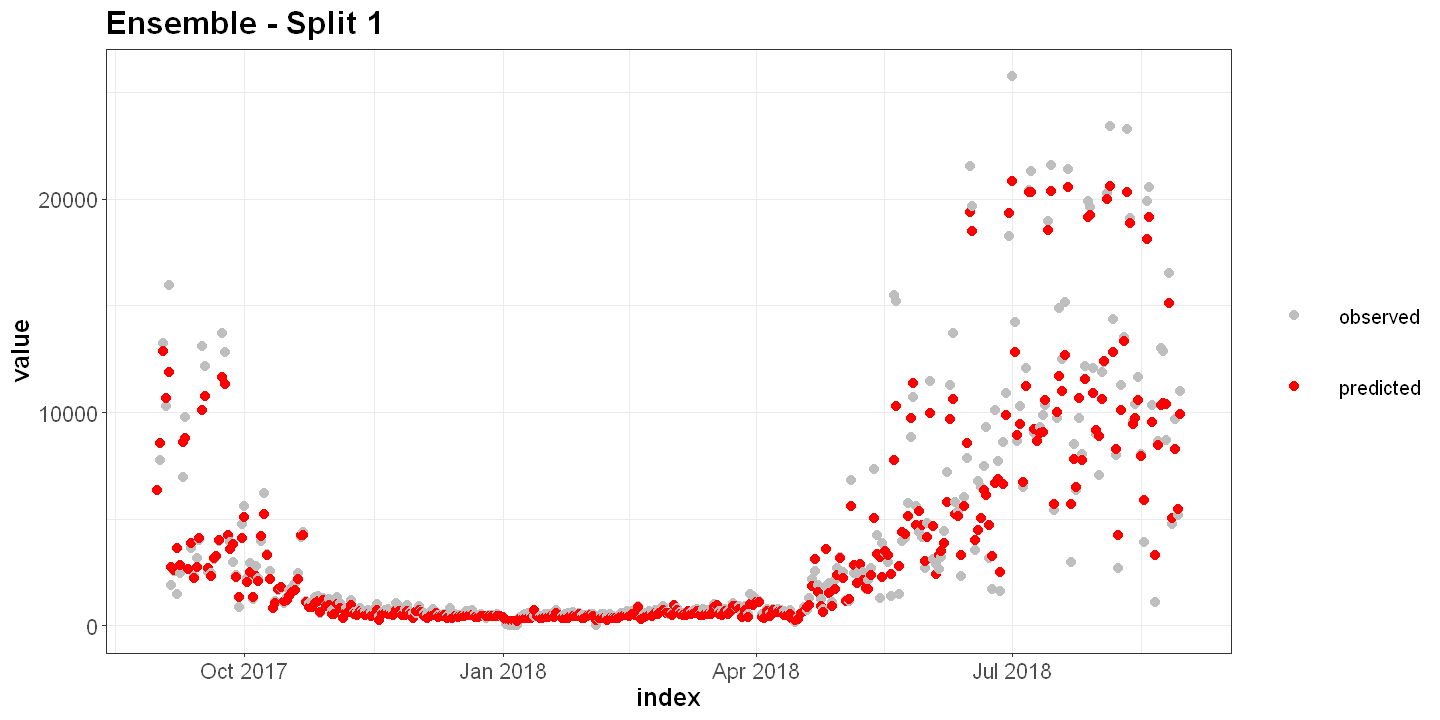

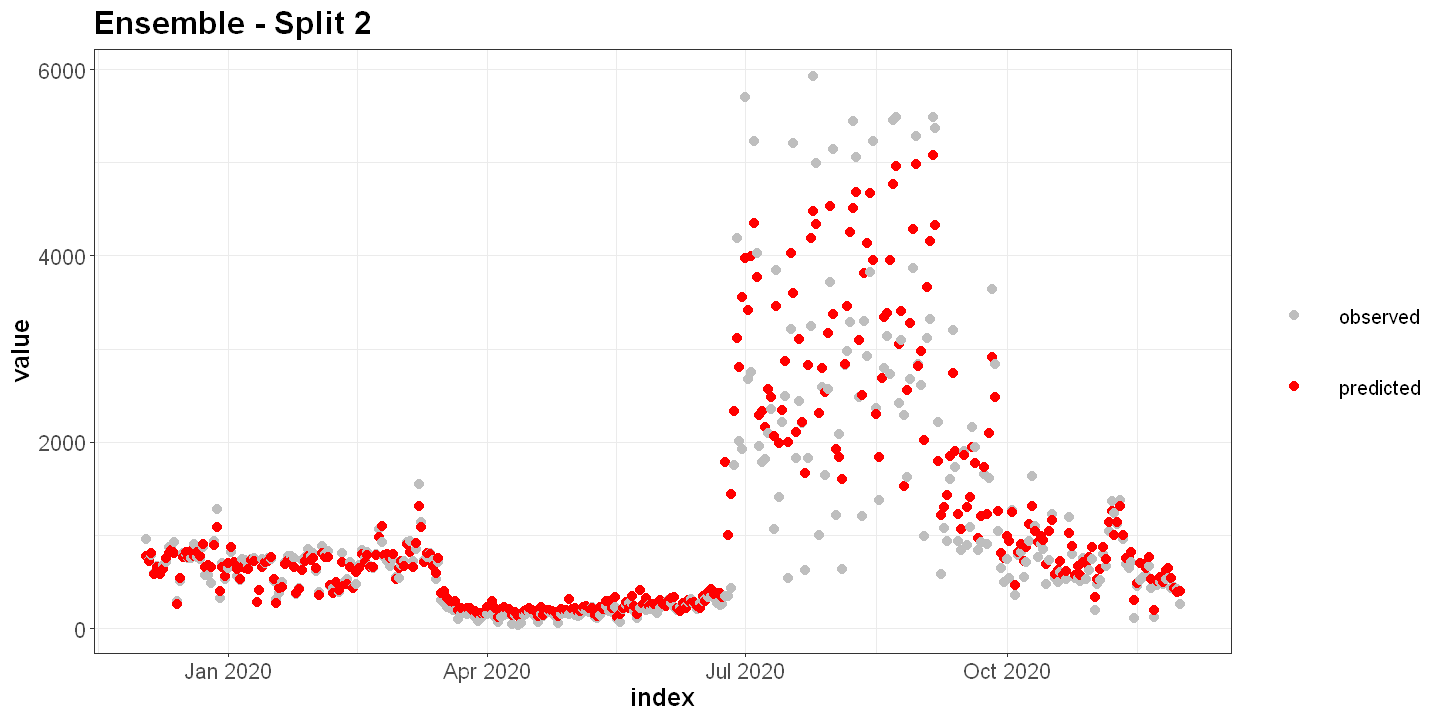

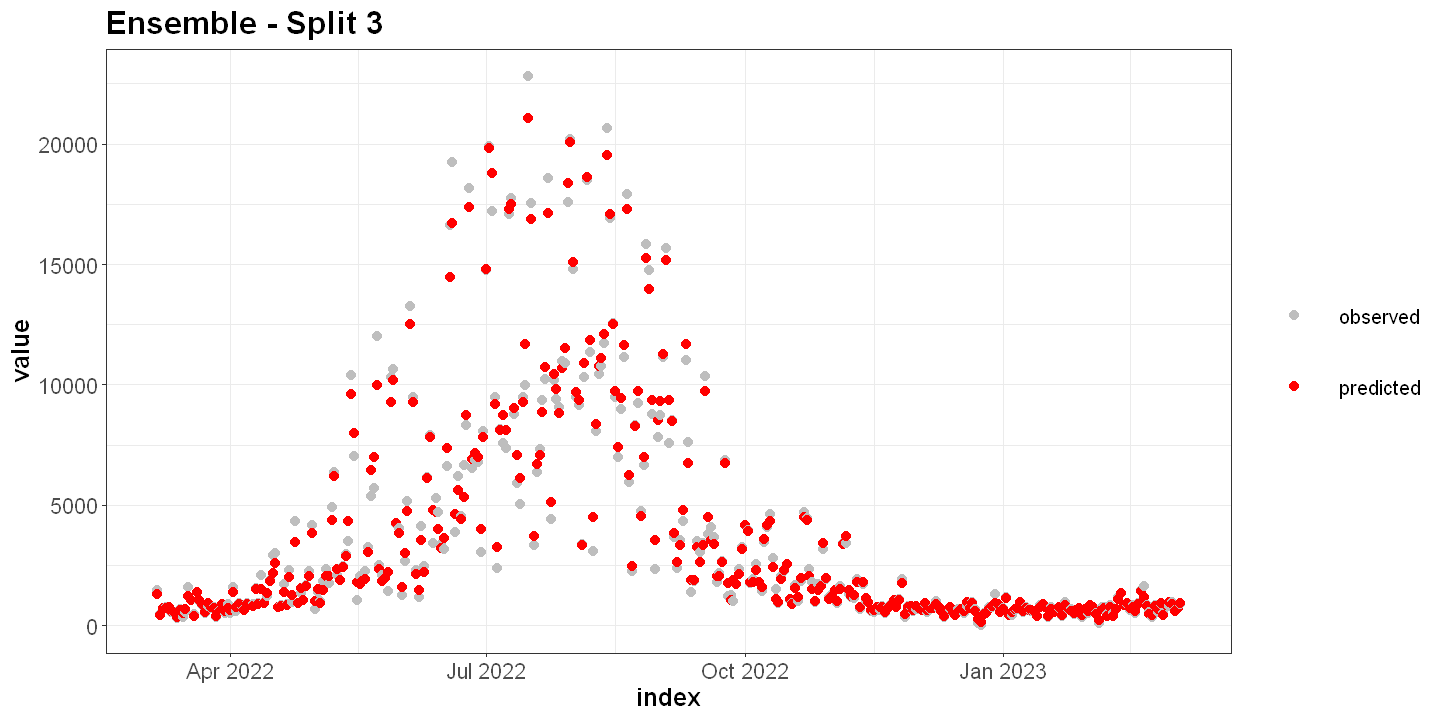

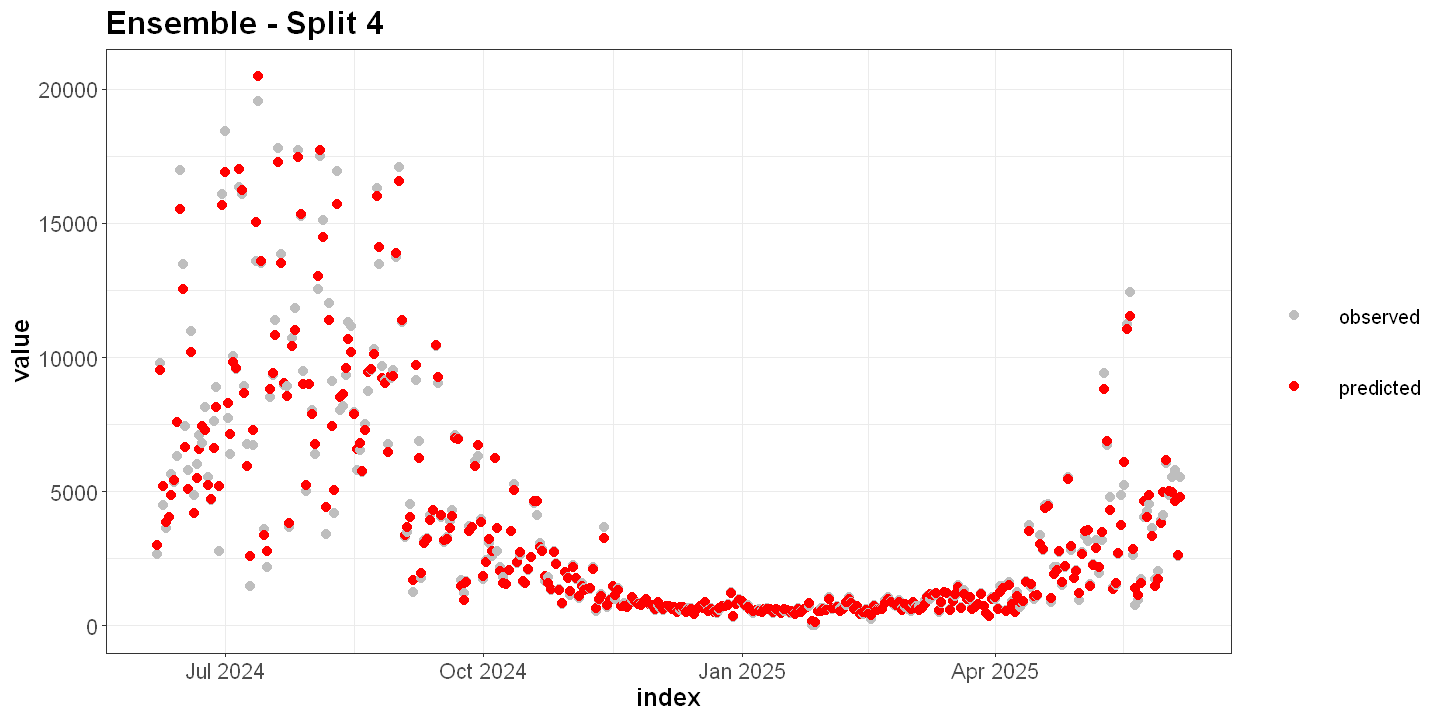

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot_predictions(data = df, preds = result$preds, target_col = "Redemption_Count")


### Plot Variable Importance

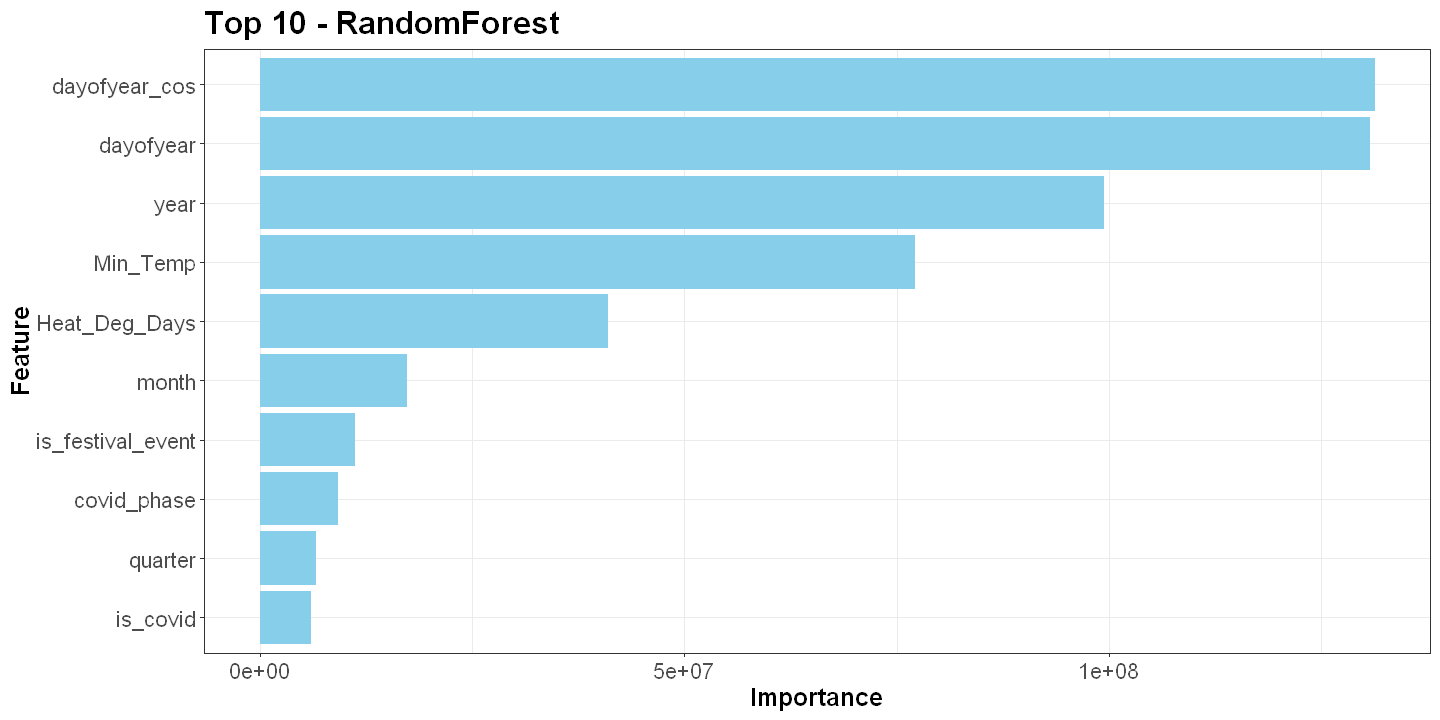

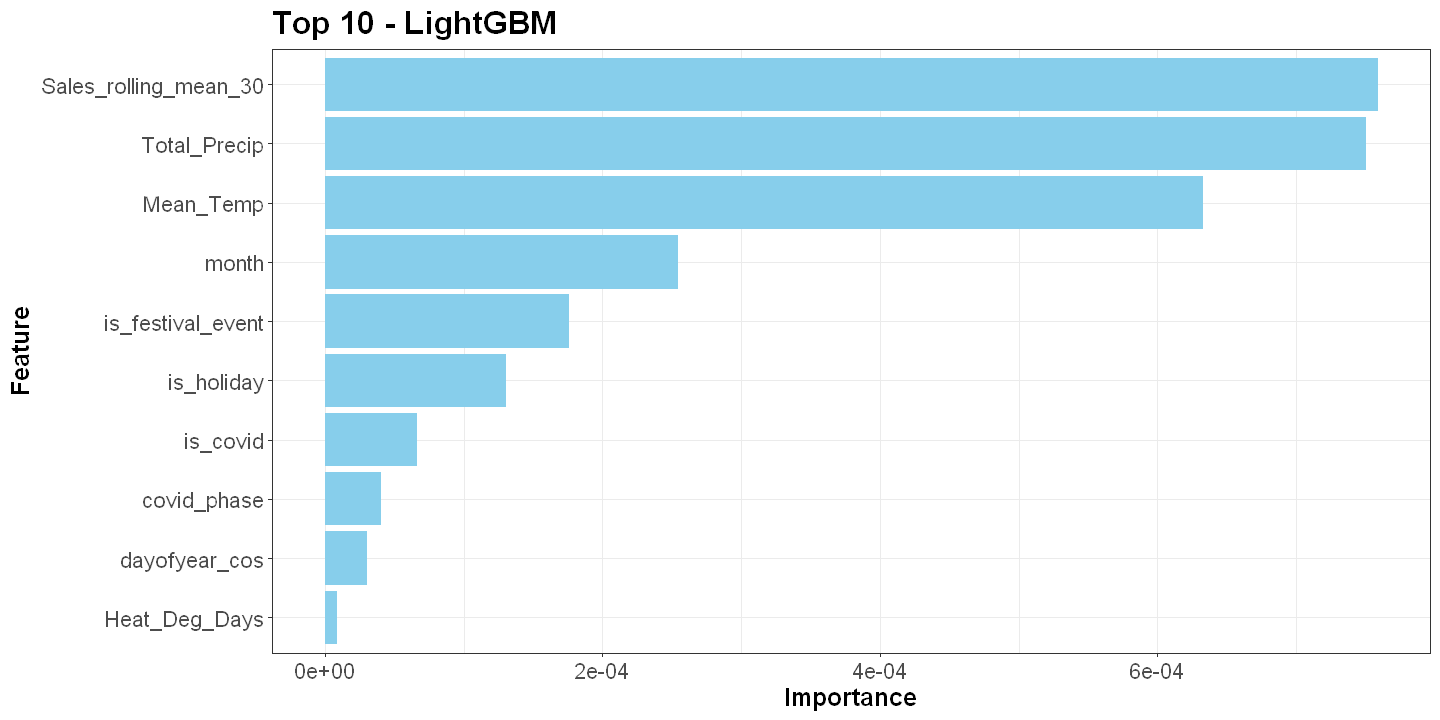

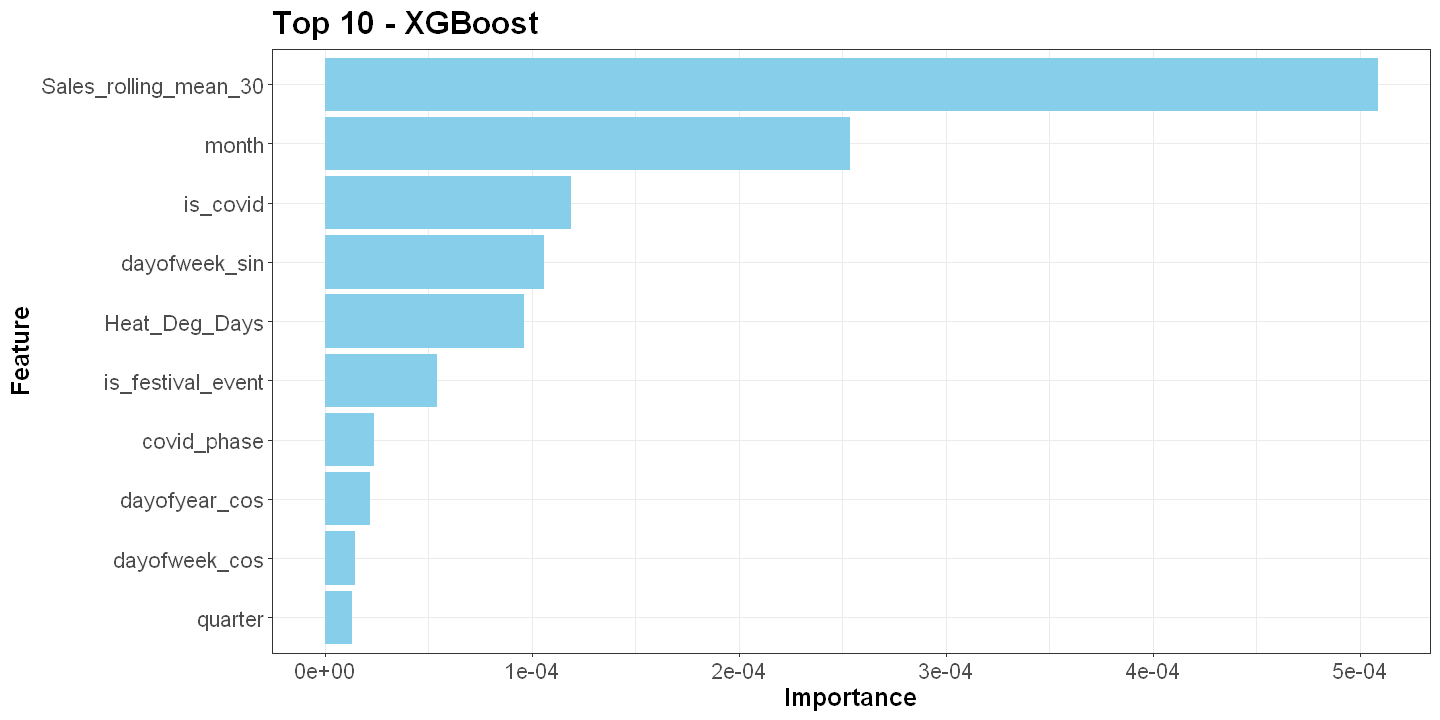

In [ ]:
#plot_feature_importance(result$importances)

## Redemption Model Excluding Sales as Covariate

###  Train Model

In [60]:
rc_result2 <- run_cv_model(data = df%>%dplyr::select(-Sales_Count), target_col = 'Redemption_Count', n_splits = 4, test_size = 365)

### Model Performance Metric Summary Table

In [61]:
rc_result2$summary

,Base,RandomForest,LightGBM,XGBoost,Ensemble
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MSE,13287036.74,2273256.68,2016075.41,1829354.80,1870823.67
RMSE,3572.93,1446.82,1362.70,1313.11,1319.05
MAE,2005.14,794.52,779.20,731.29,734.04
MAPE,159.01,43.29,43.37,48.53,43.79
R2,-1.72,0.80,0.81,0.79,0.81


### Plot Observed vs Predictions

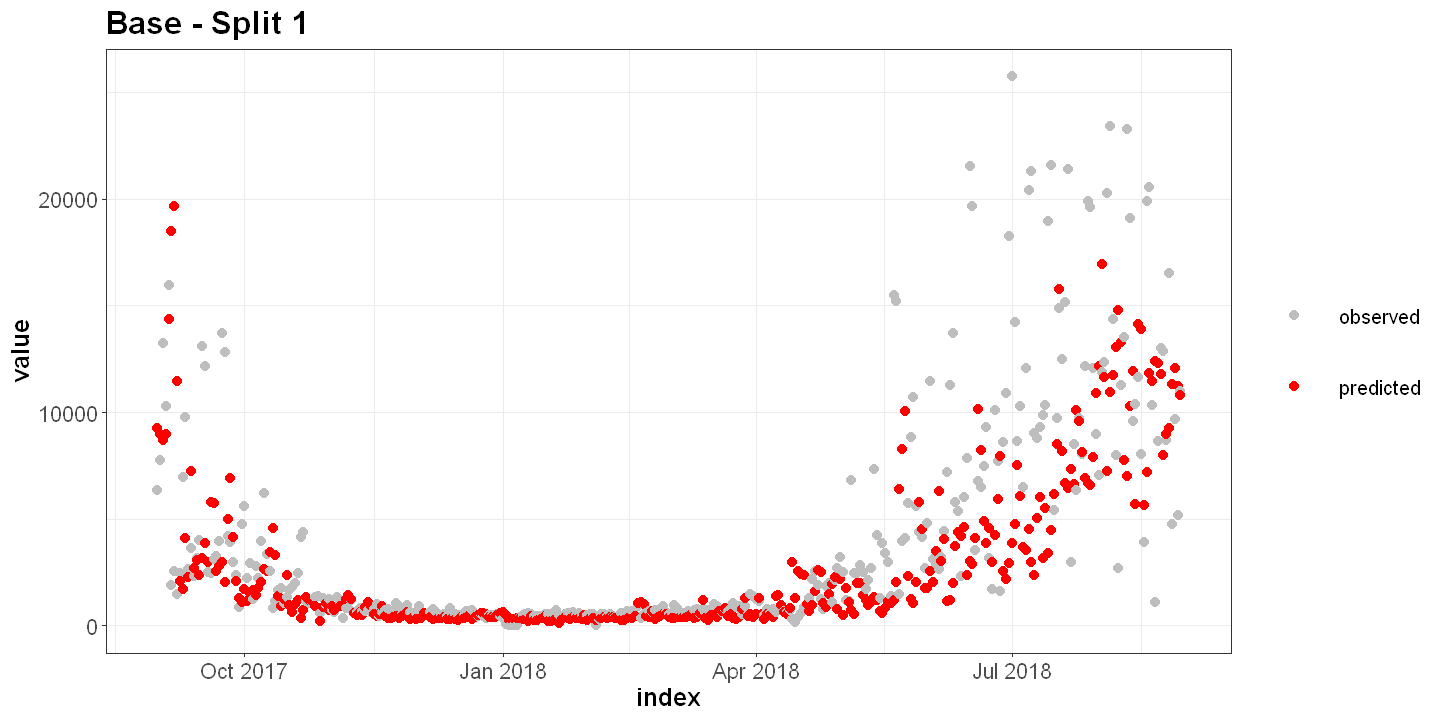

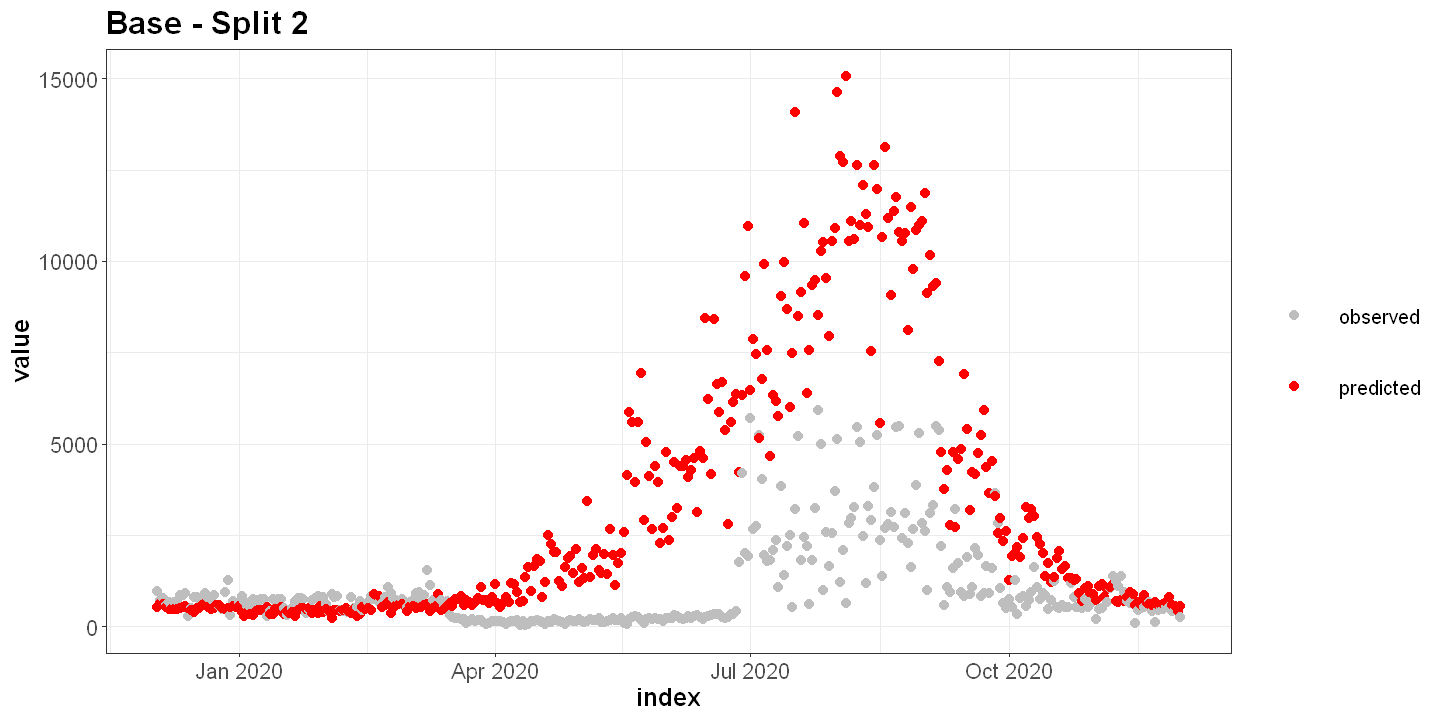

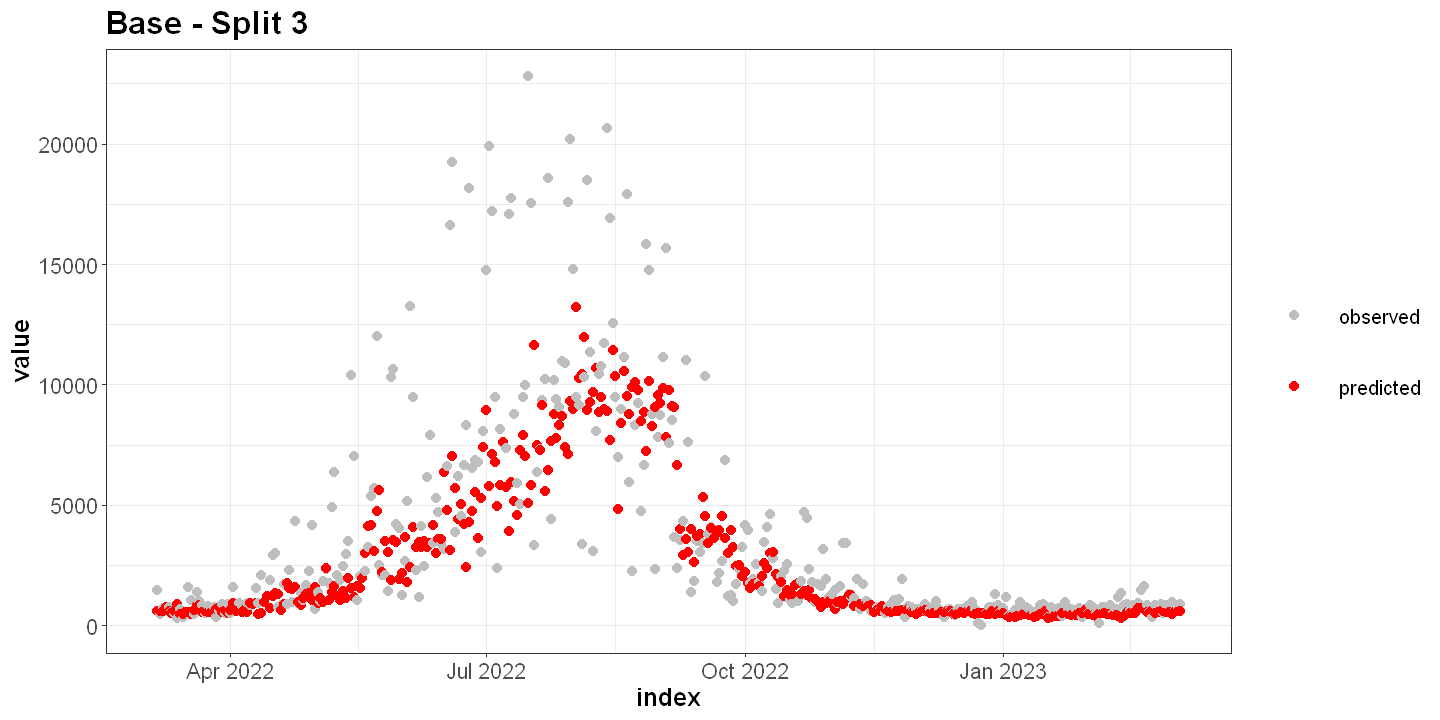

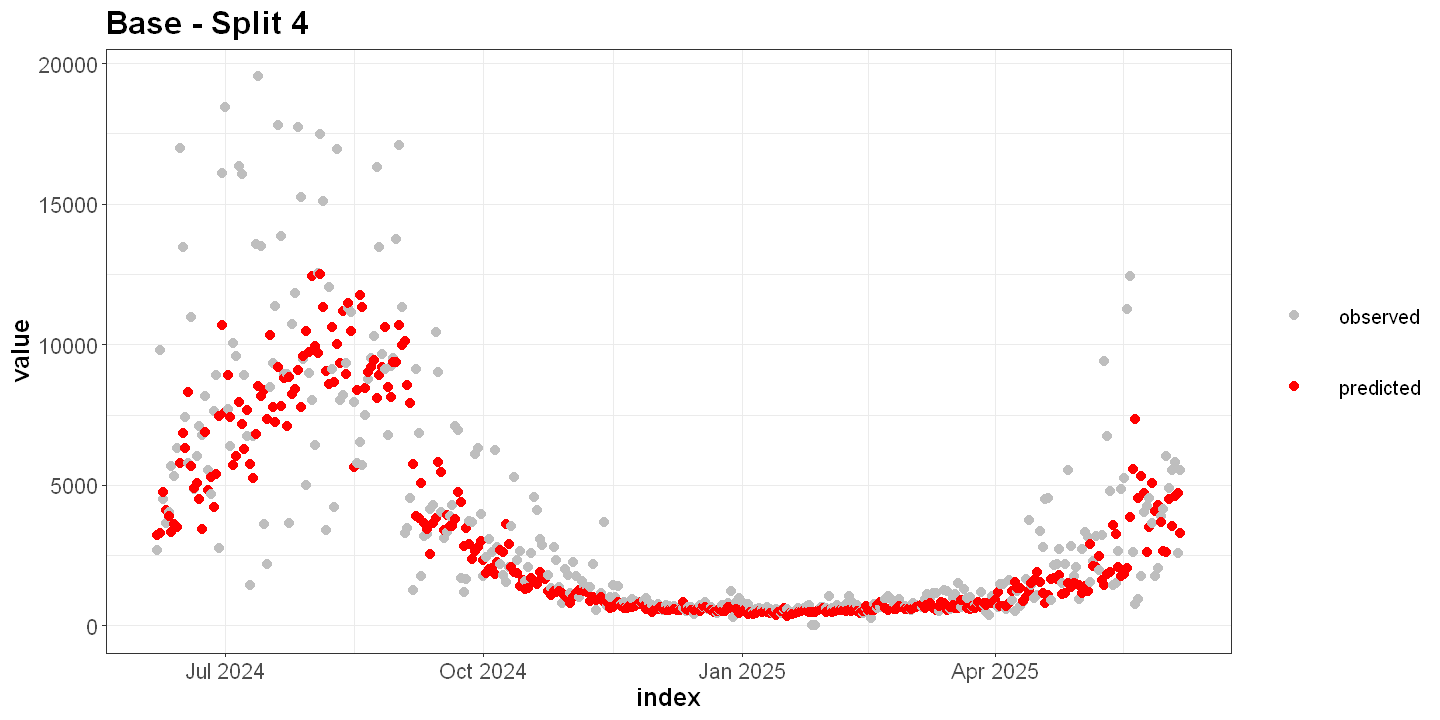

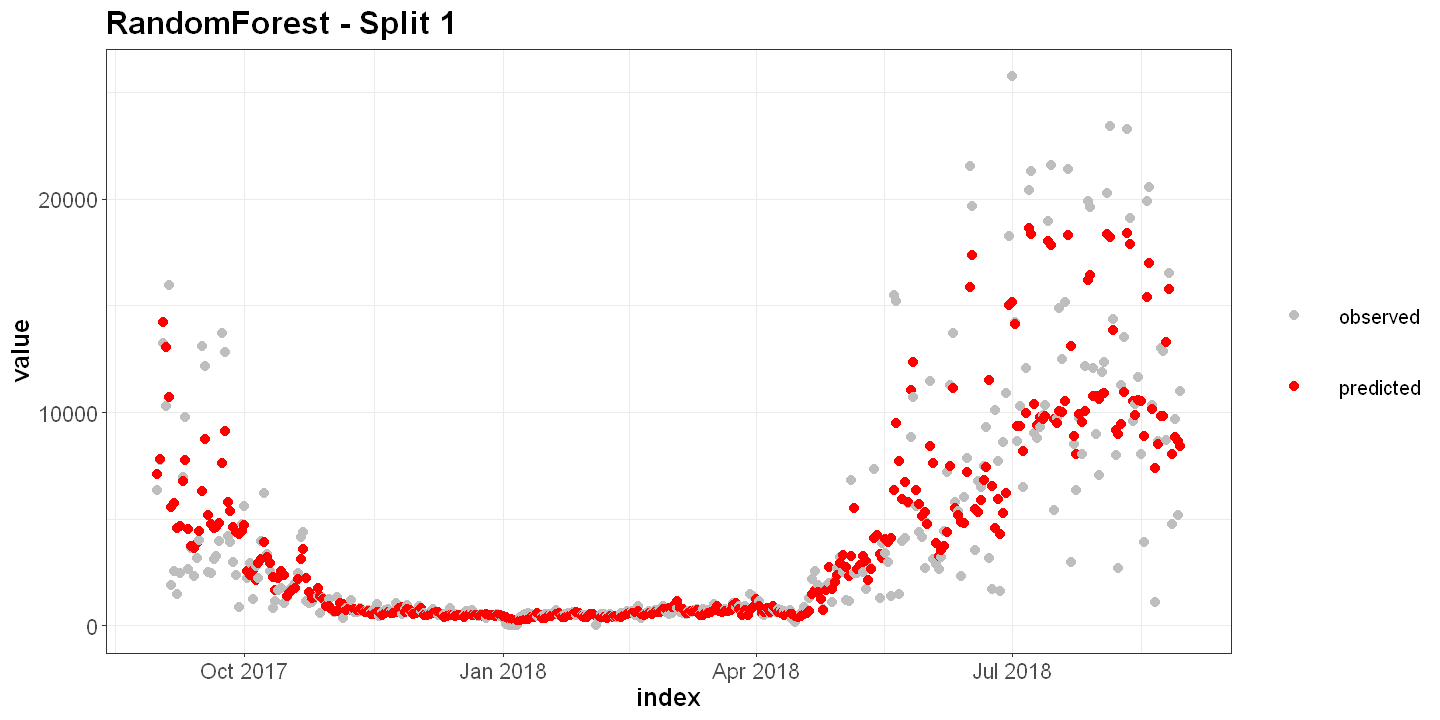

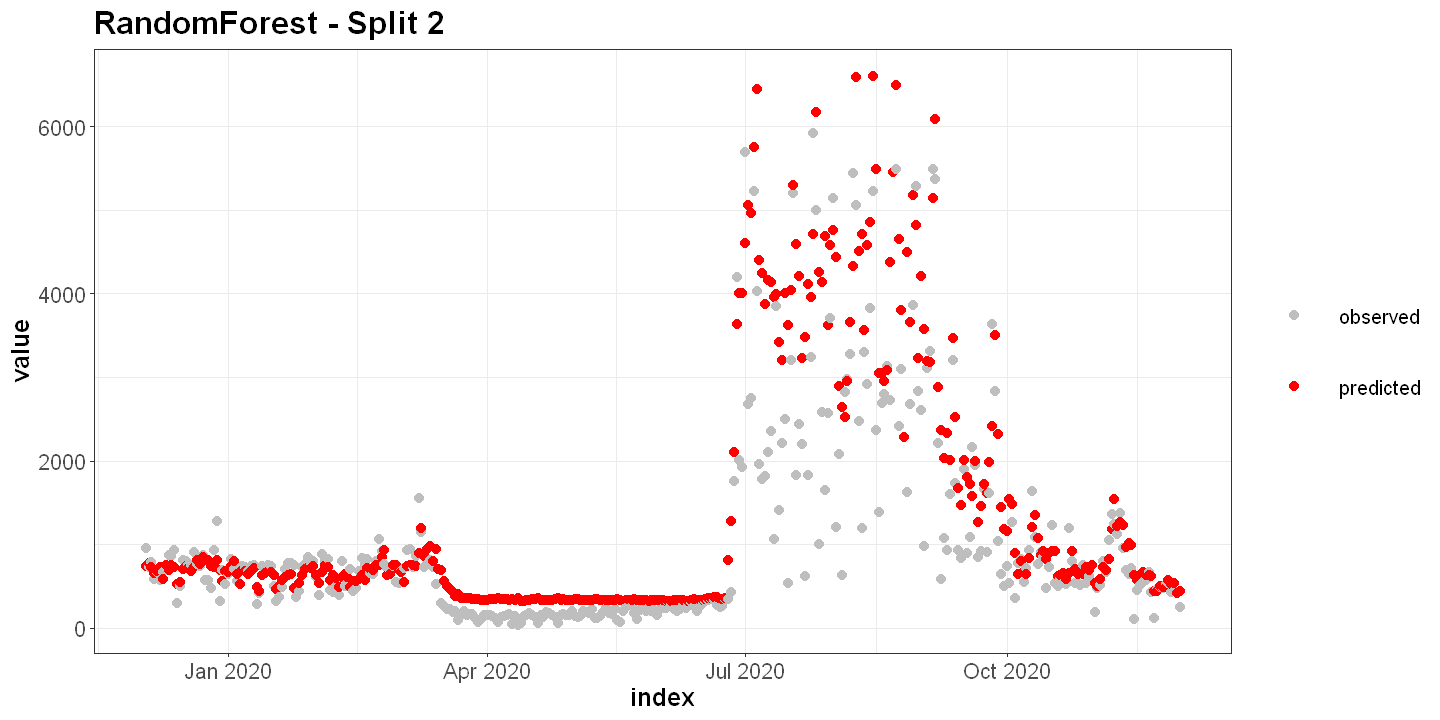

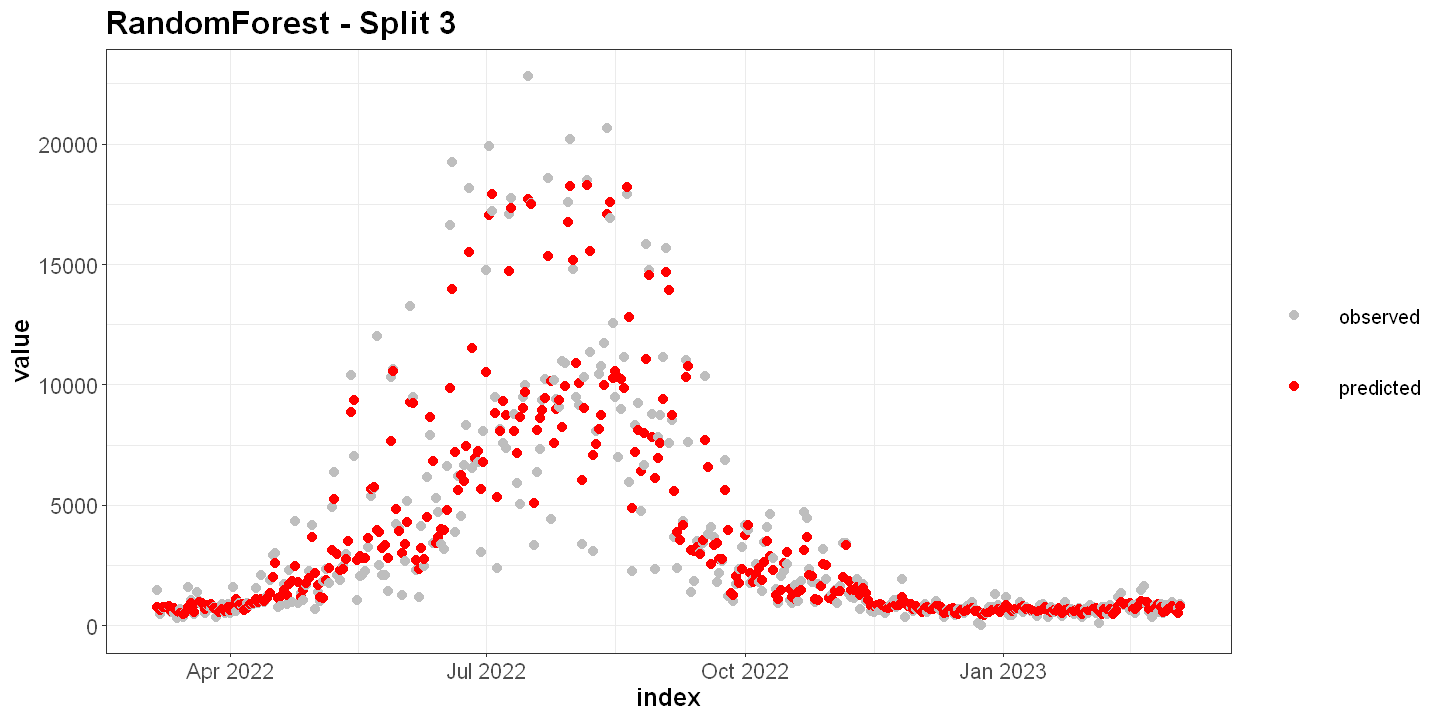

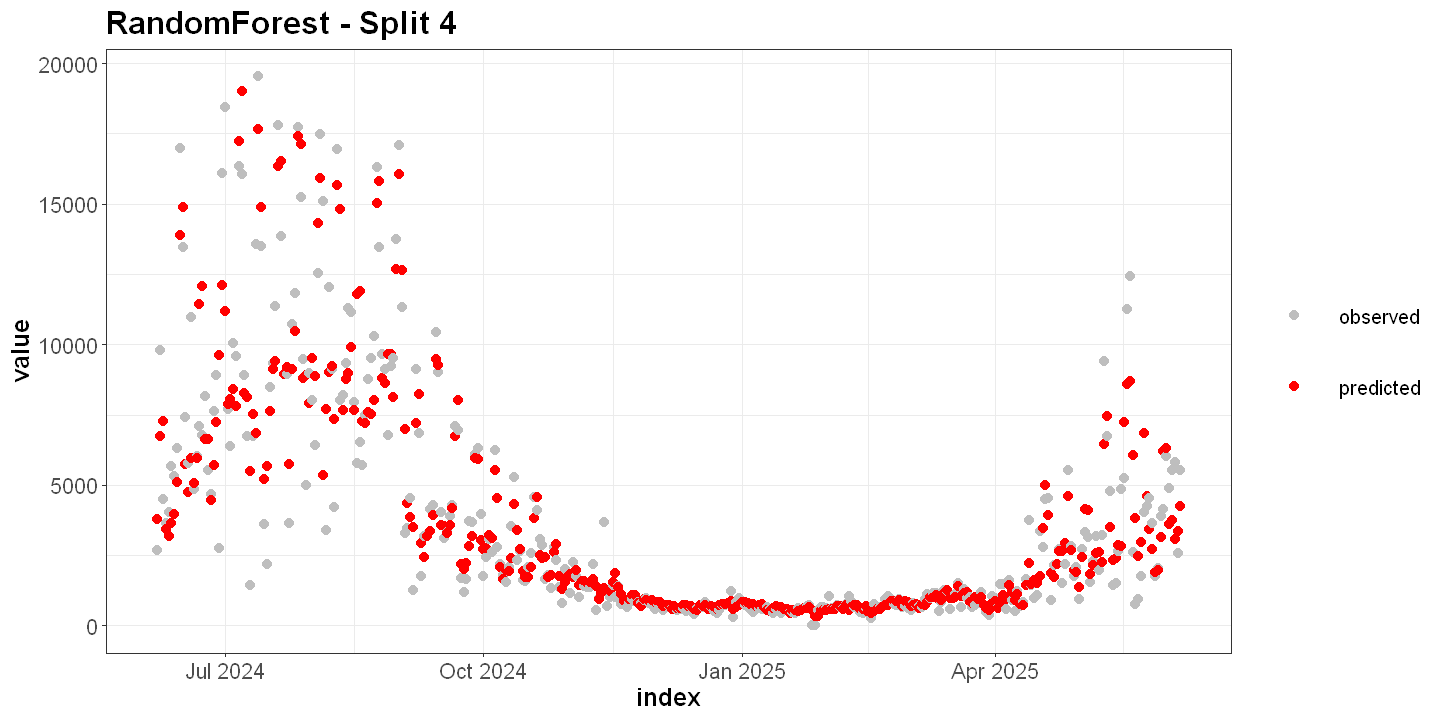

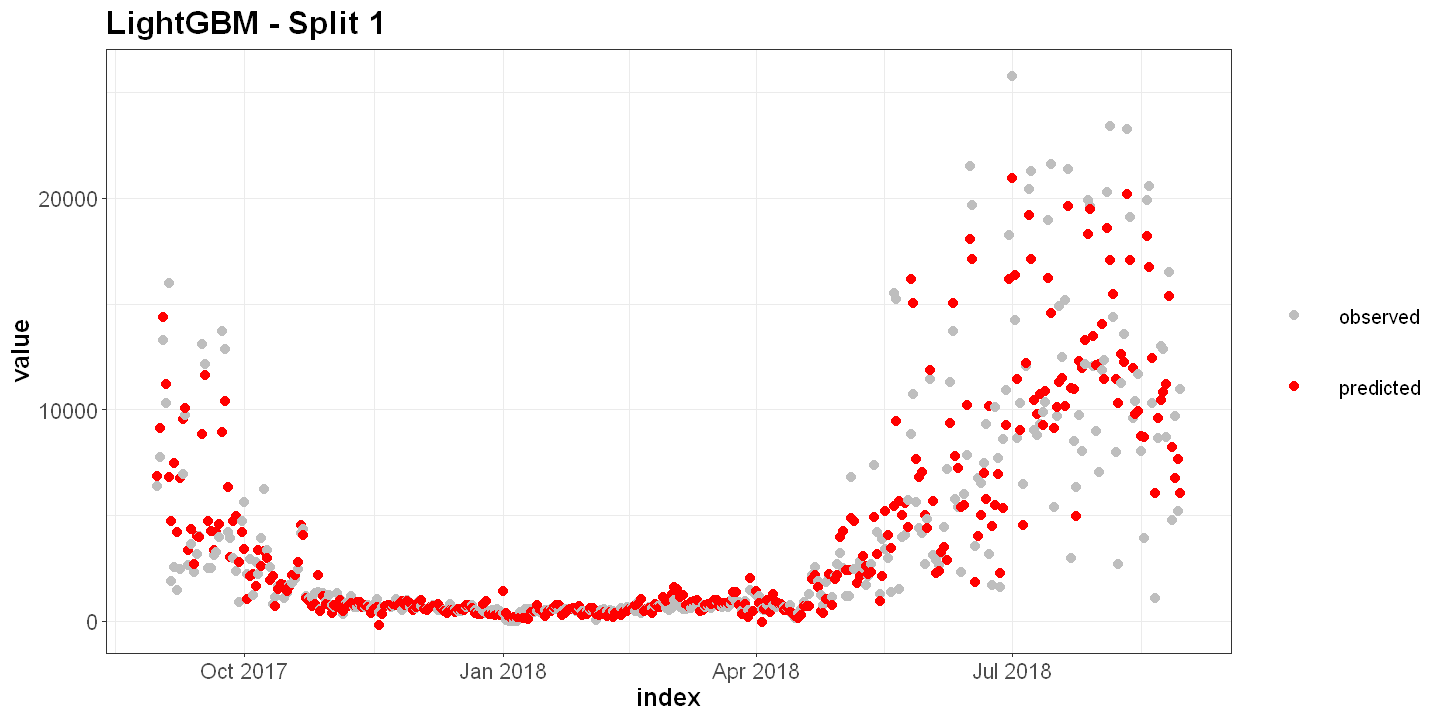

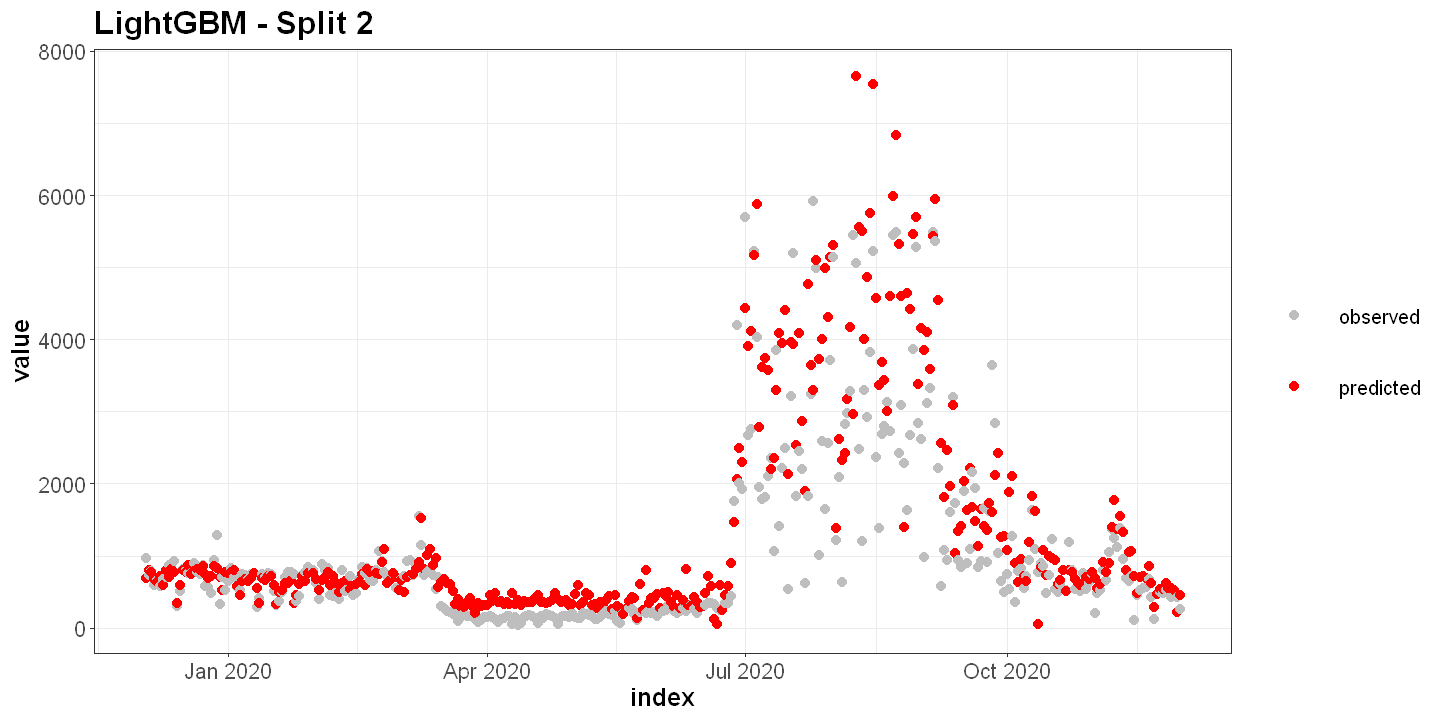

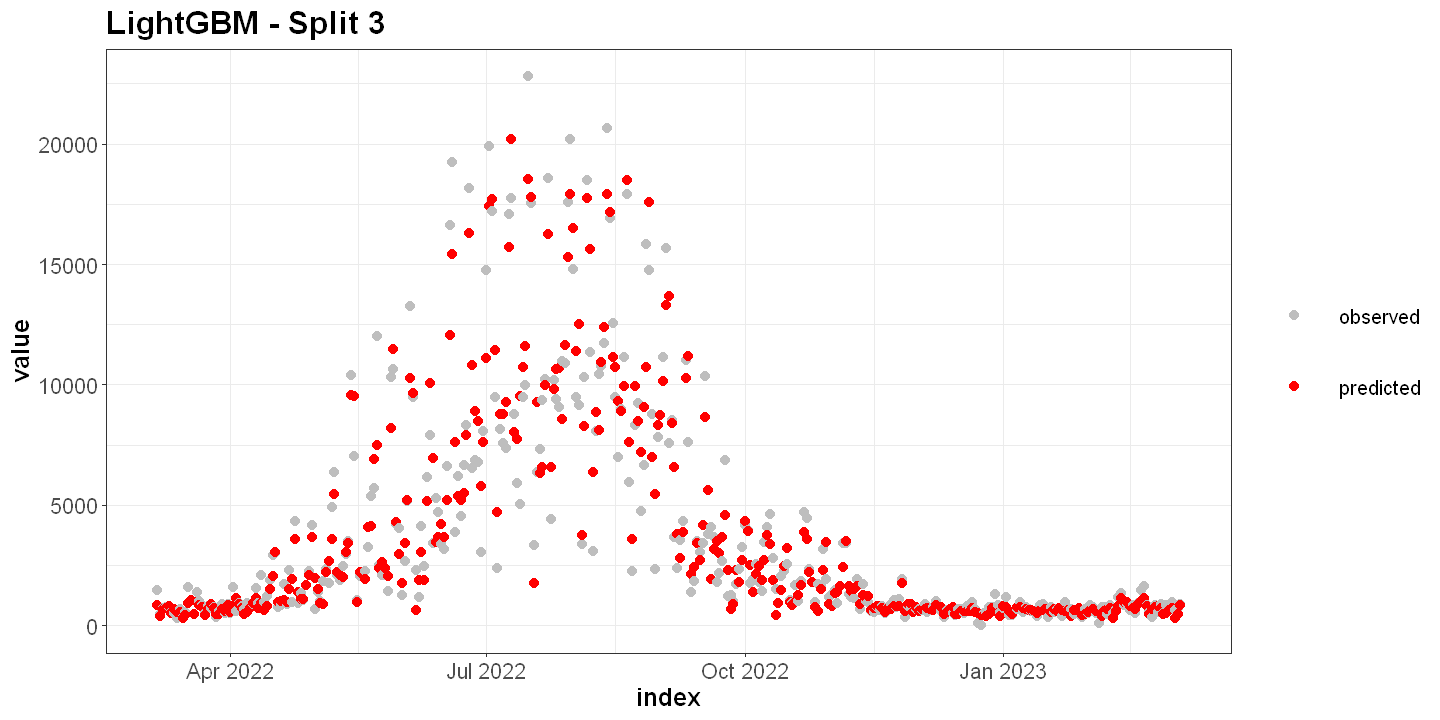

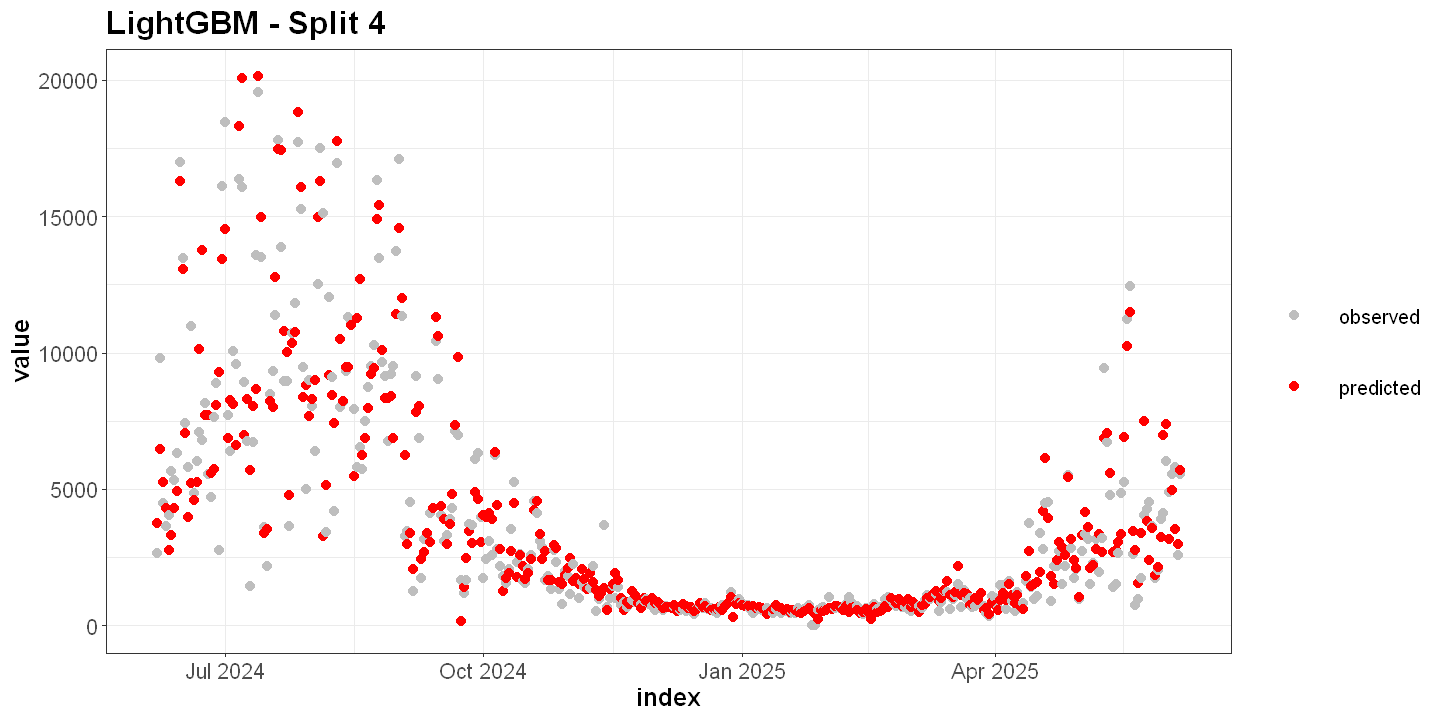

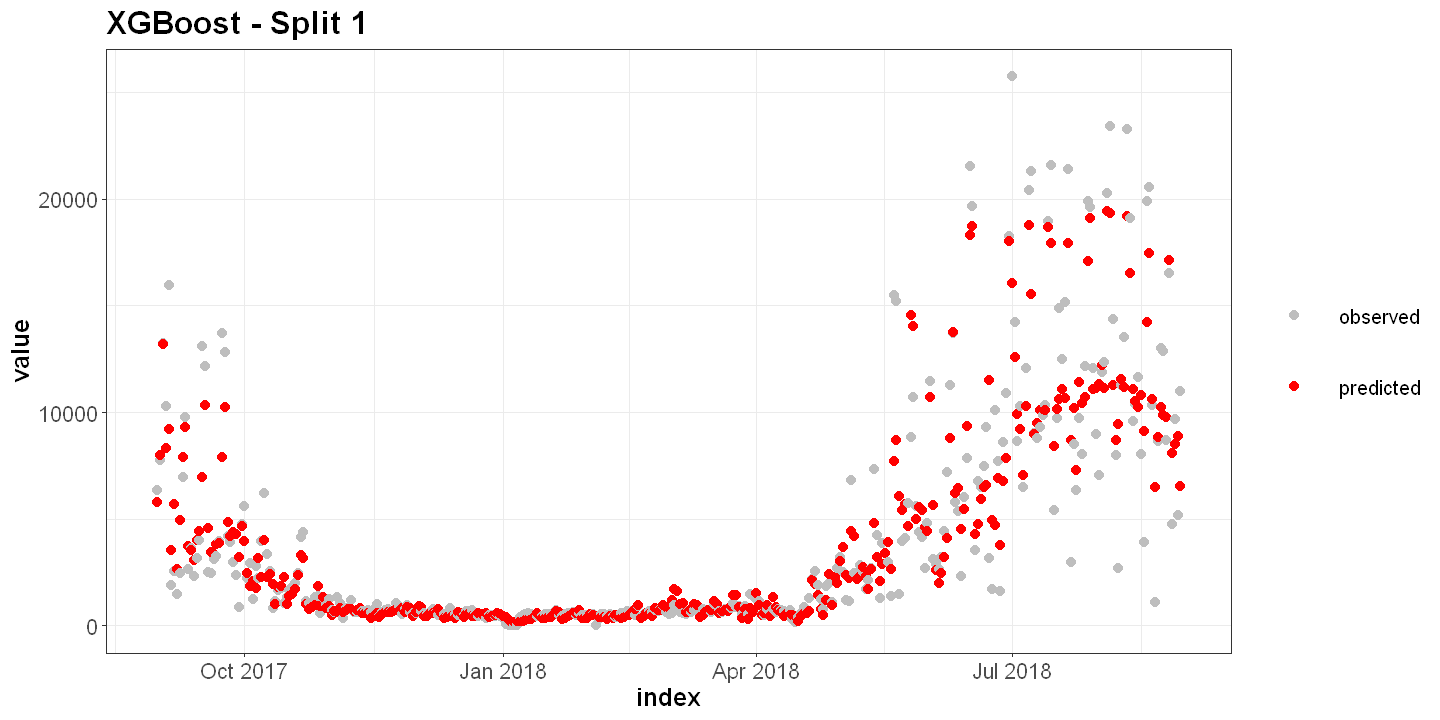

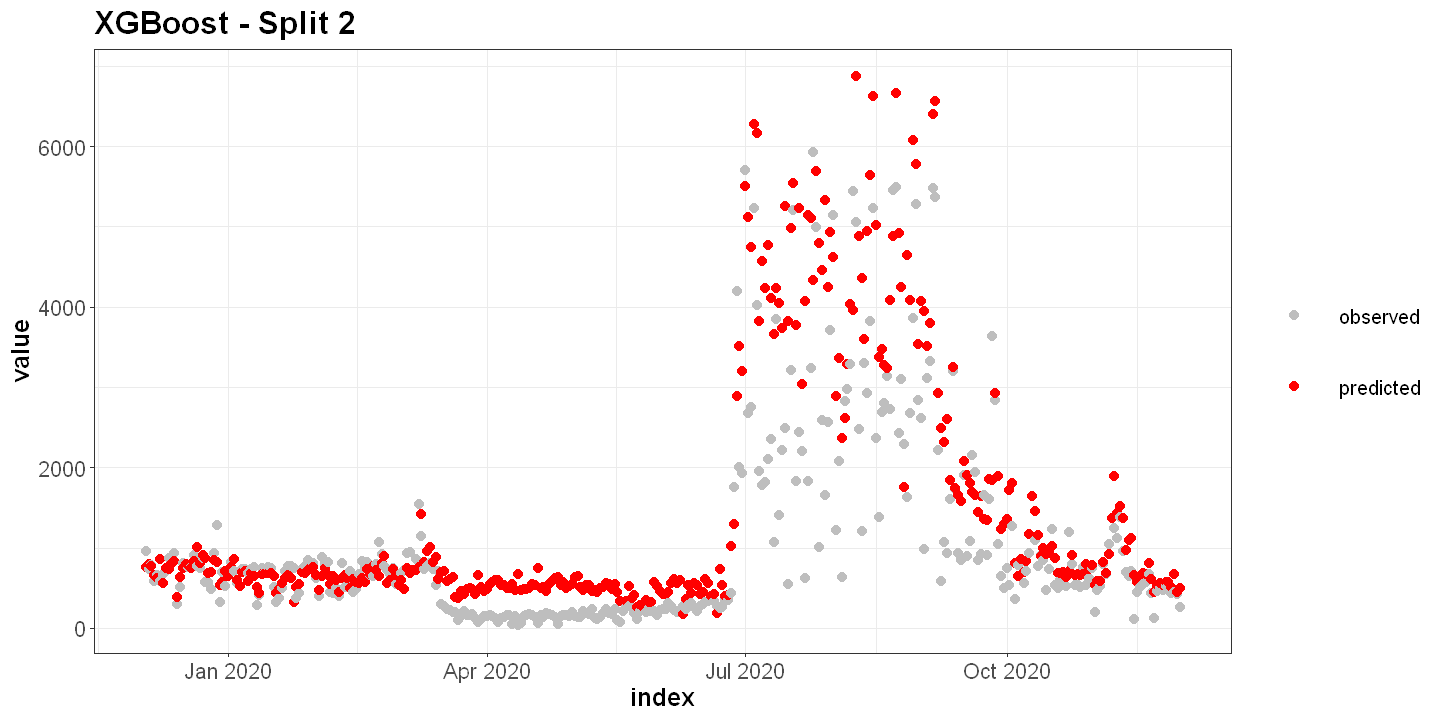

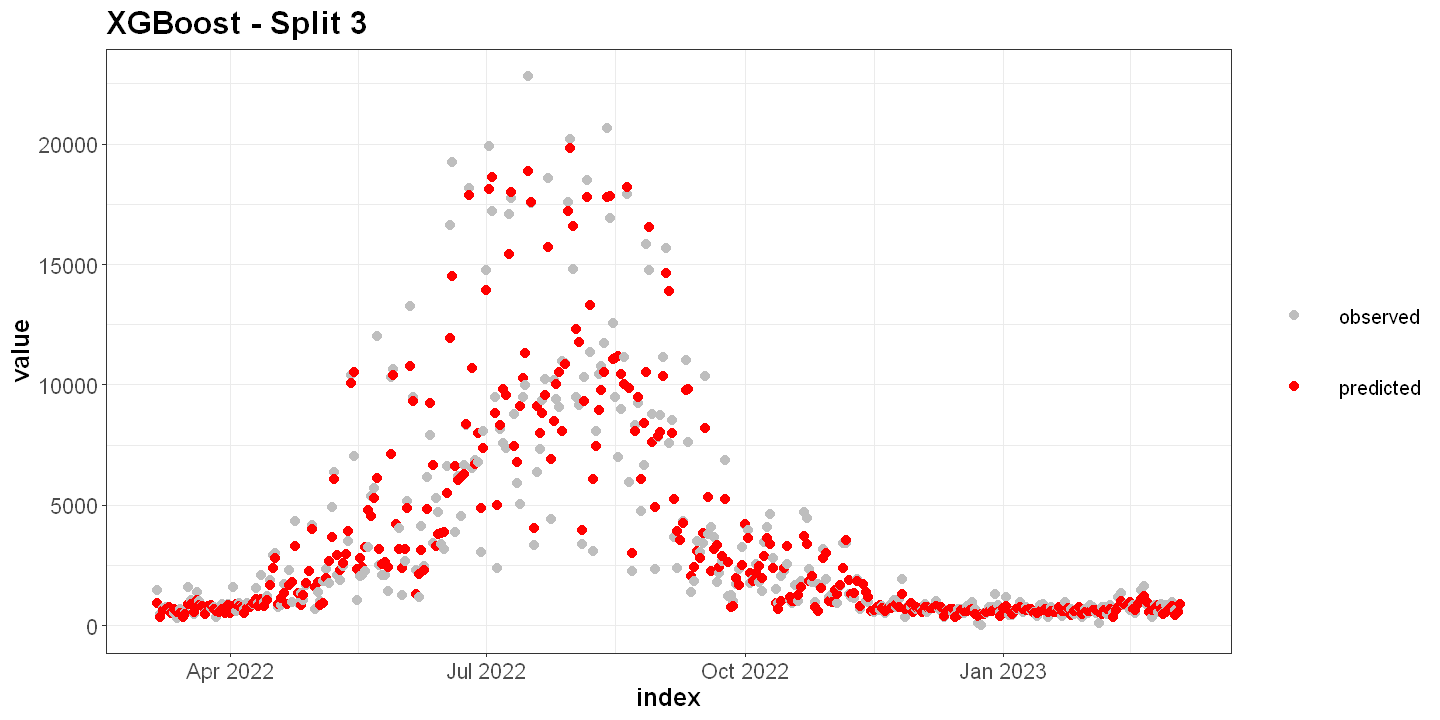

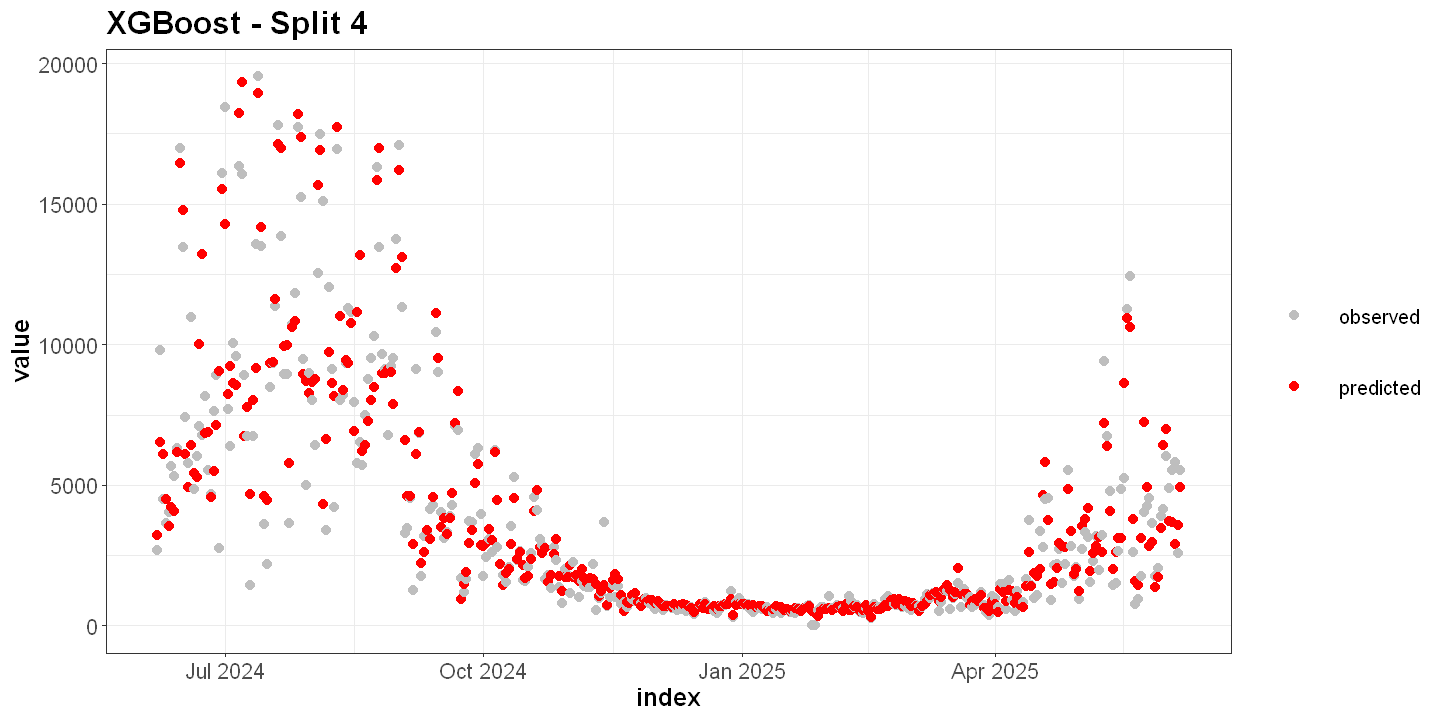

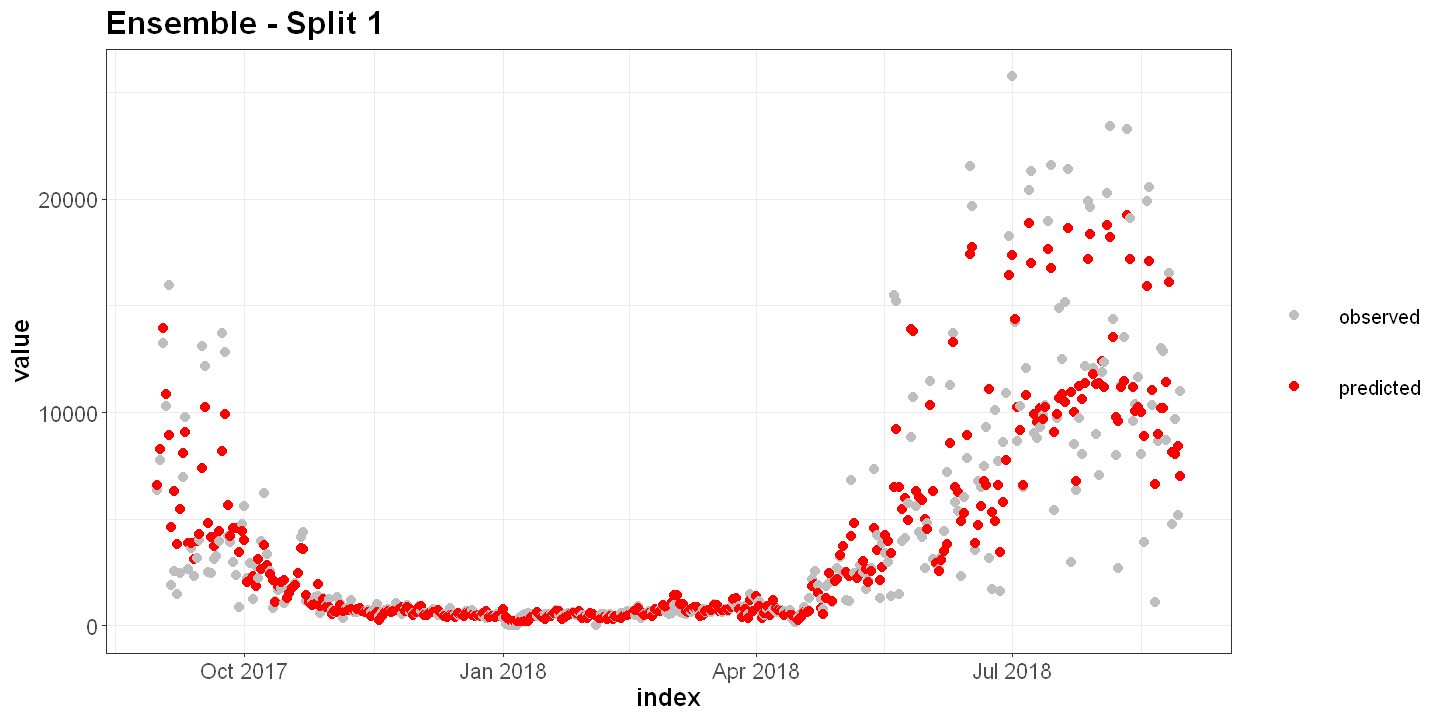

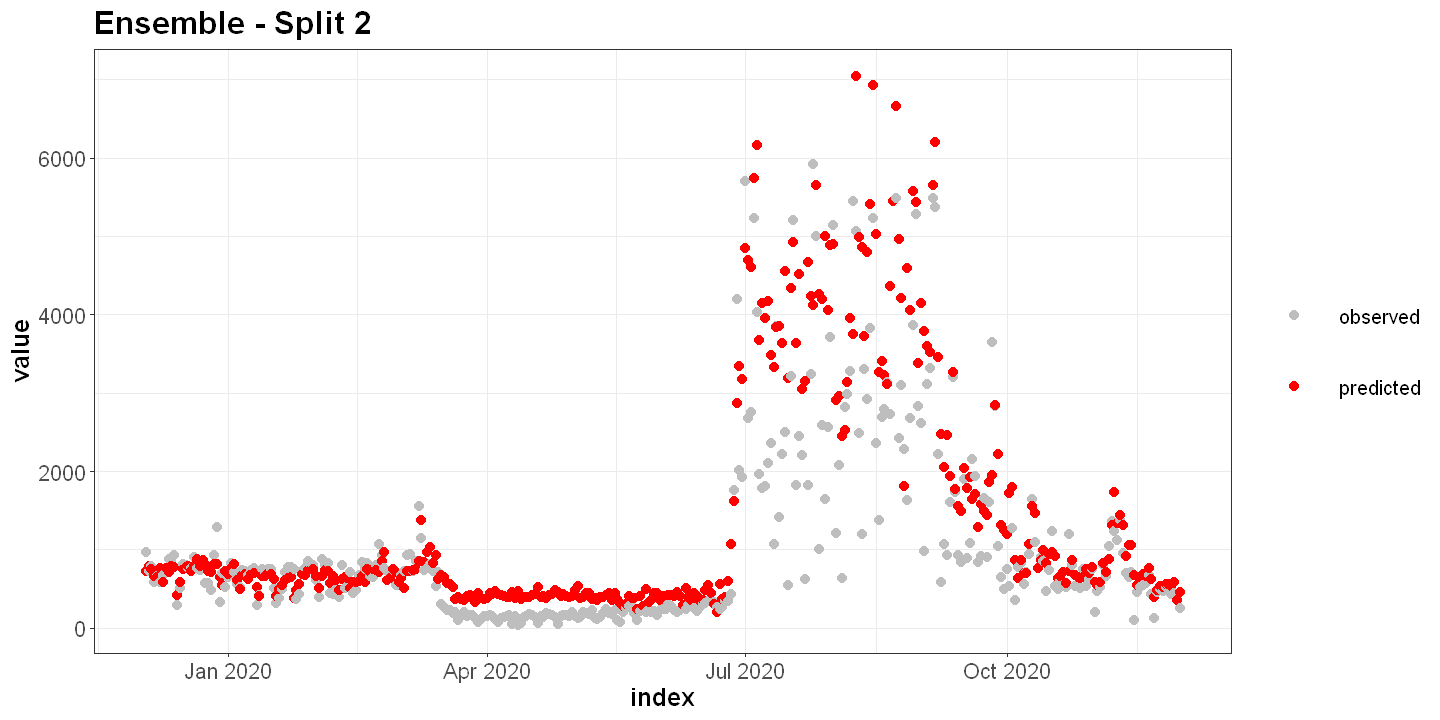

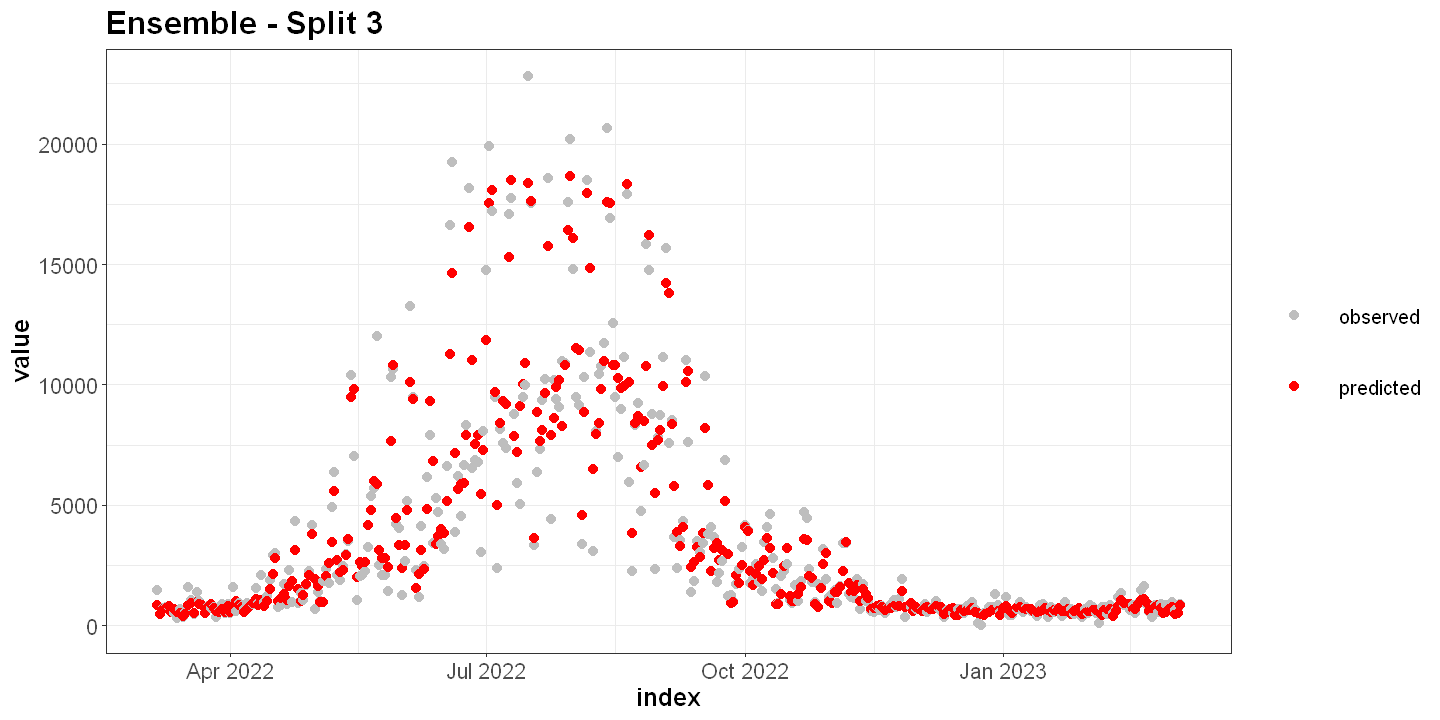

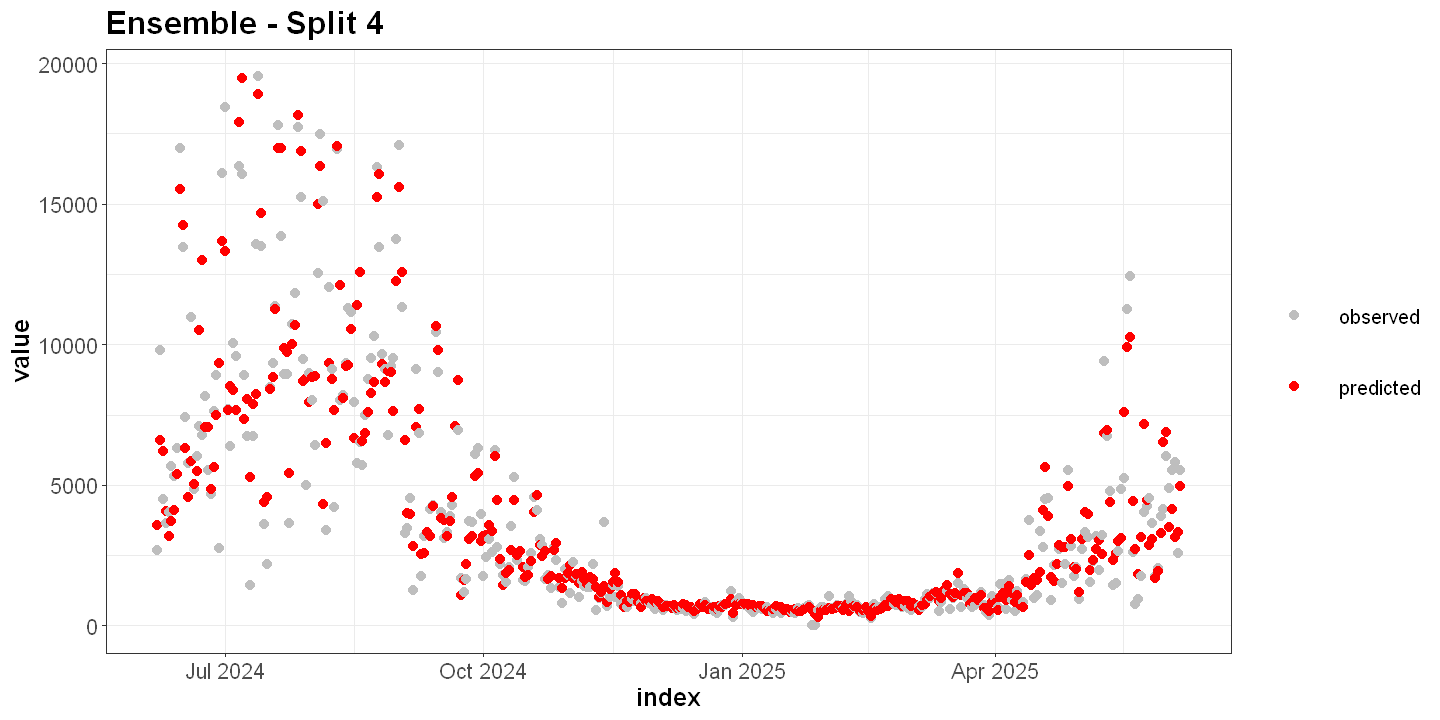

In [62]:
plot_predictions(data = df, preds = rc_result2$preds, target_col = "Redemption_Count")

### Plot Variable Importance

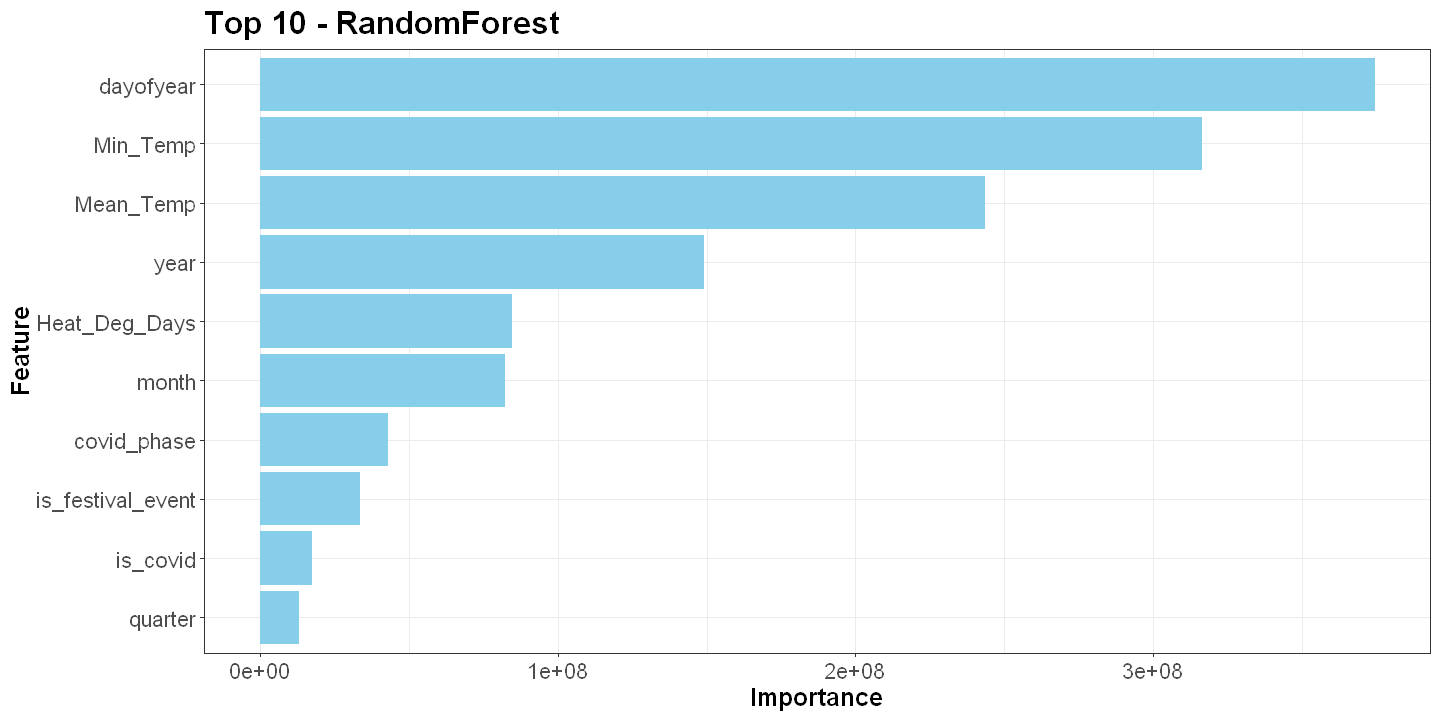

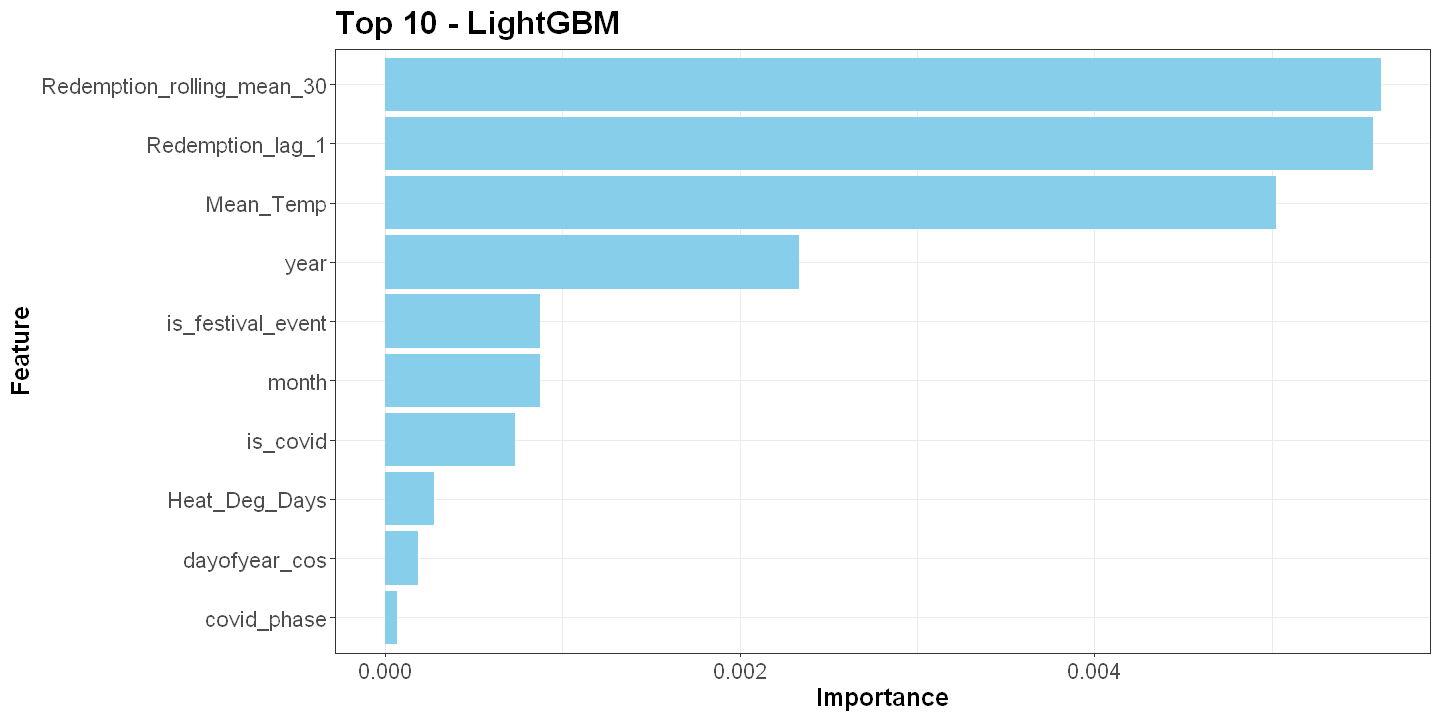

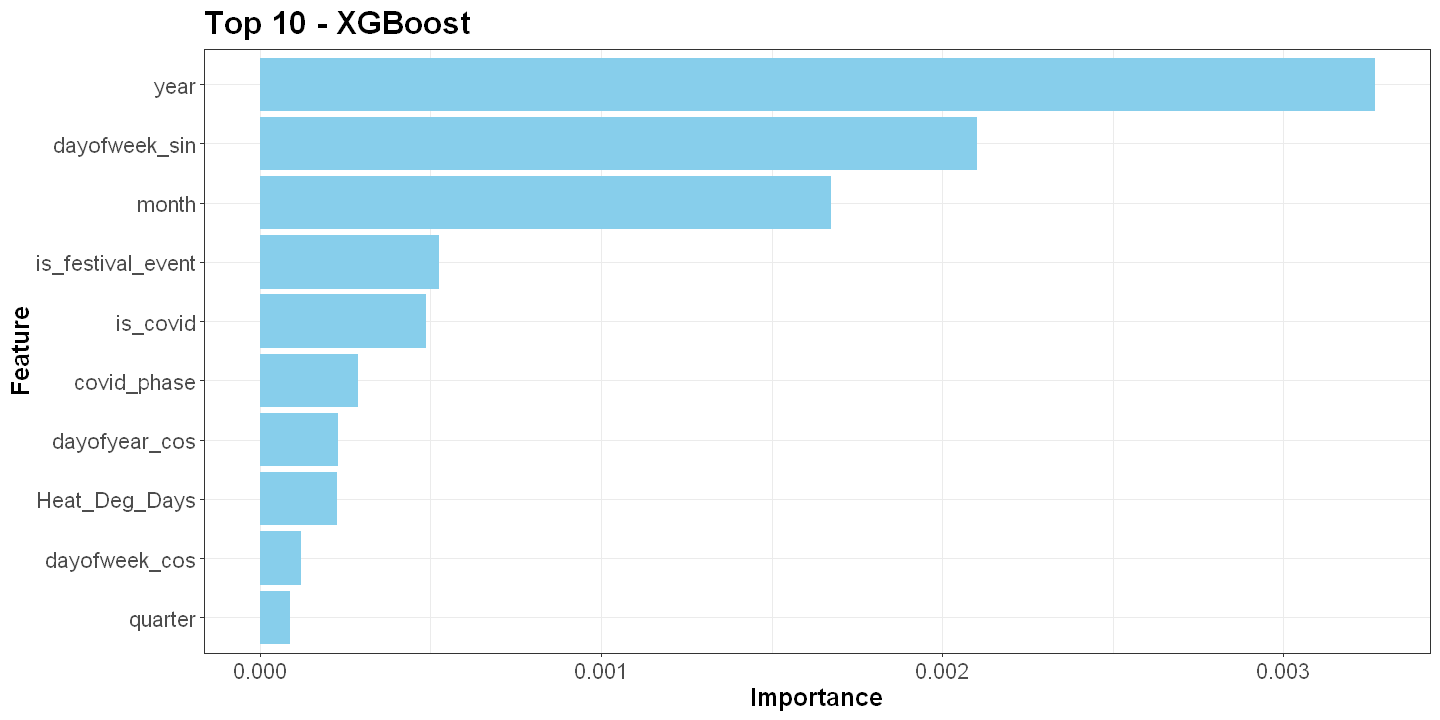

In [63]:
plot_feature_importance(rc_result2$importances)

## Sale Model Including Redemption as Covariate

### Train Model

In [64]:
sc_result1 <- run_cv_model(data = df, target_col = 'Sales_Count', n_splits = 4, test_size = 365)

### Model Performance Metric Summary Table

In [65]:
sc_result1$summary

,Base,RandomForest,LightGBM,XGBoost,Ensemble
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MSE,11434444.06,509028.57,292744.94,281033.28,272585.51
RMSE,3309.38,673.09,518.11,520.35,505.16
MAE,1909.93,378.70,303.64,299.90,291.20
MAPE,219.97,47.25,28.82,40.57,37.05
R2,-1.93,0.93,0.95,0.95,0.95


### Plot Observed vs Predictions

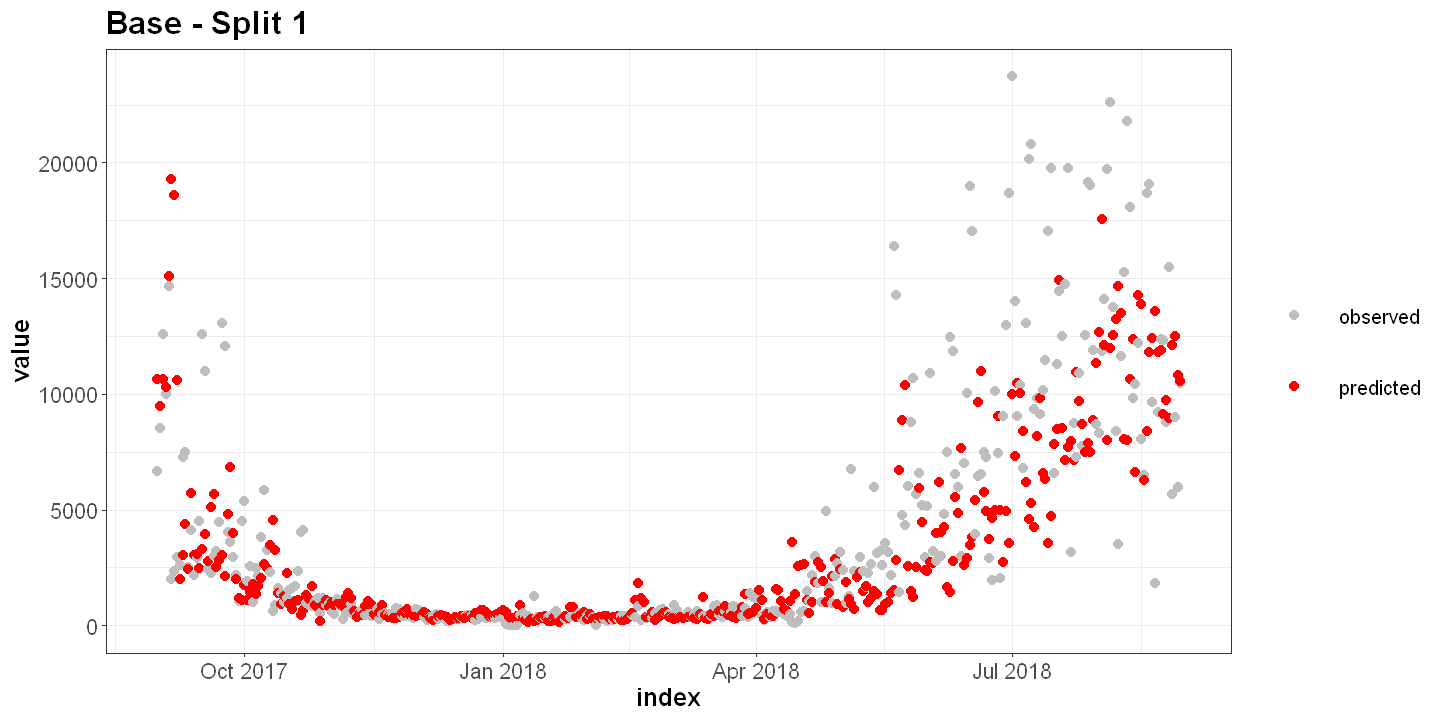

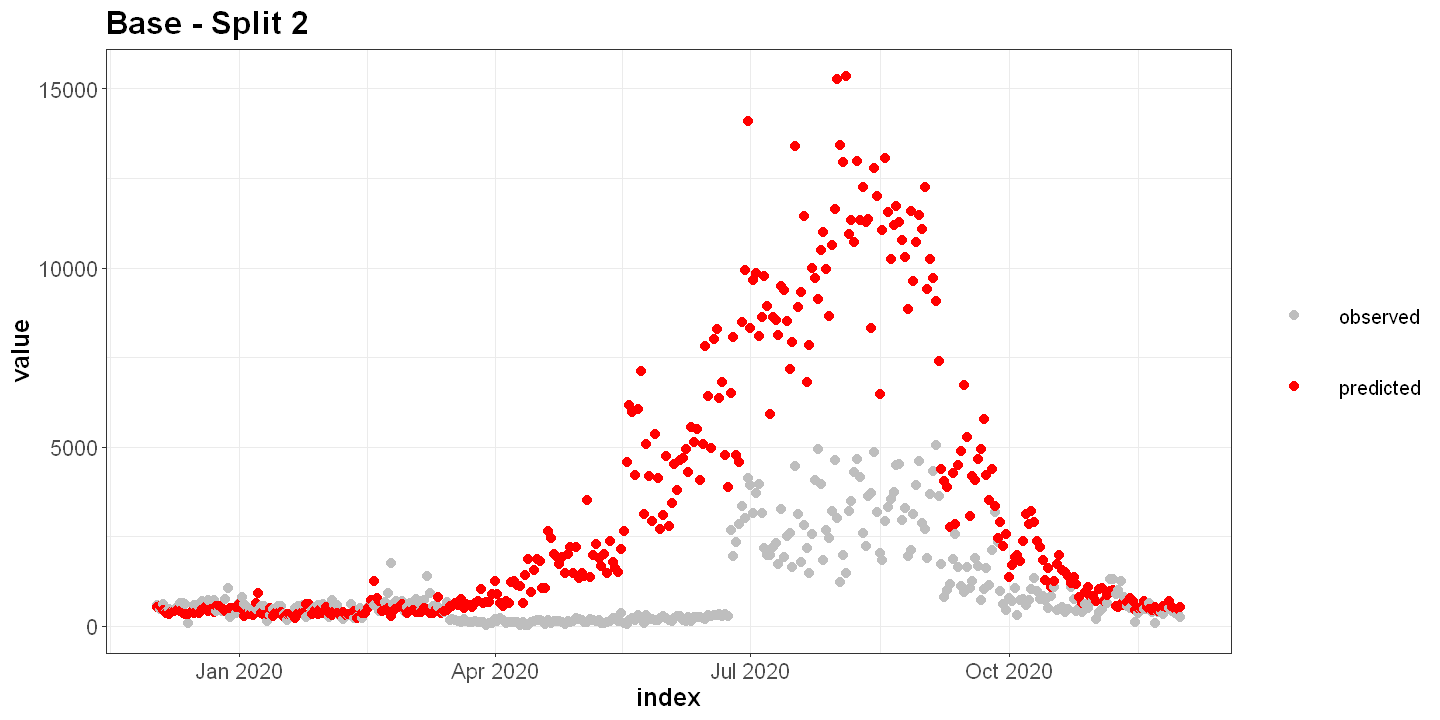

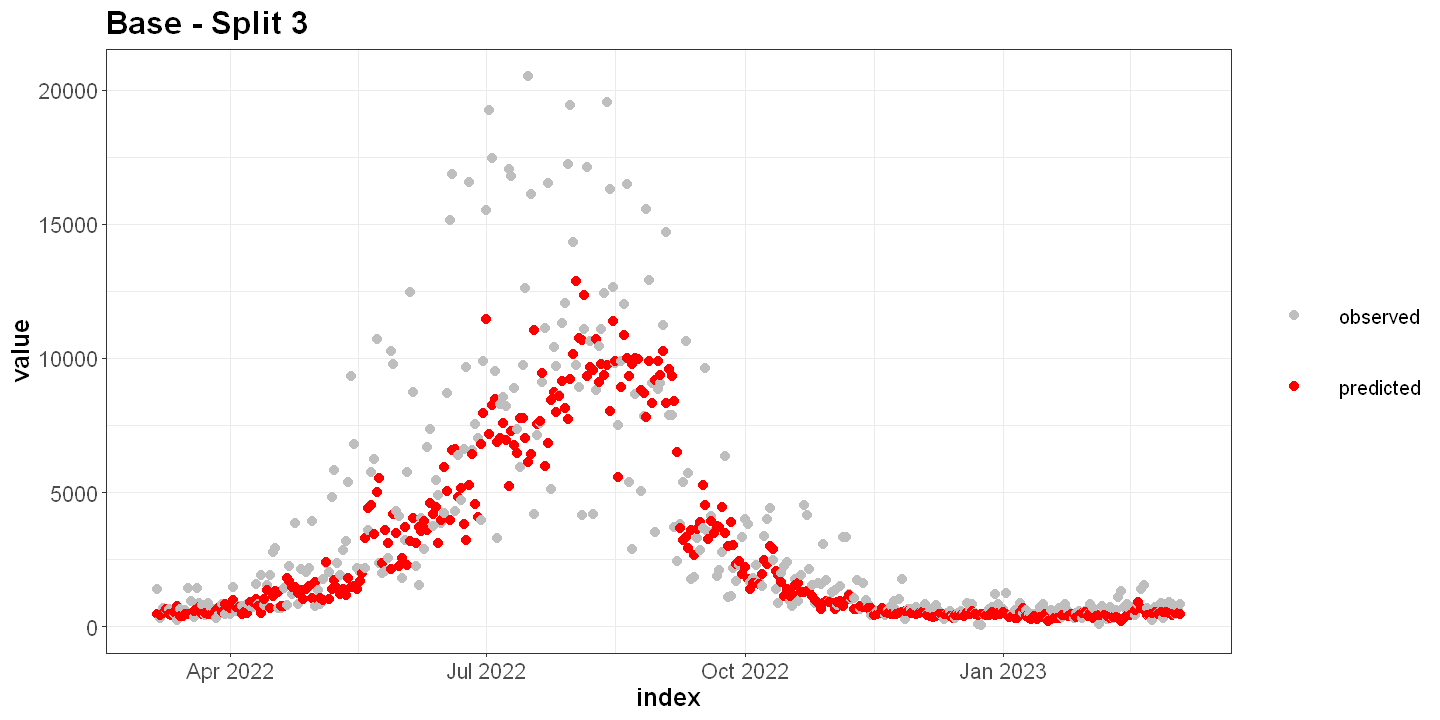

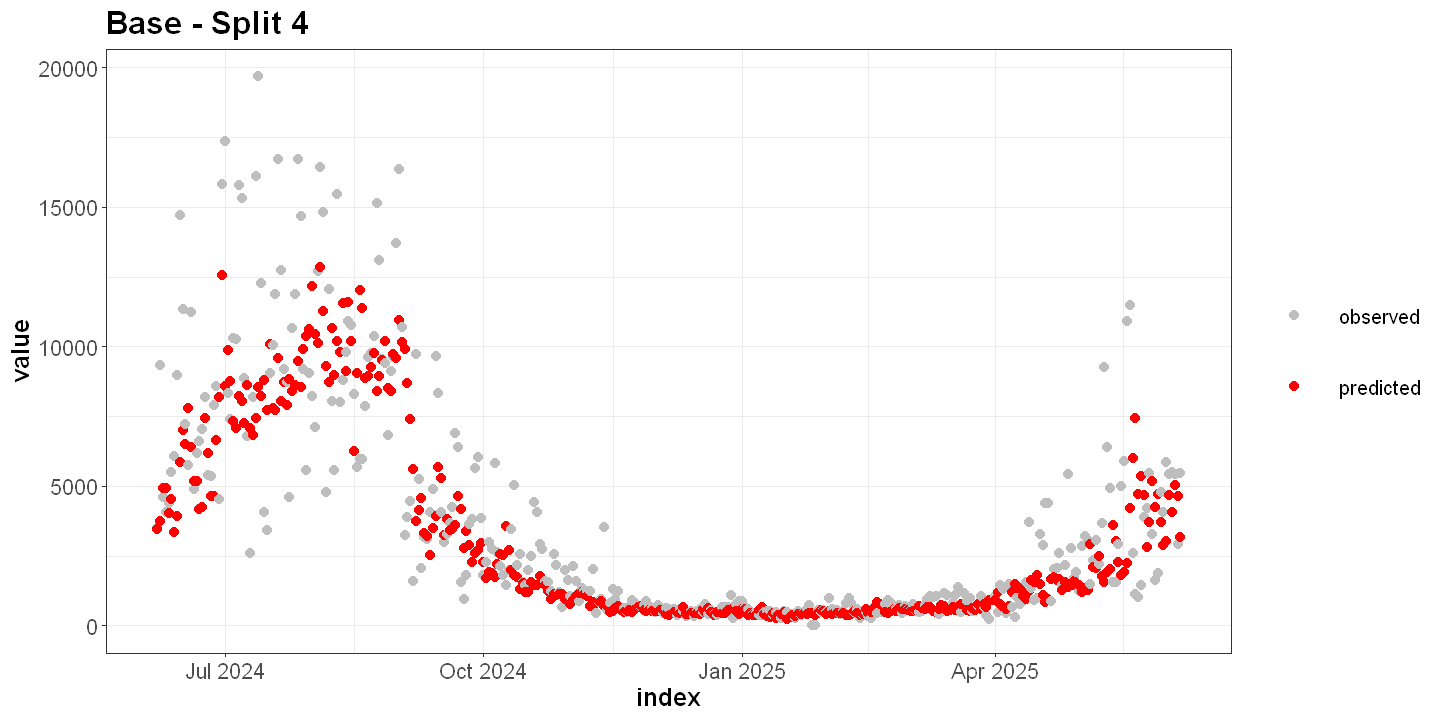

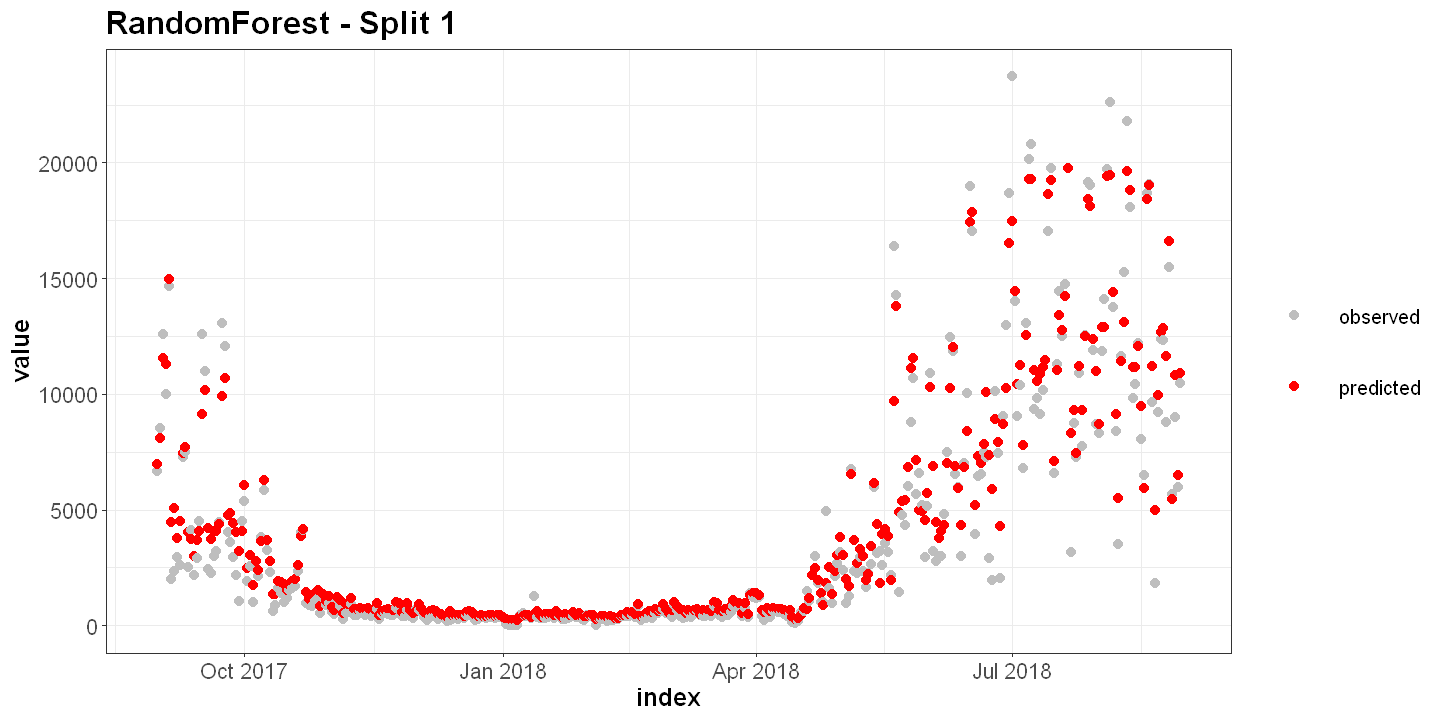

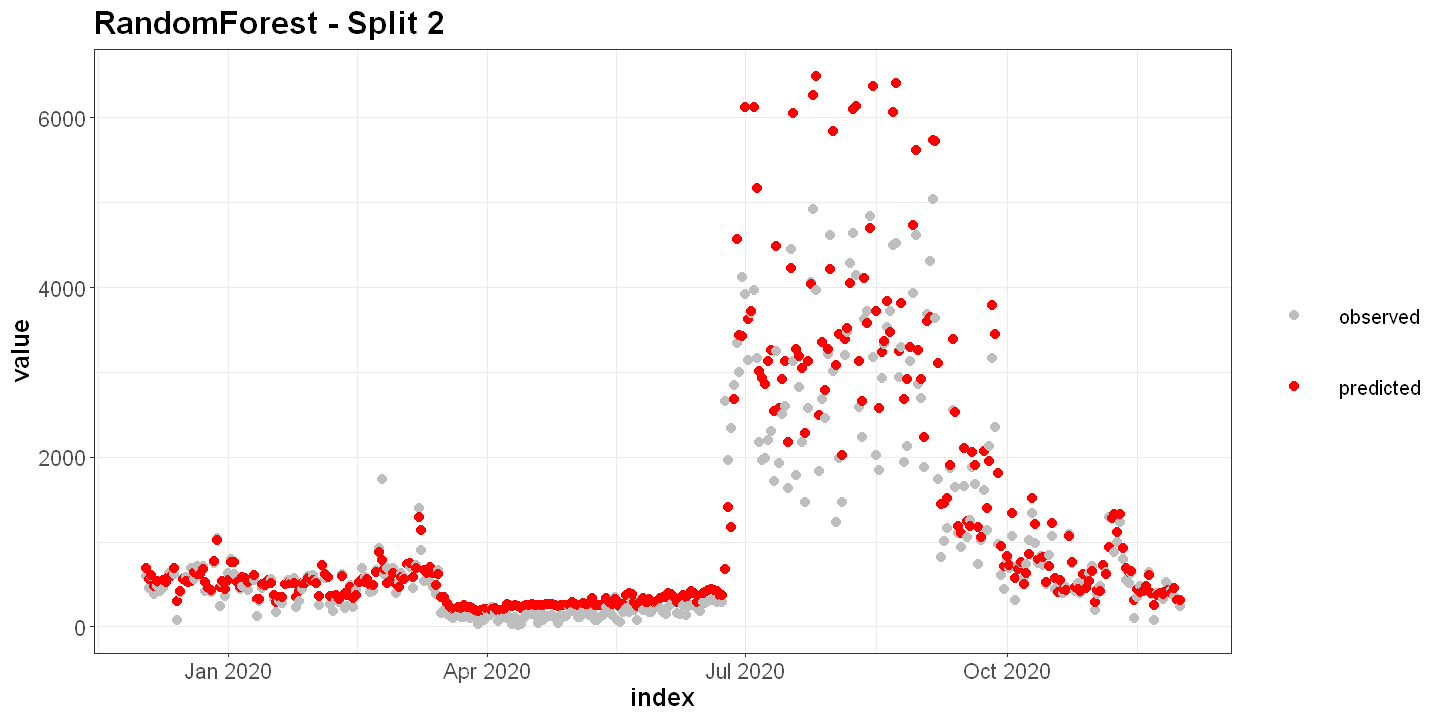

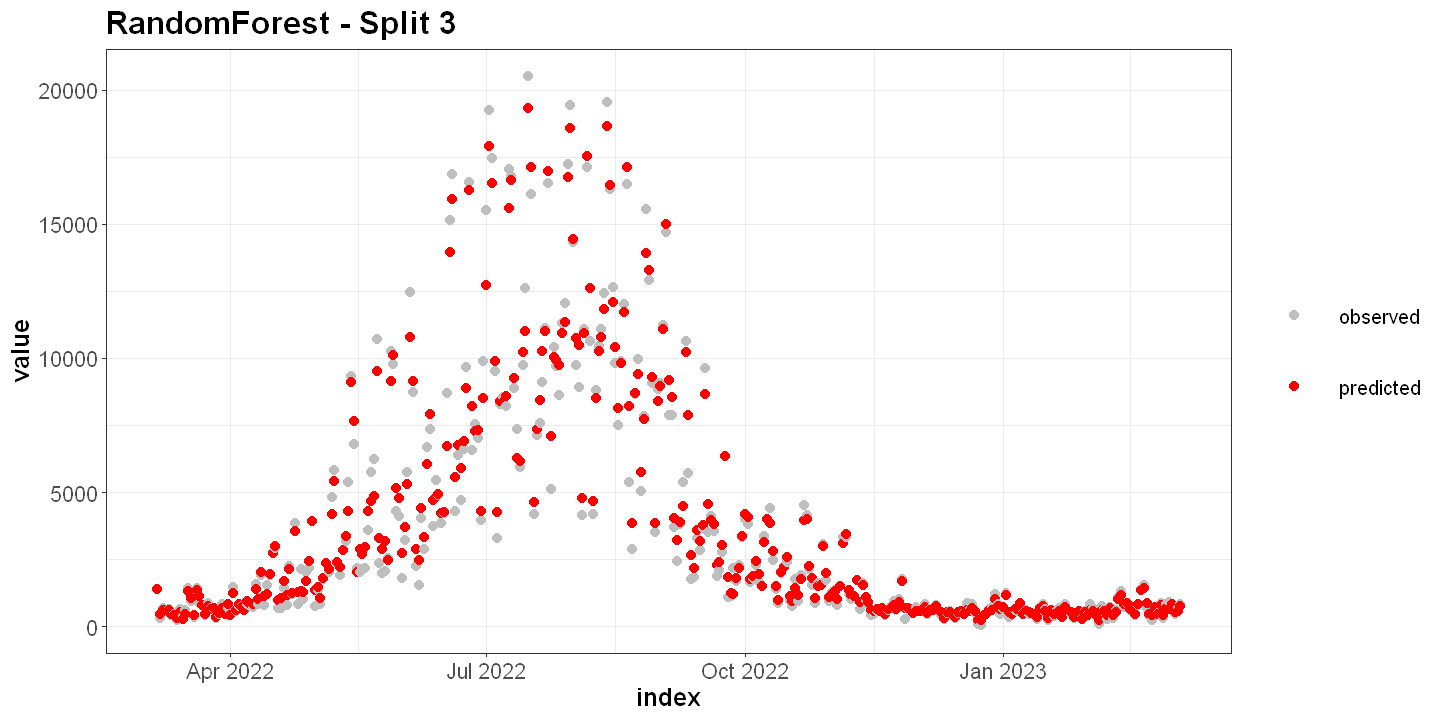

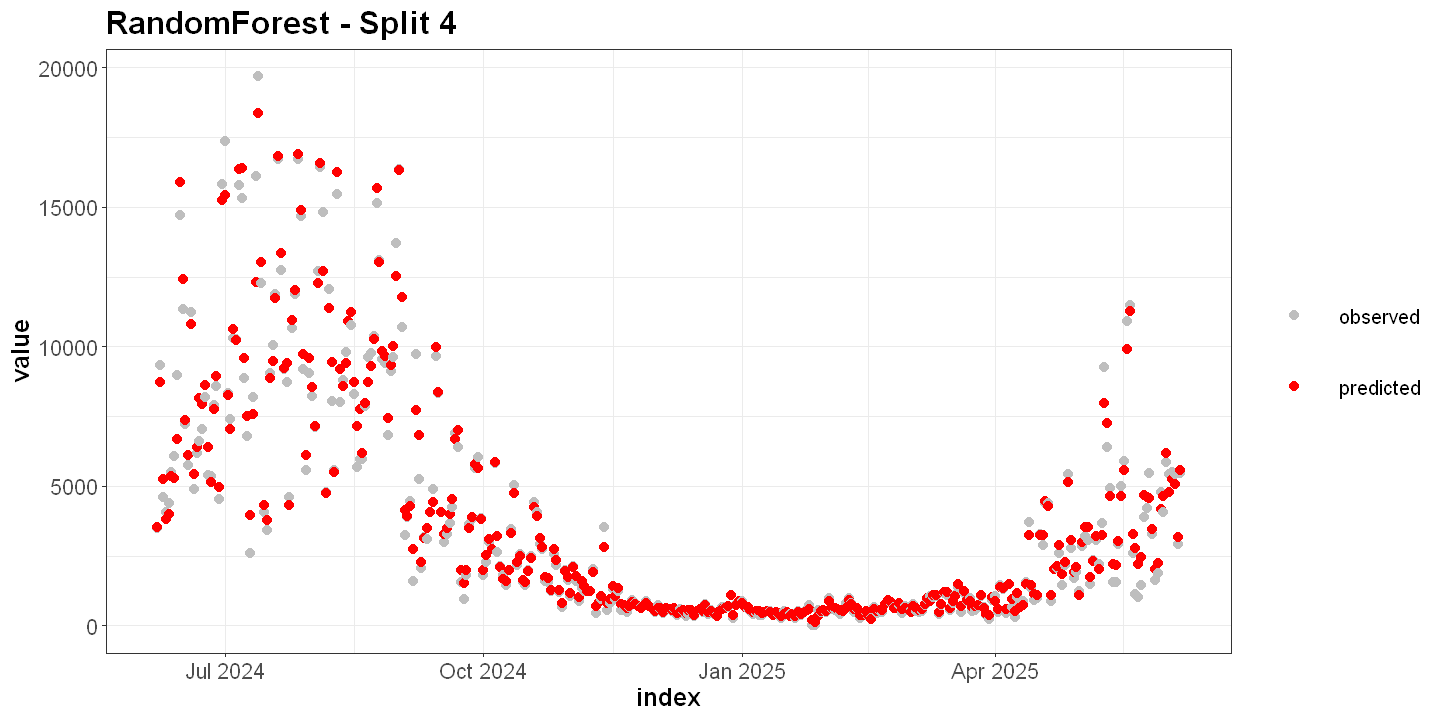

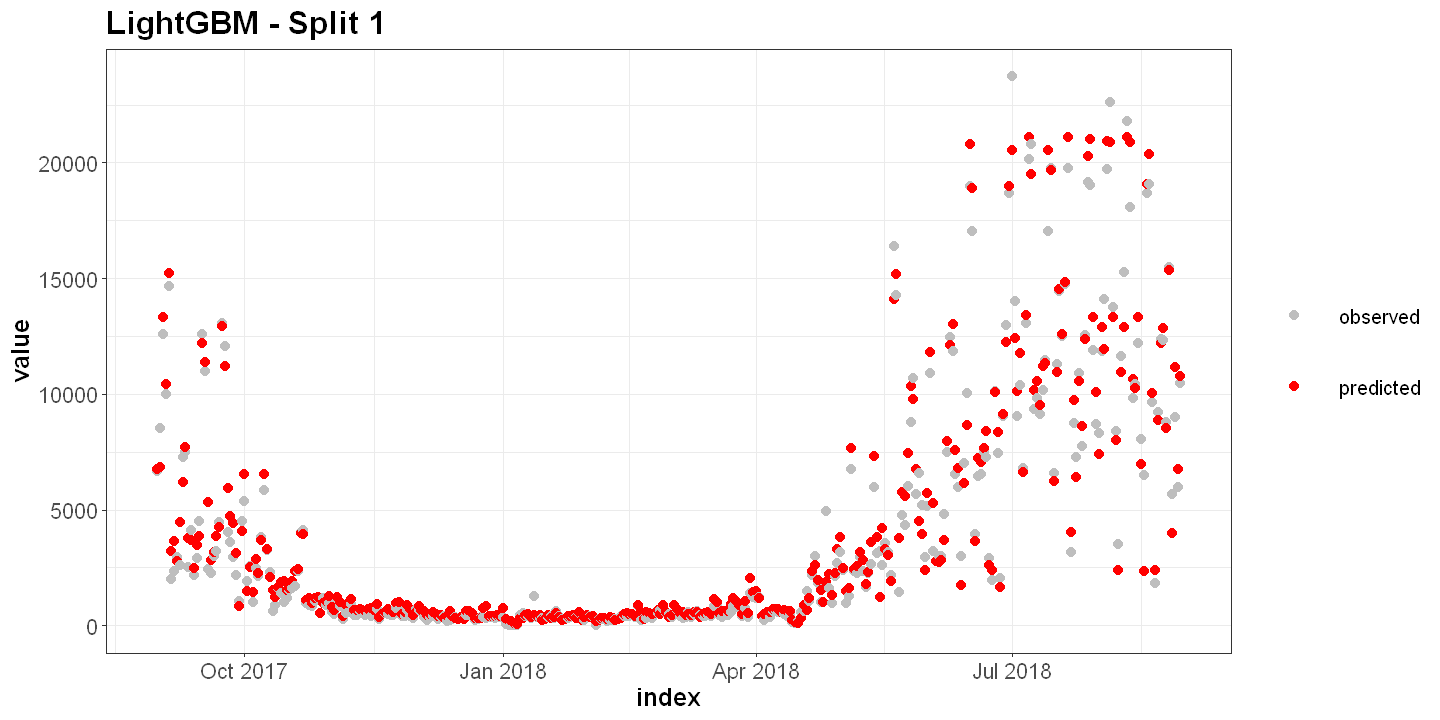

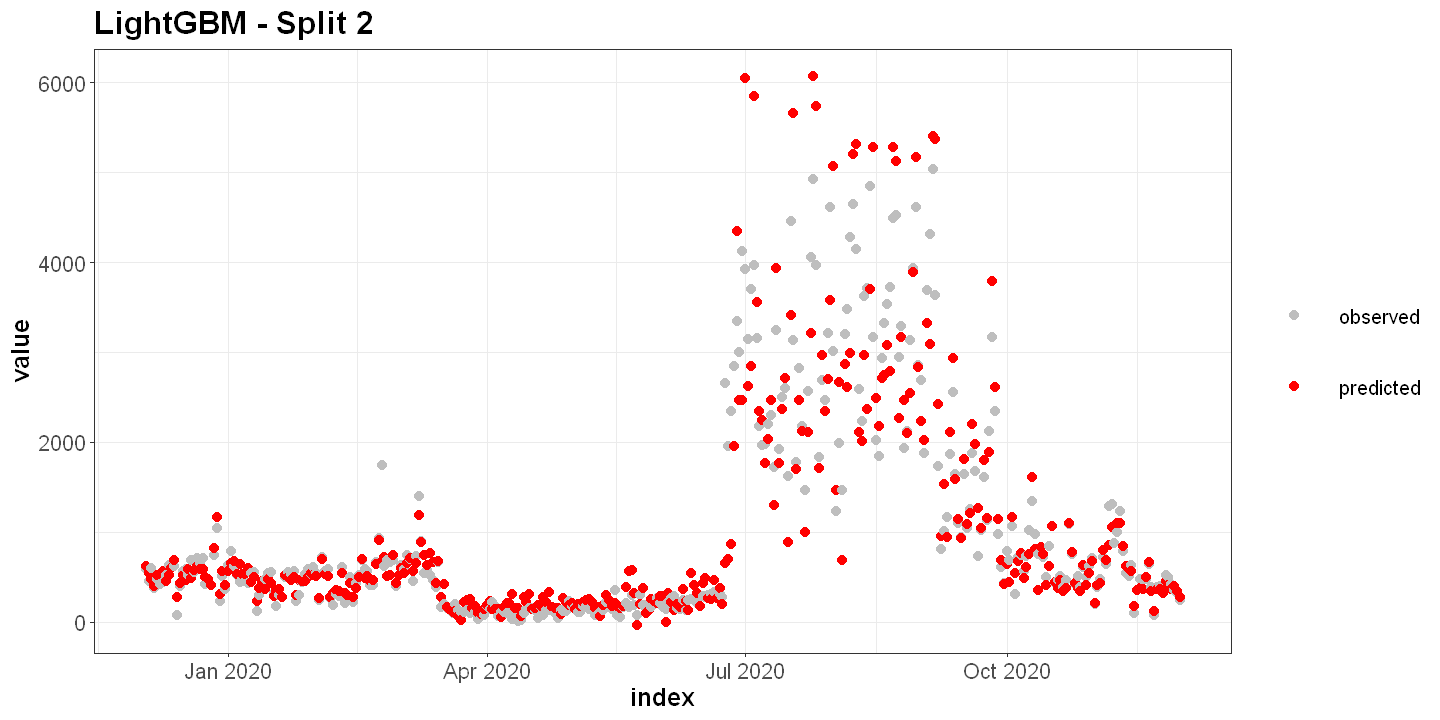

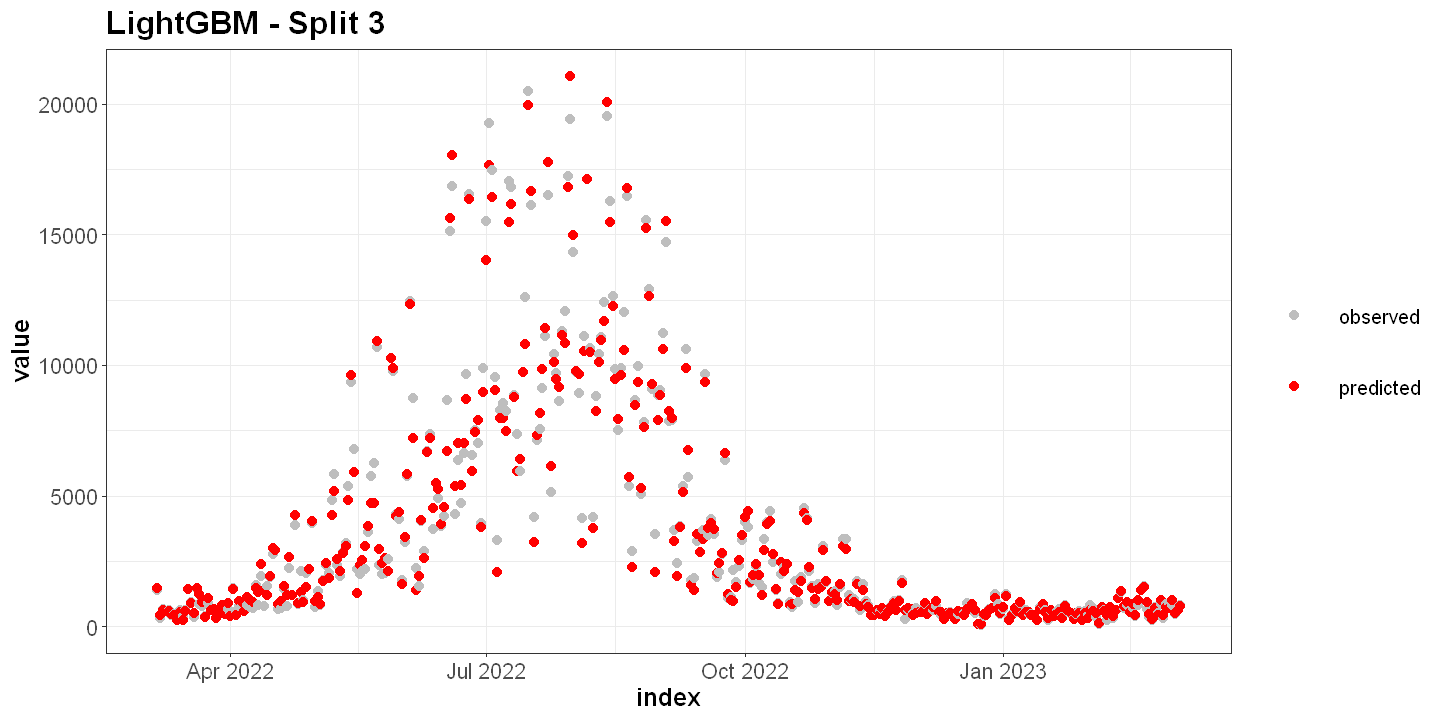

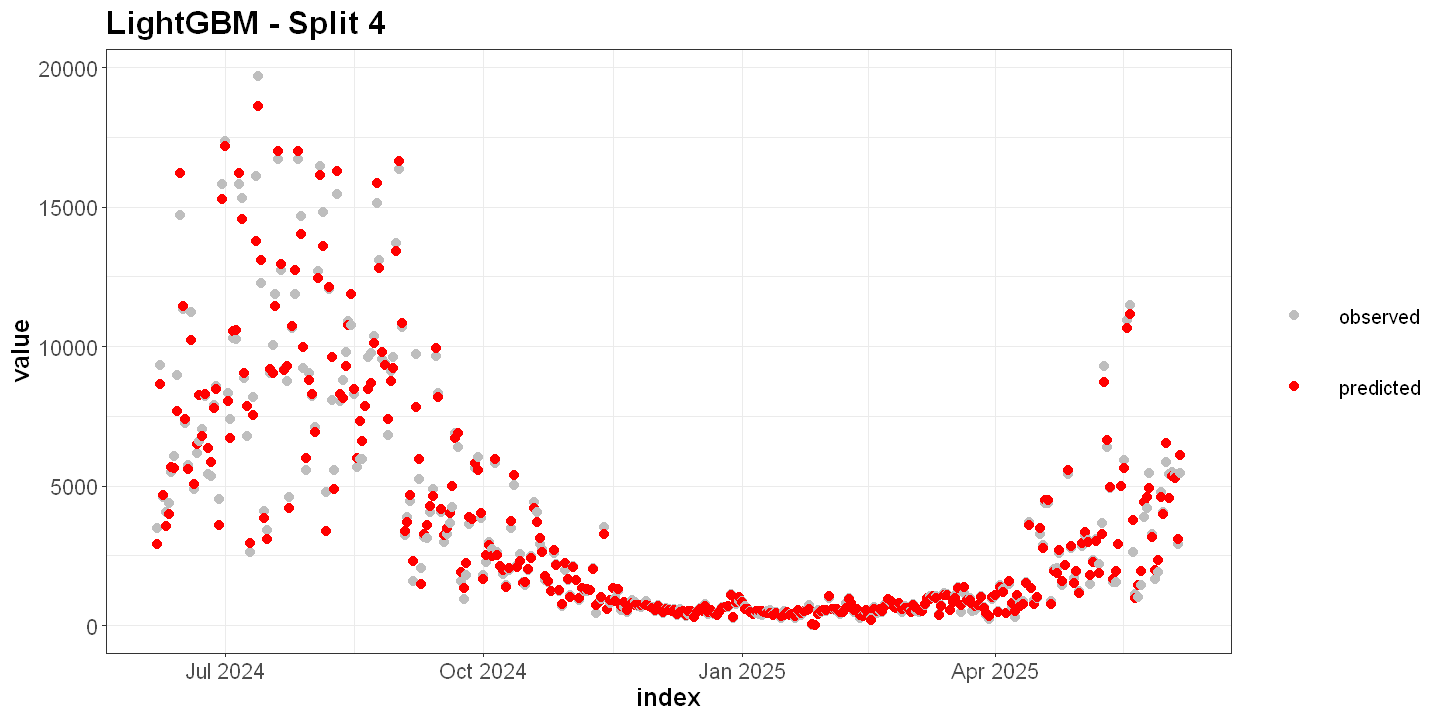

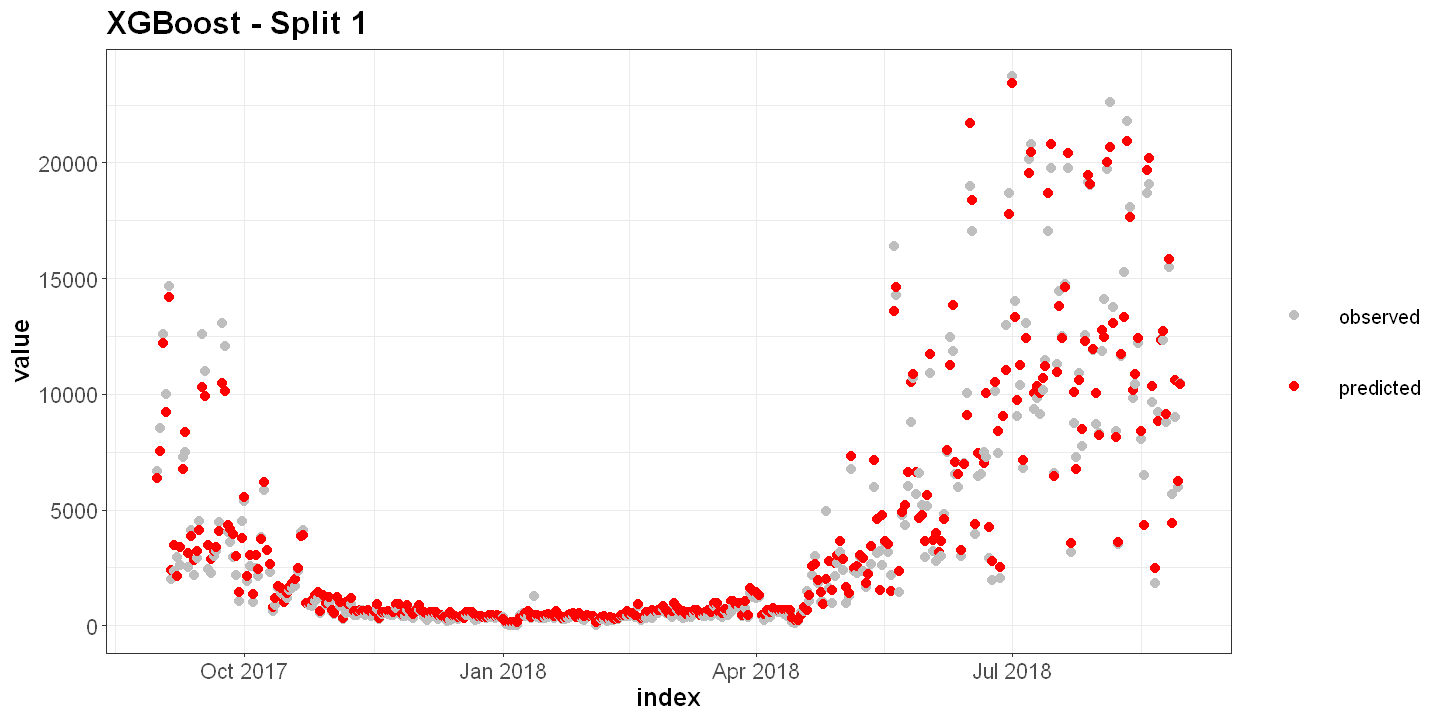

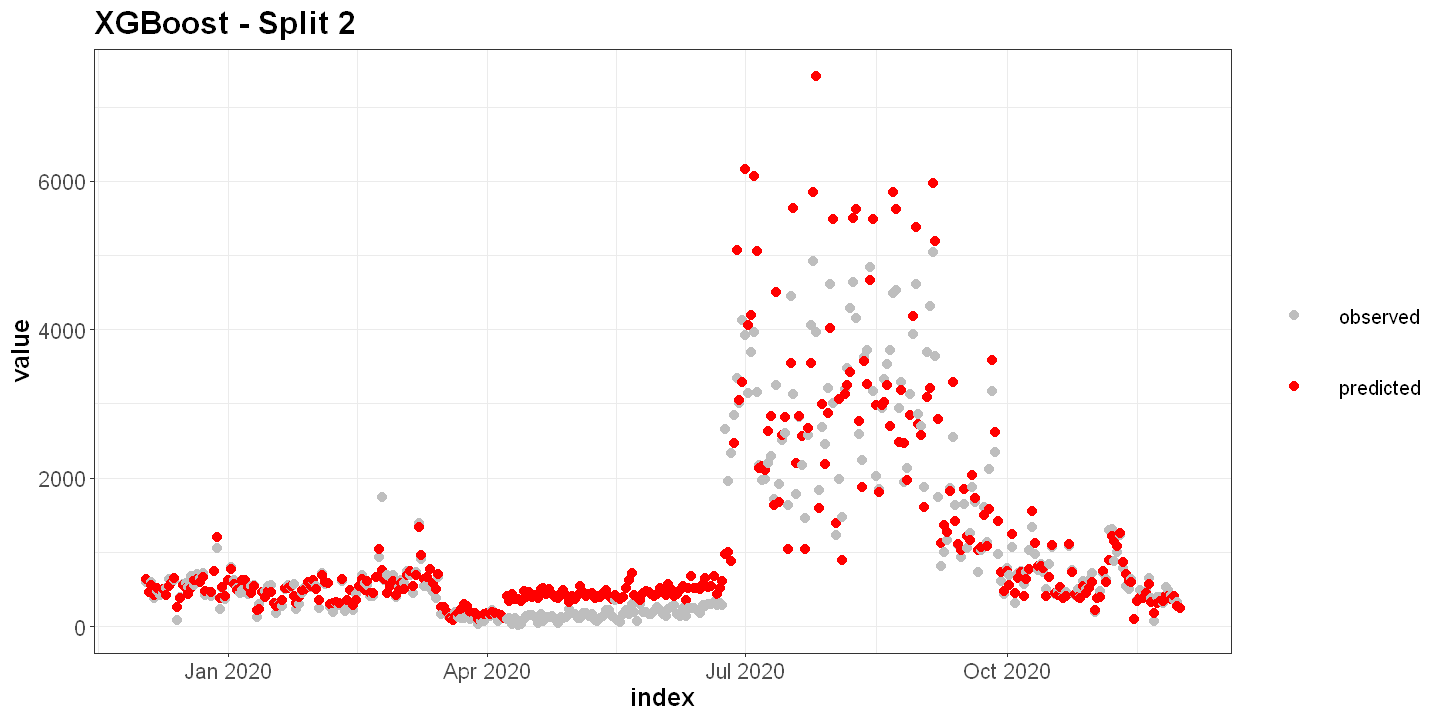

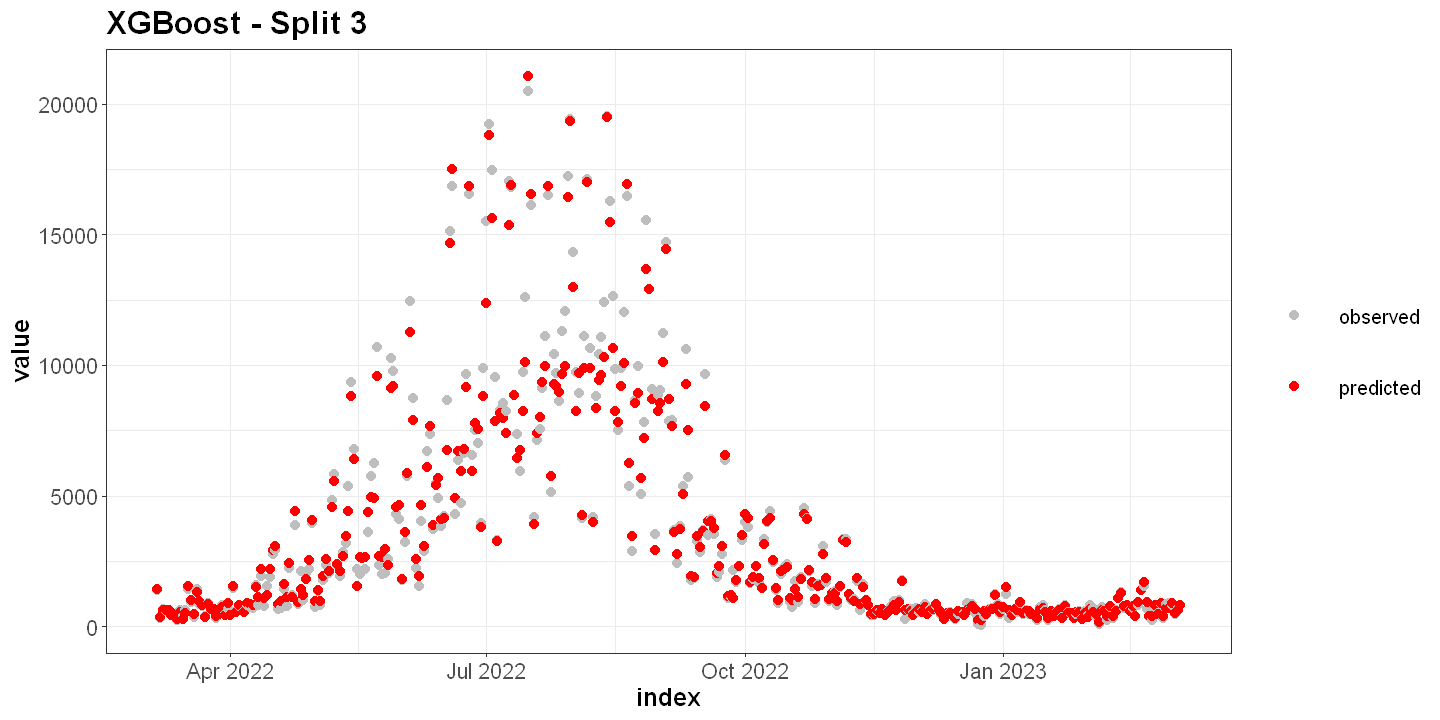

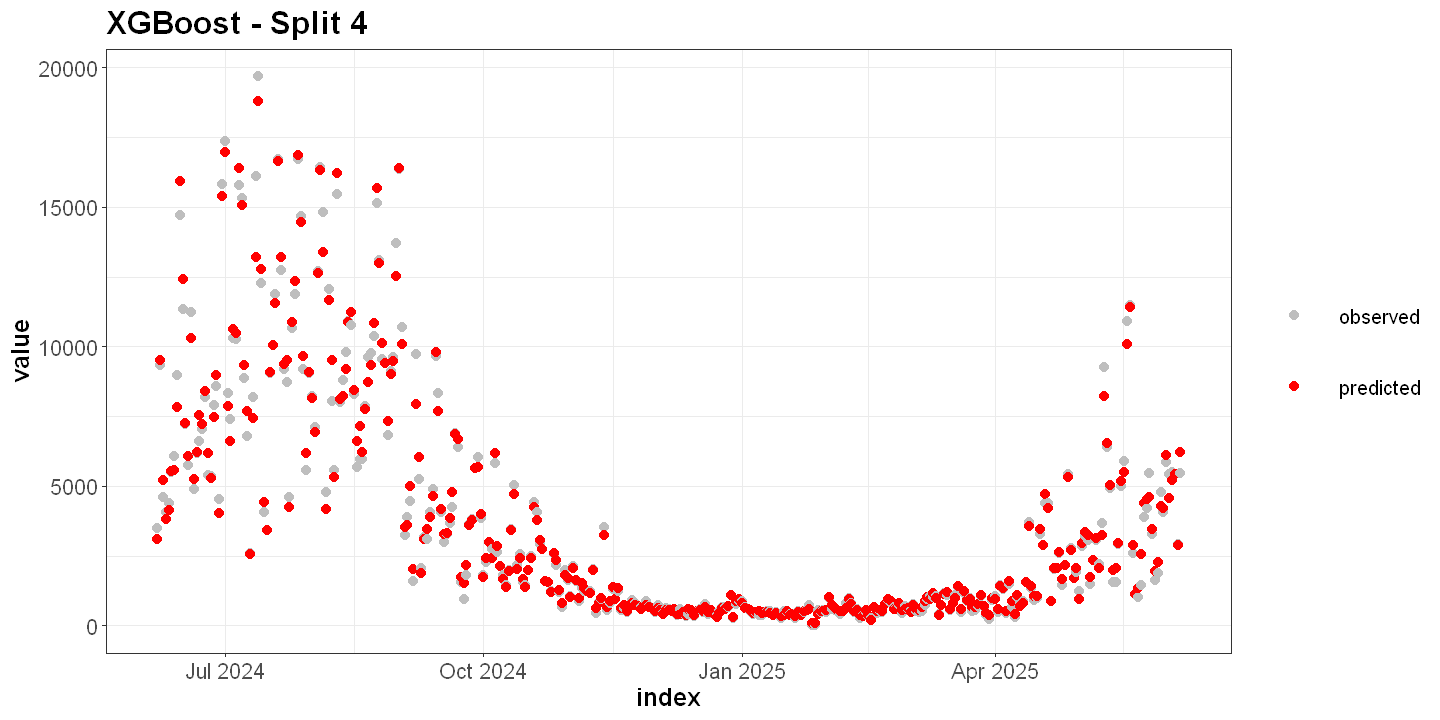

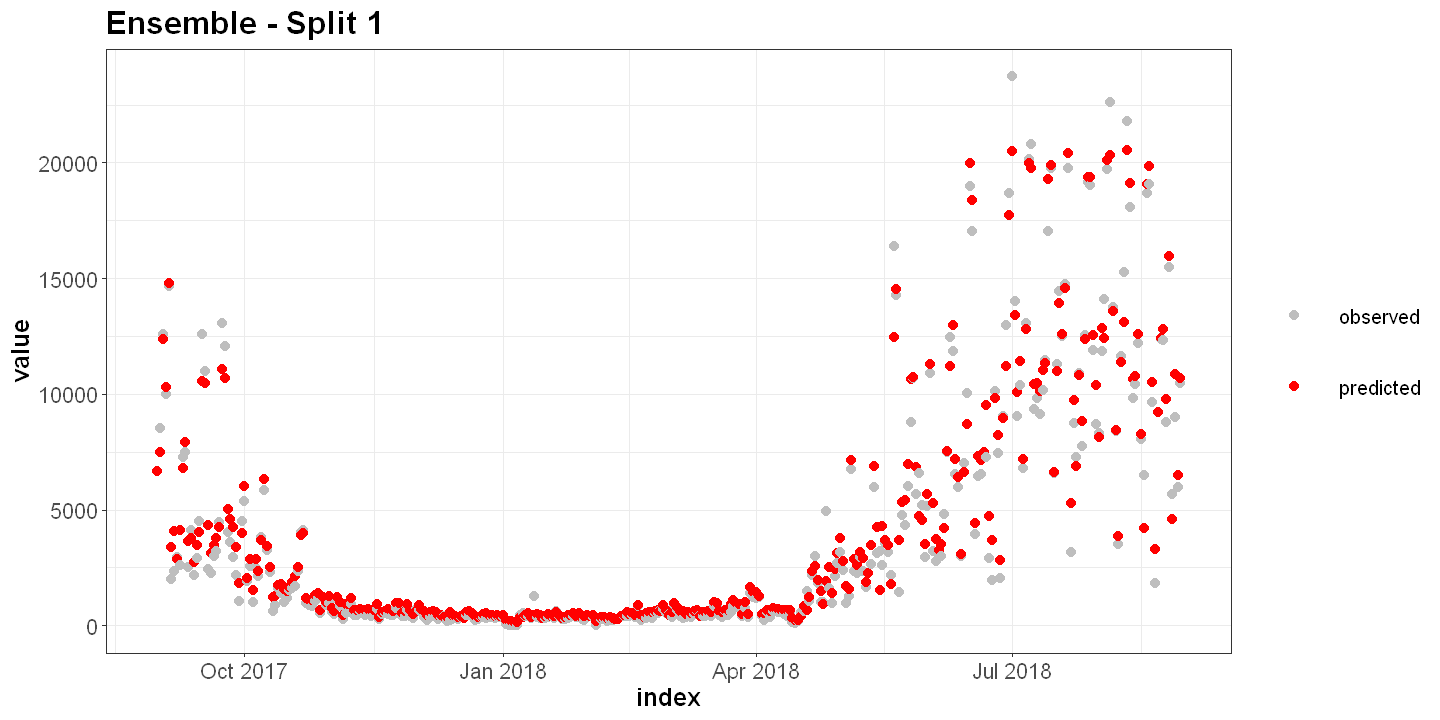

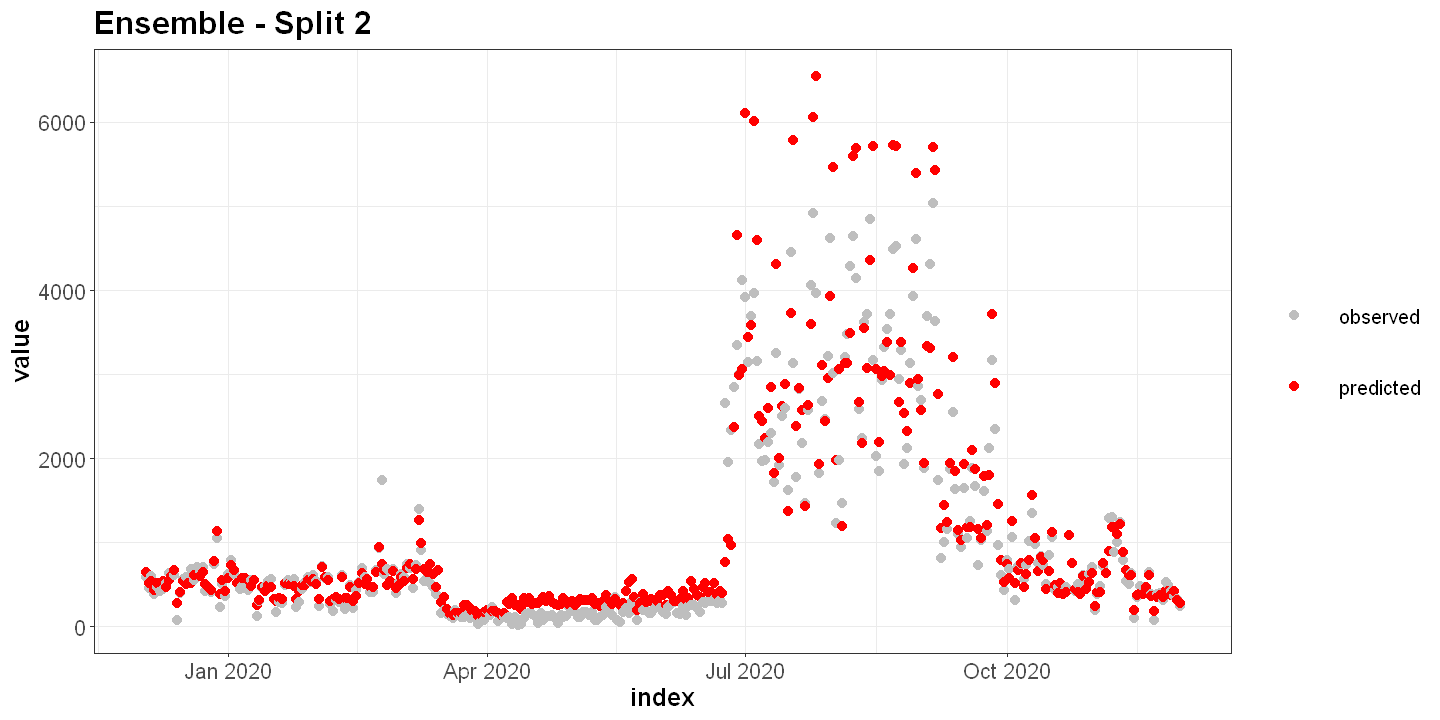

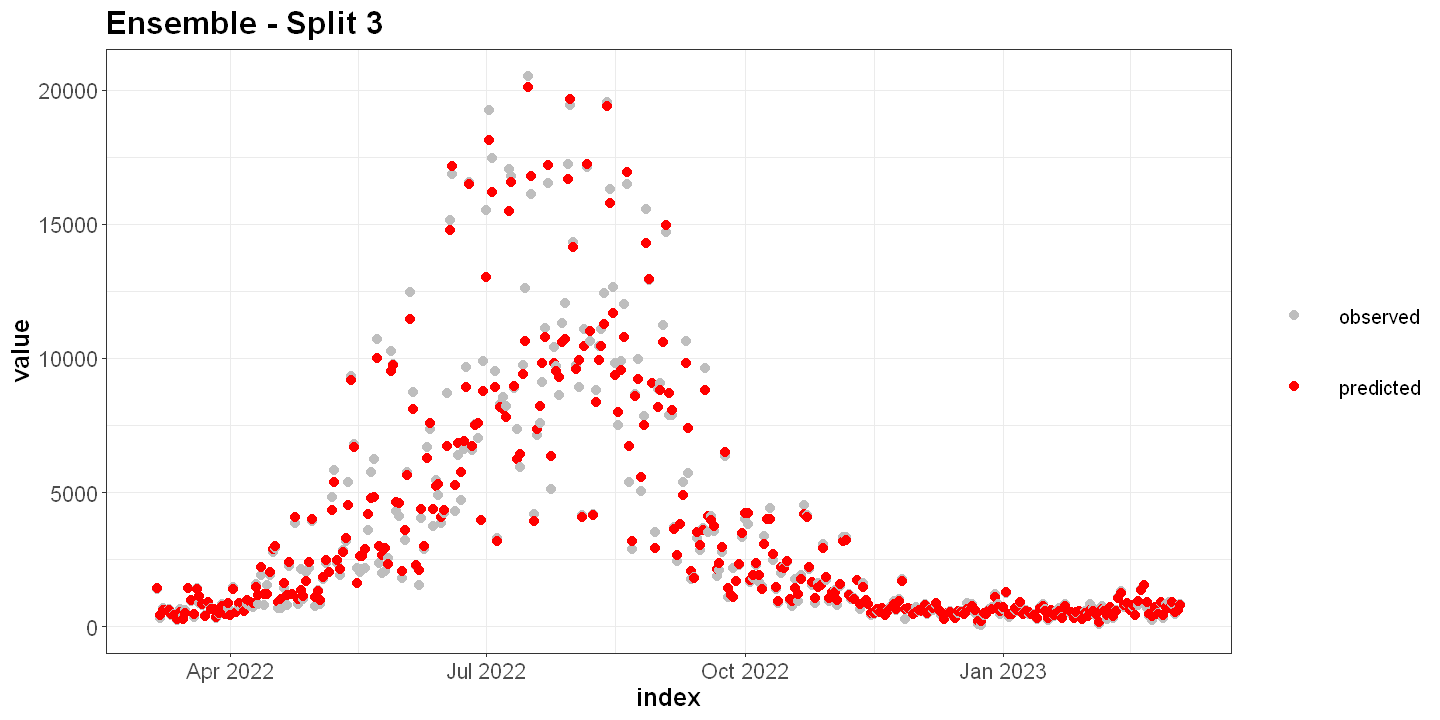

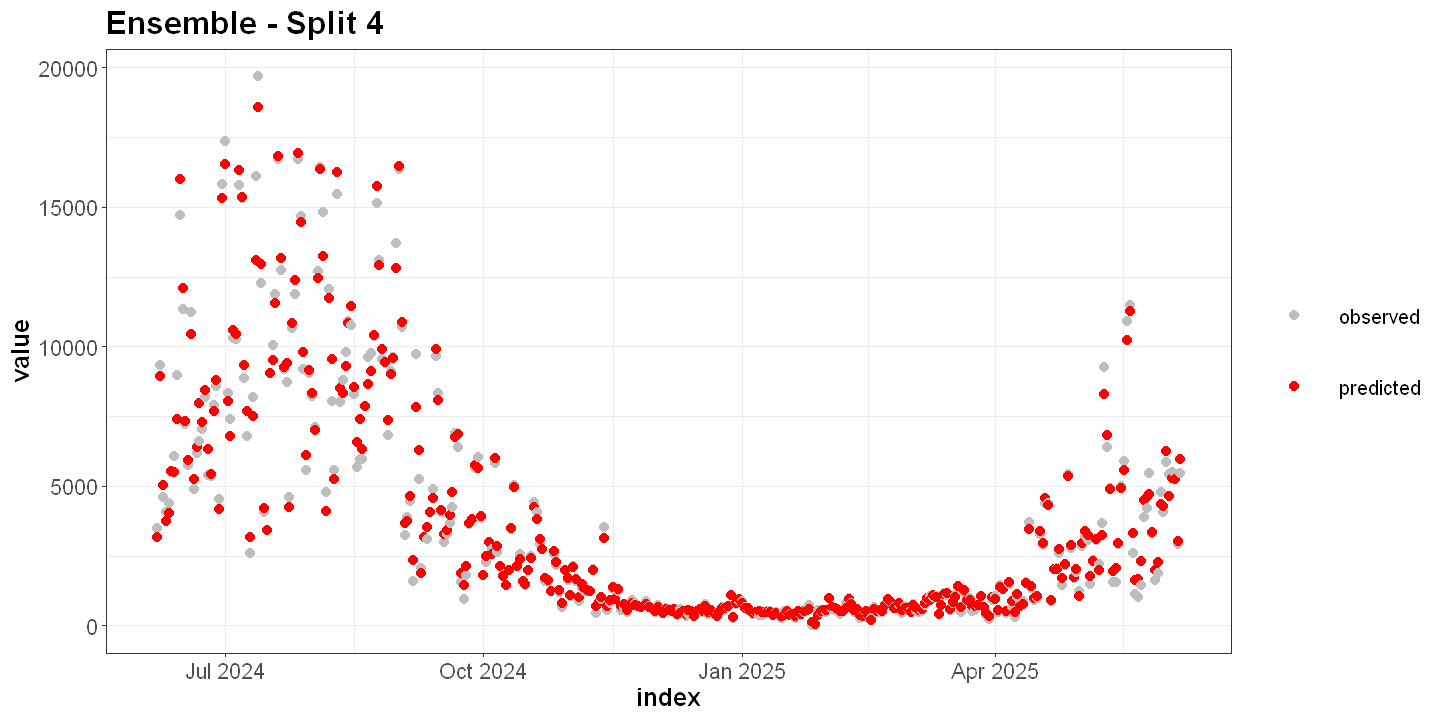

In [66]:
plot_predictions(data = df, preds = sc_result1$preds, target_col = "Sales_Count")

### Plot Variable Importance

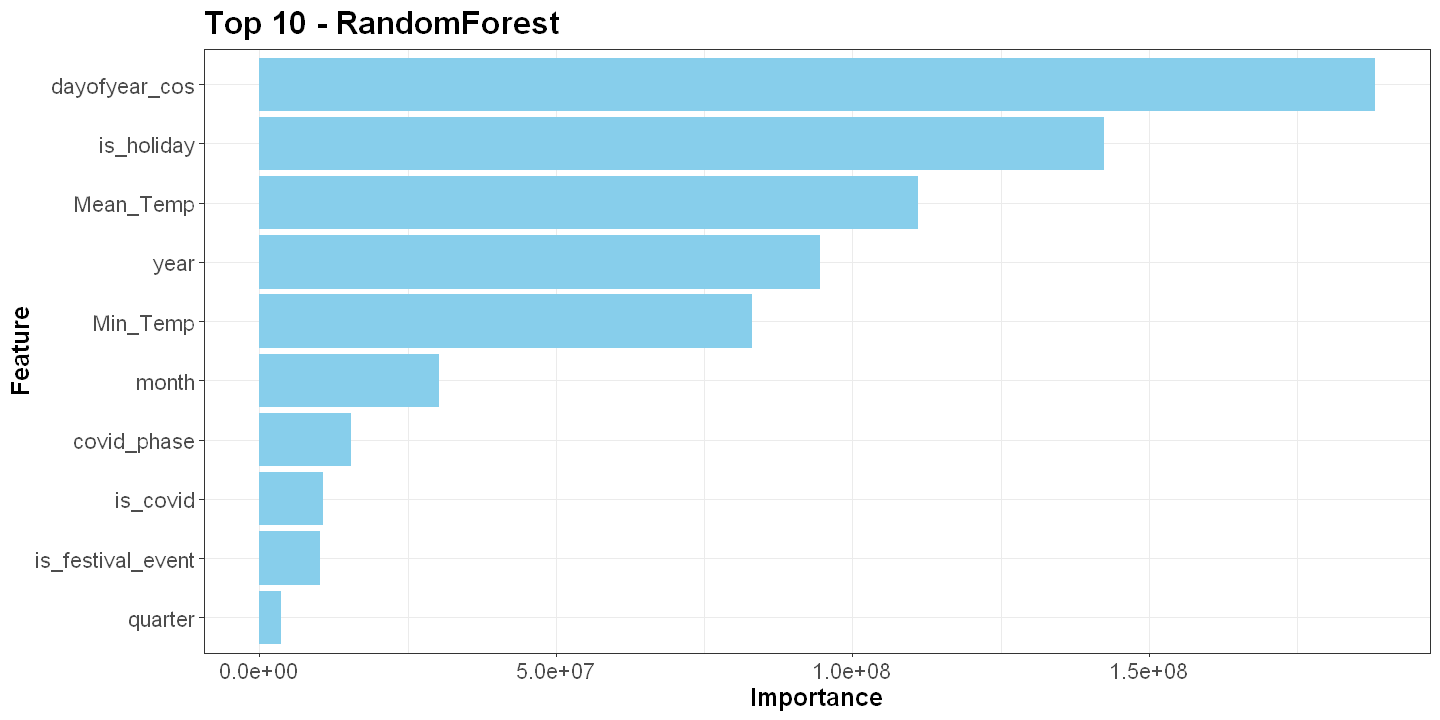

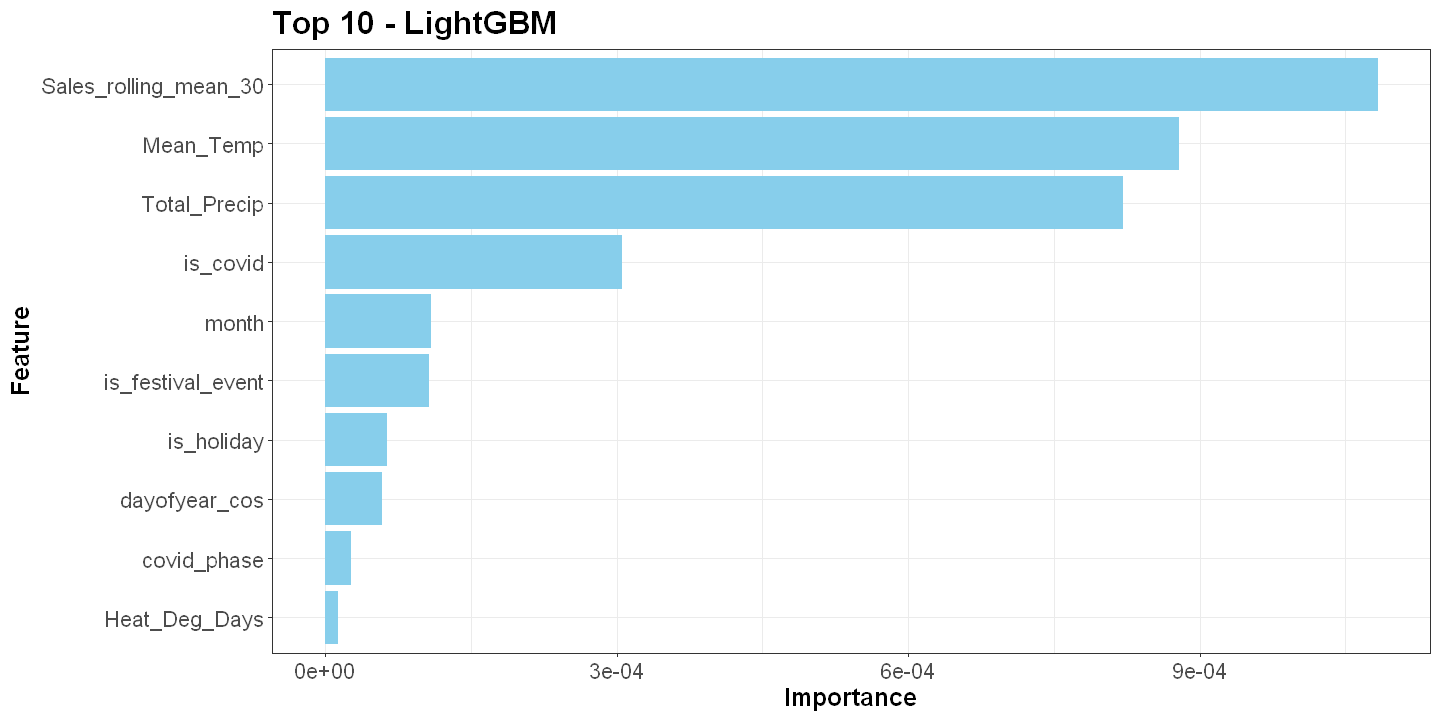

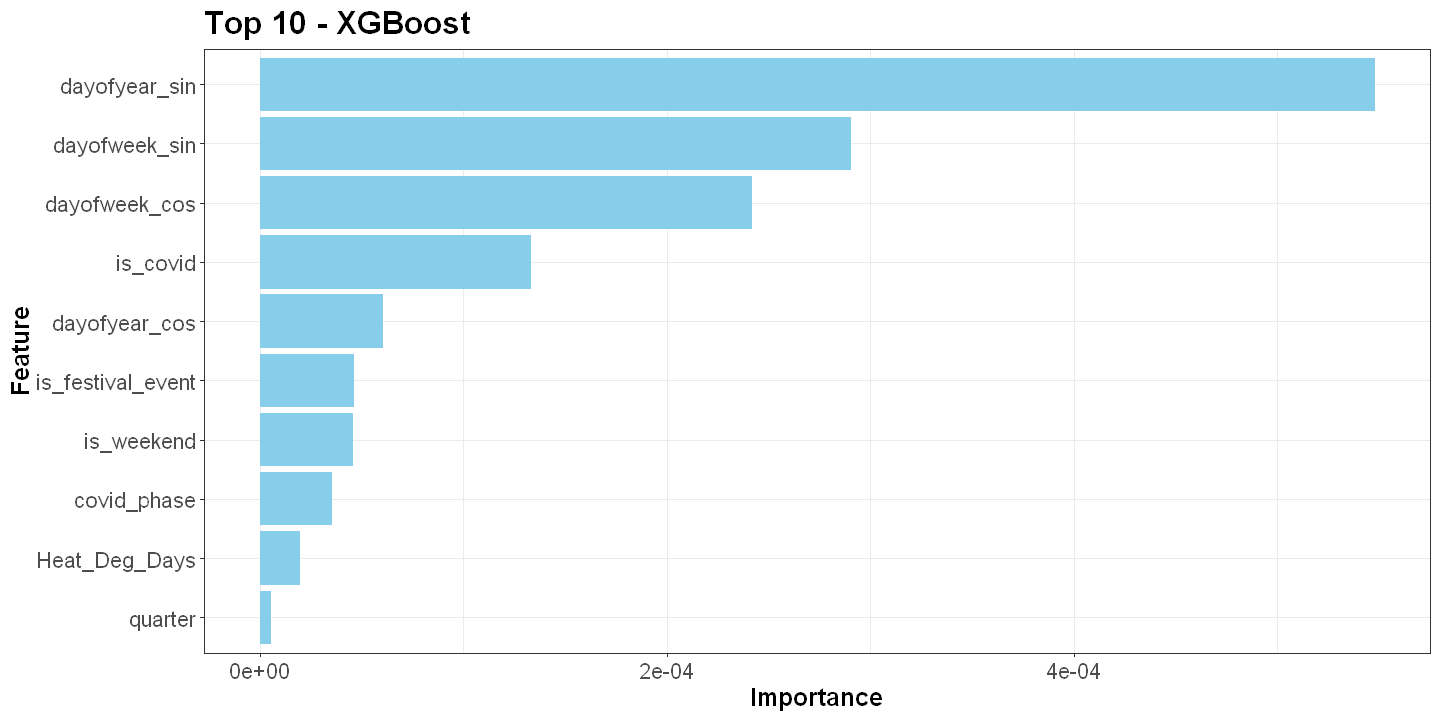

In [67]:
plot_feature_importance(sc_result1$importances)

## Sale Model Excluding Redemption as Covariate

### Train the Model

In [69]:
sc_result2 <- run_cv_model(data = df%>%dplyr::select(-Redemption_Count), target_col = 'Sales_Count', n_splits = 4, test_size = 365)

### Model Performance Metric Summary Table

In [70]:
sc_result2$summary

,Base,RandomForest,LightGBM,XGBoost,Ensemble
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MSE,11434444.06,1979531.84,1743398.60,1568171.69,1600421.24
RMSE,3309.38,1362.03,1287.67,1231.17,1235.81
MAE,1909.93,771.14,727.66,701.15,696.75
MAPE,219.97,73.65,66.18,77.46,70.16
R2,-1.93,0.79,0.80,0.78,0.81


### Plot Observed vs Predictions

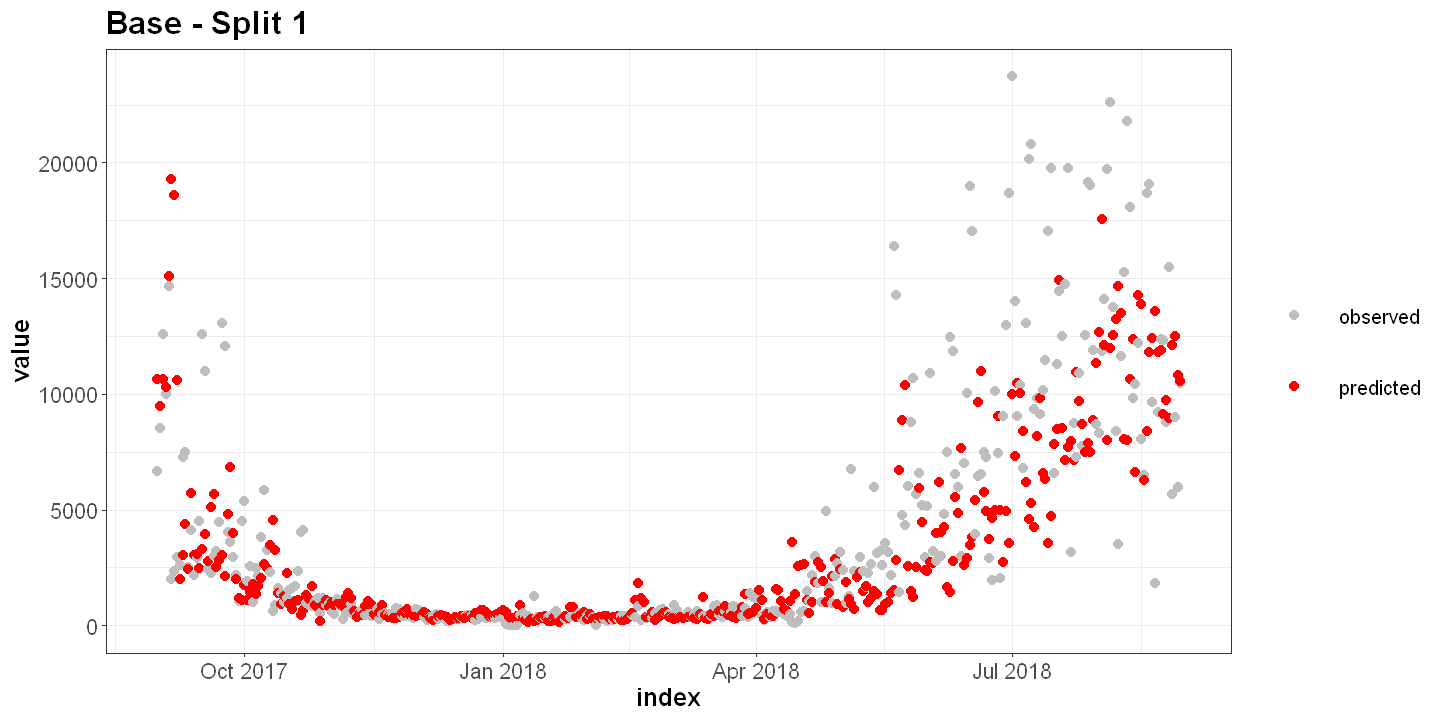

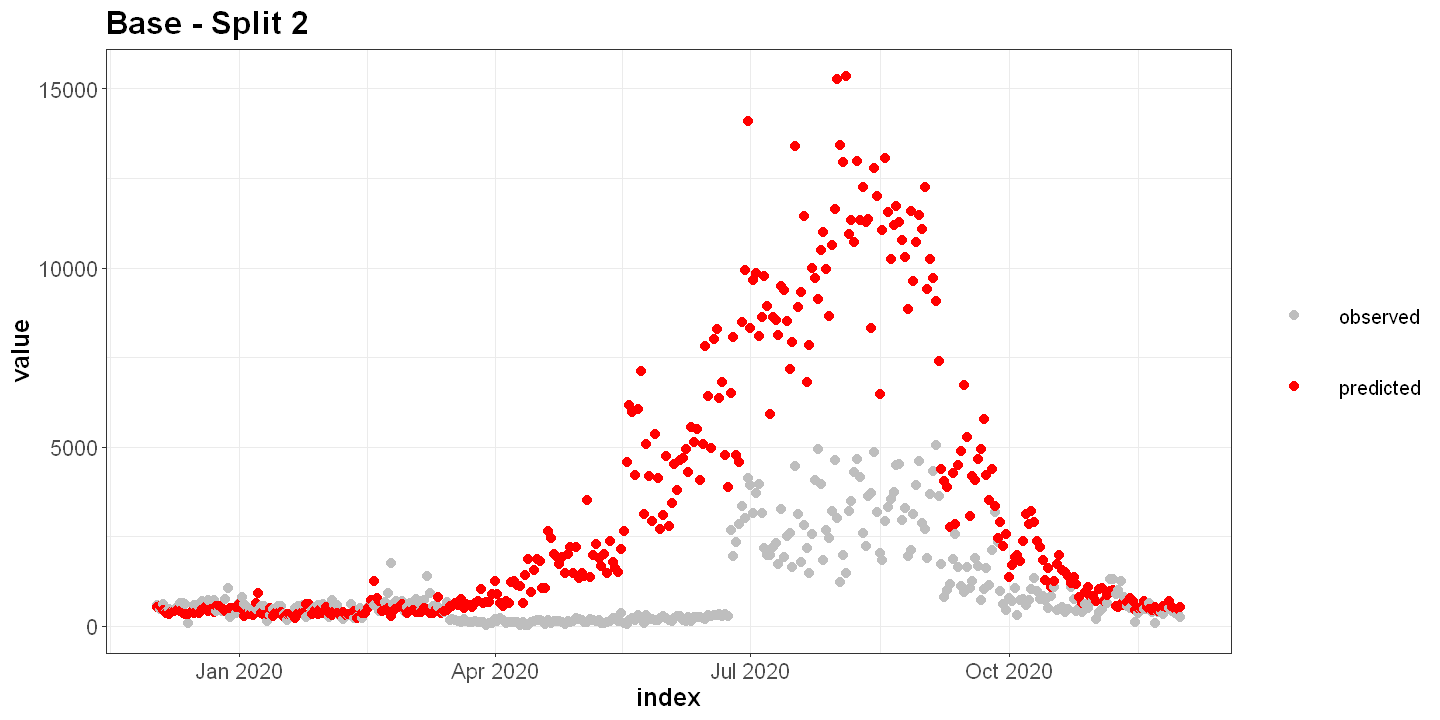

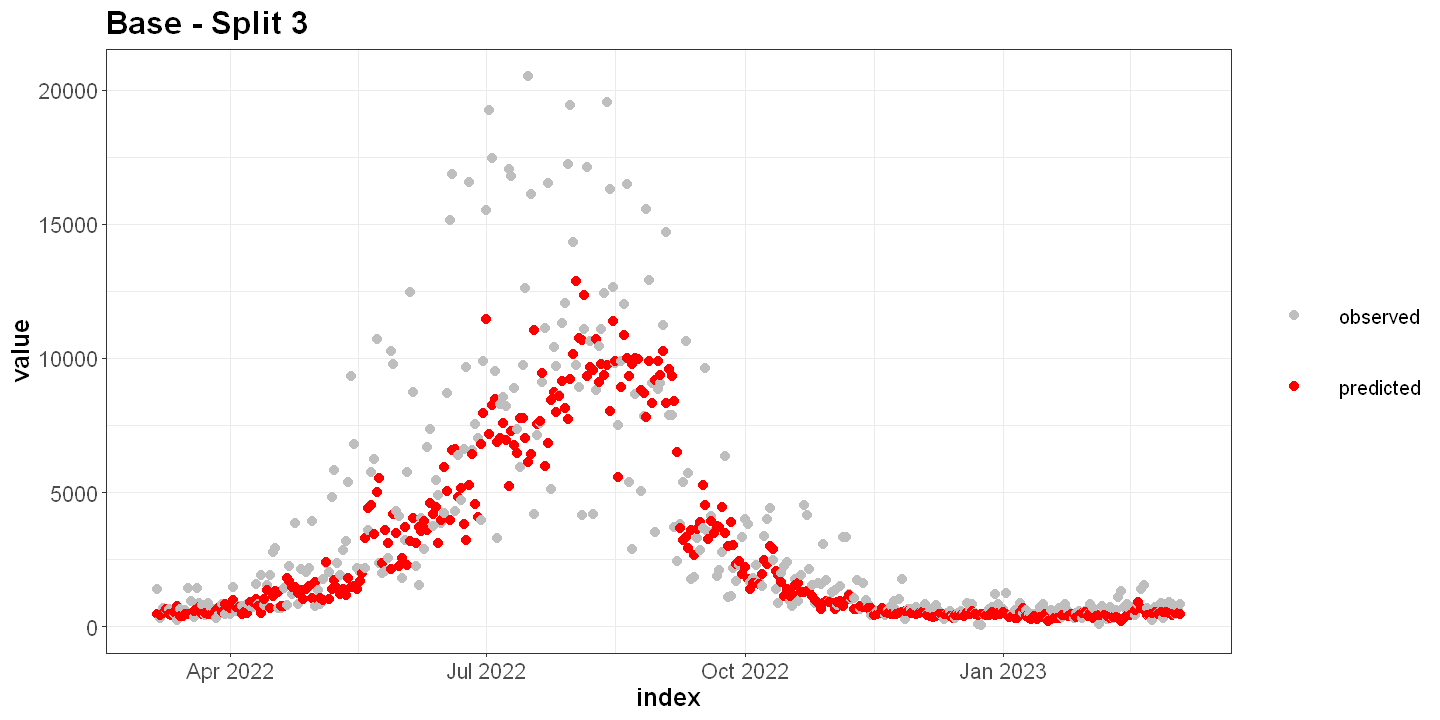

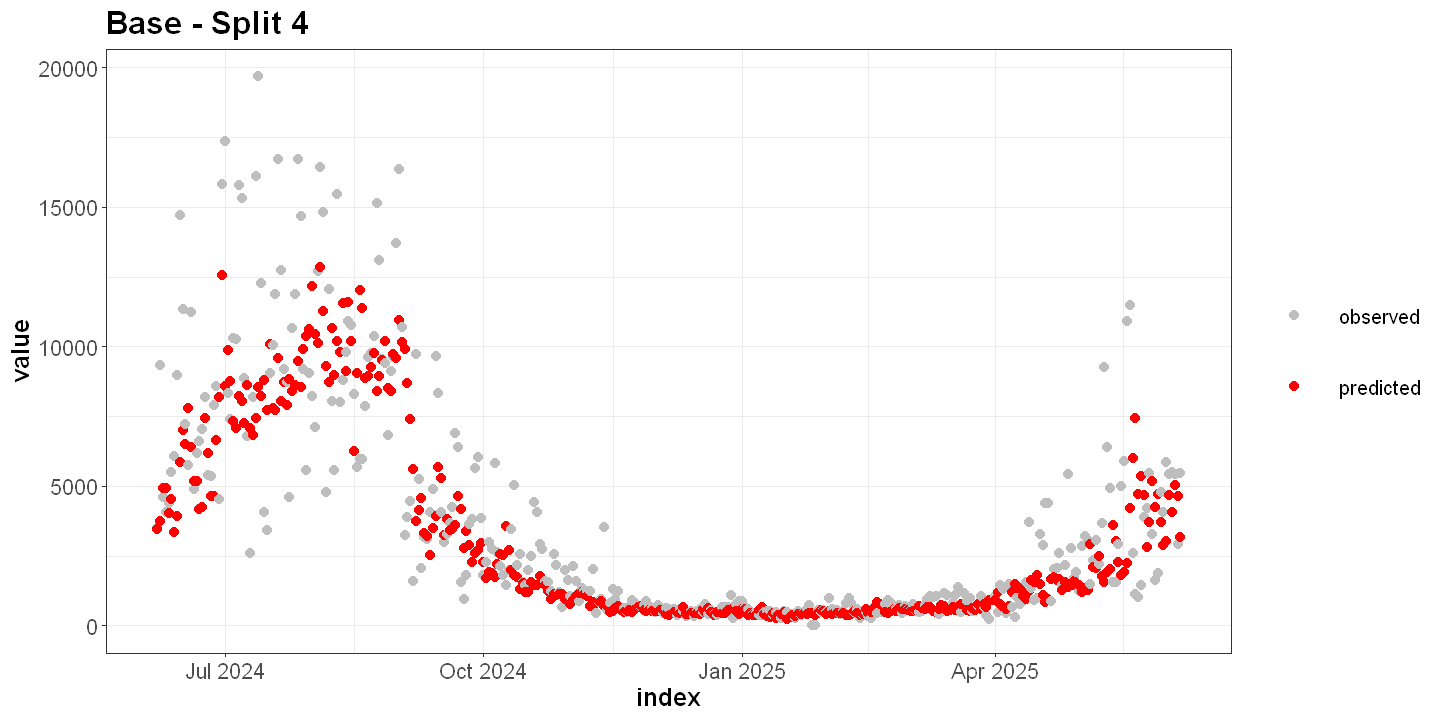

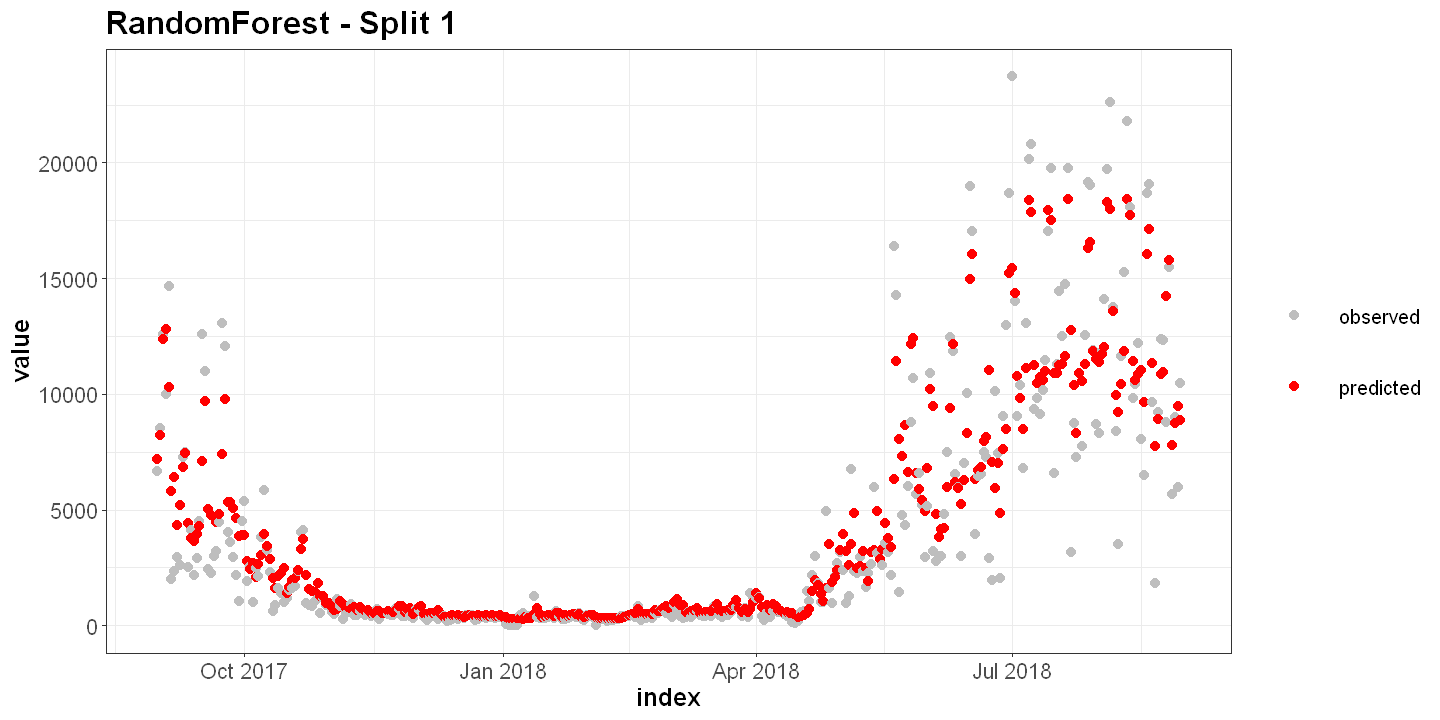

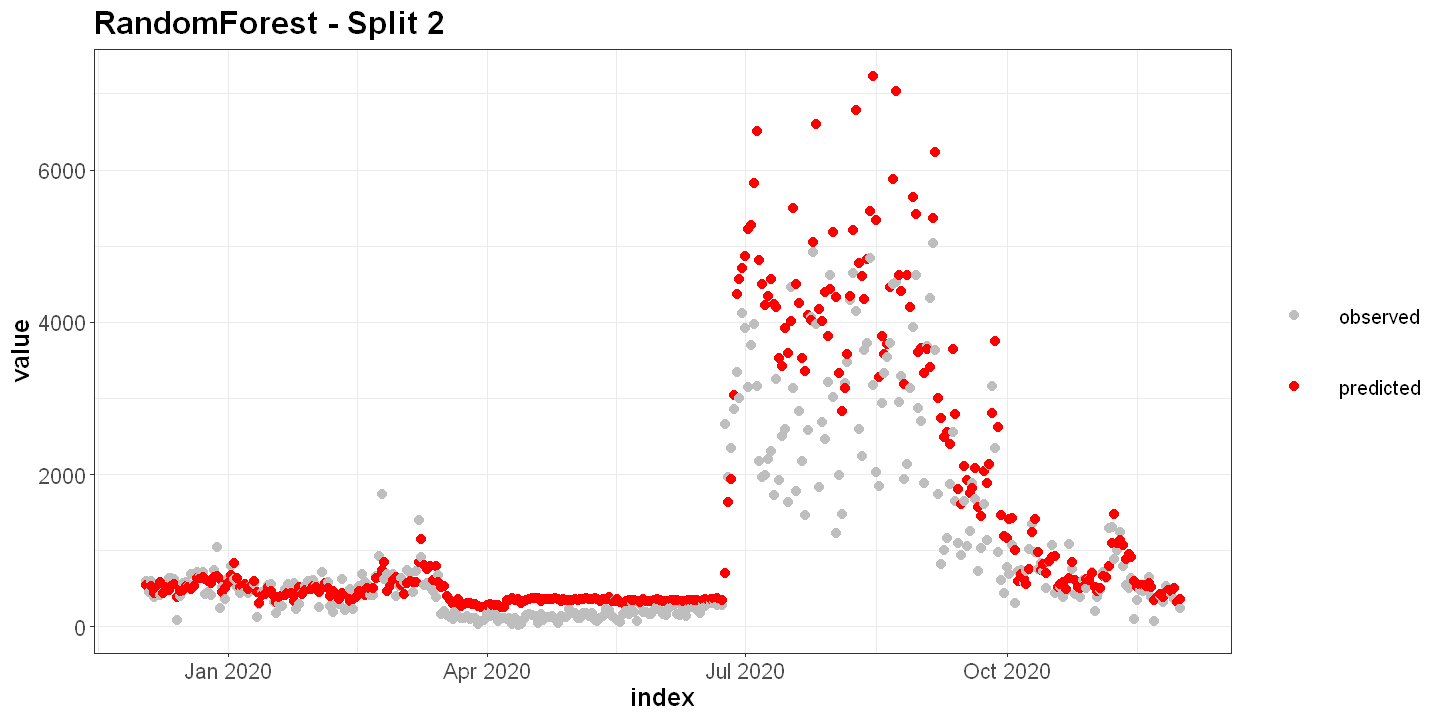

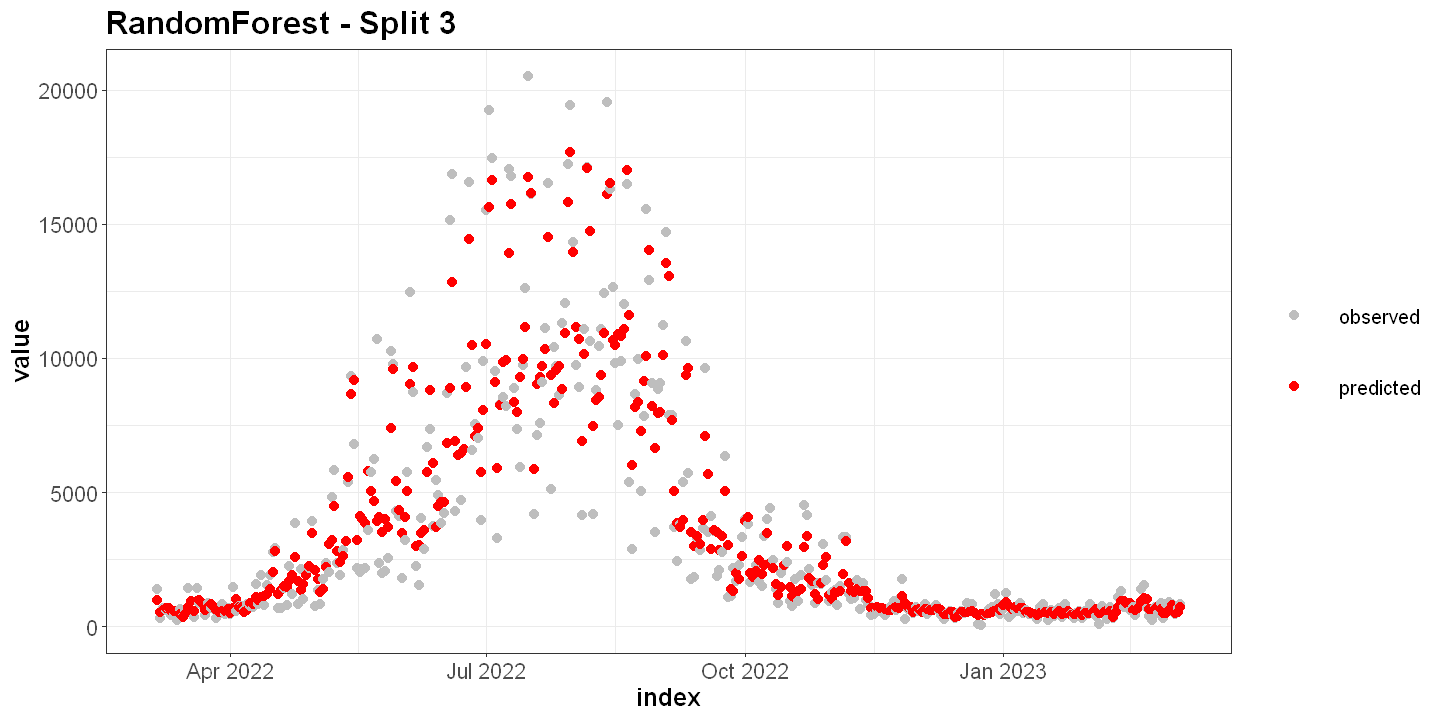

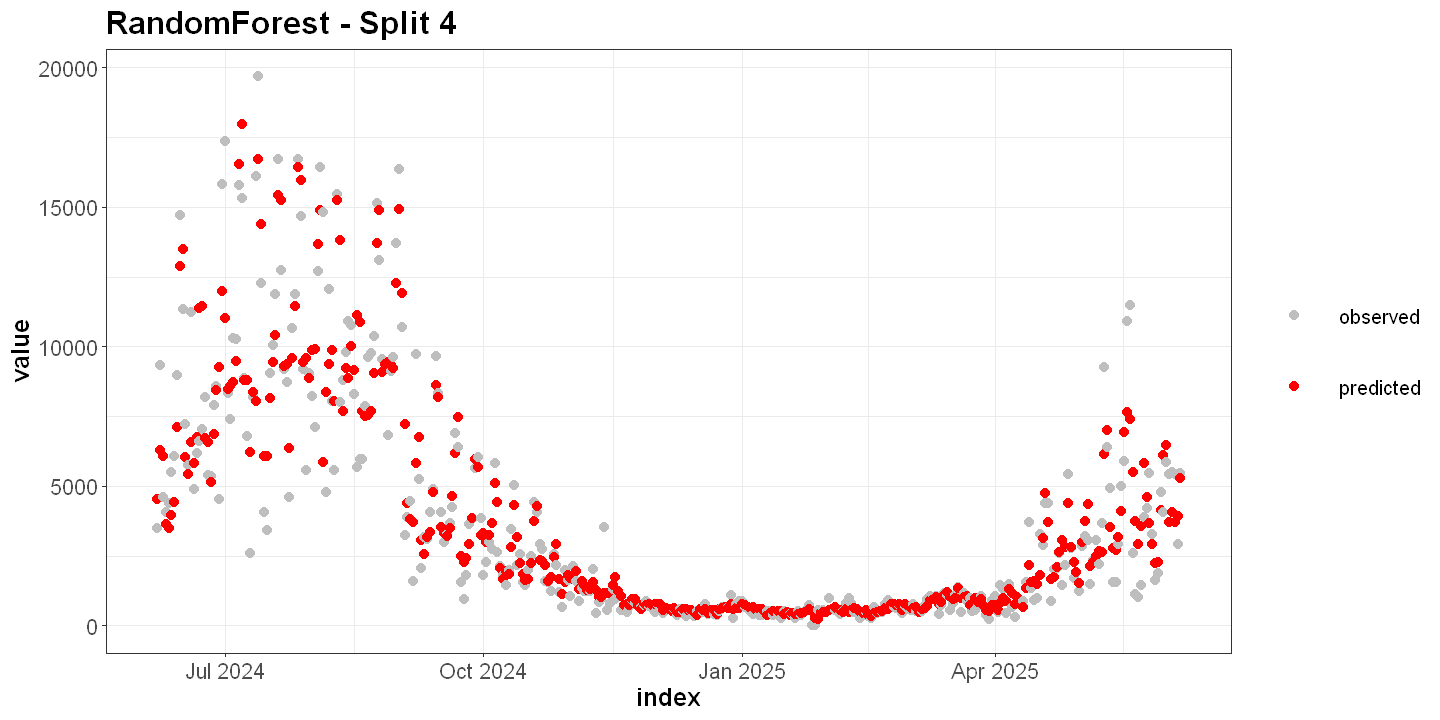

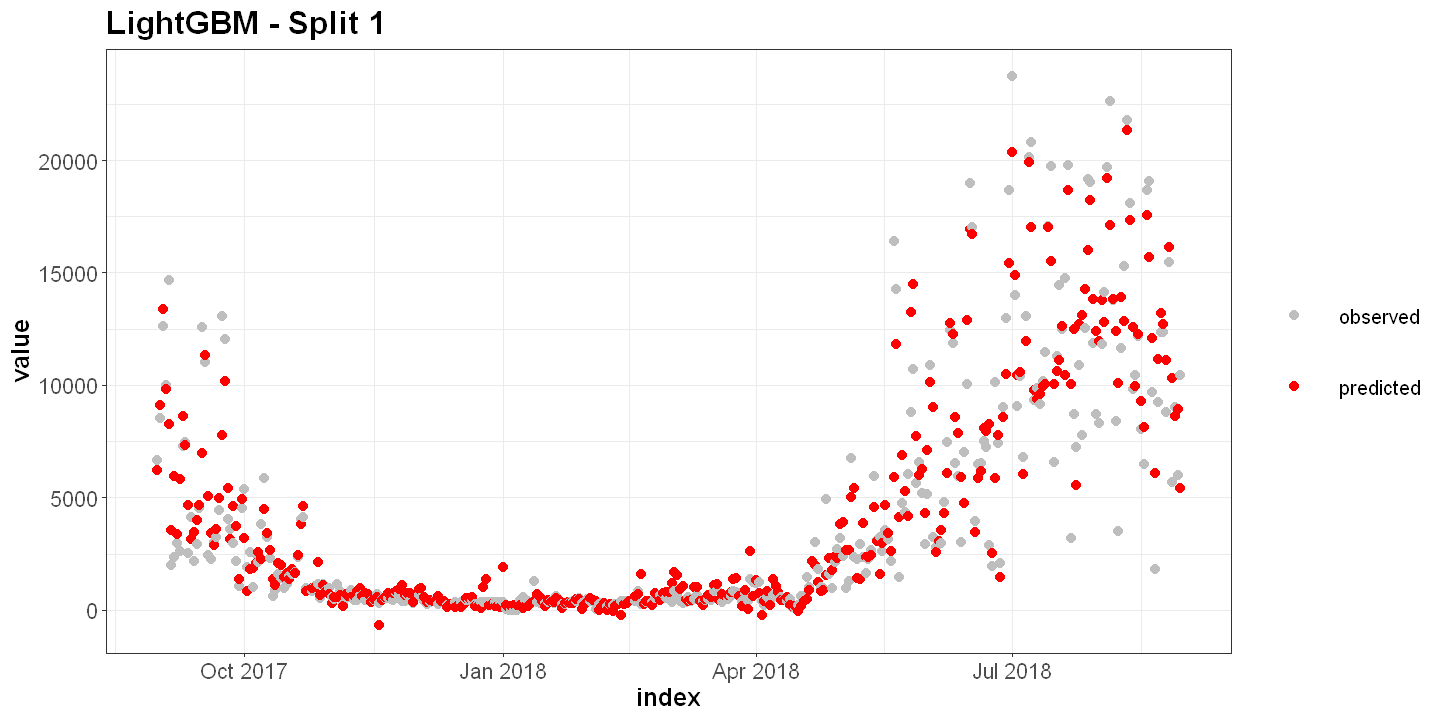

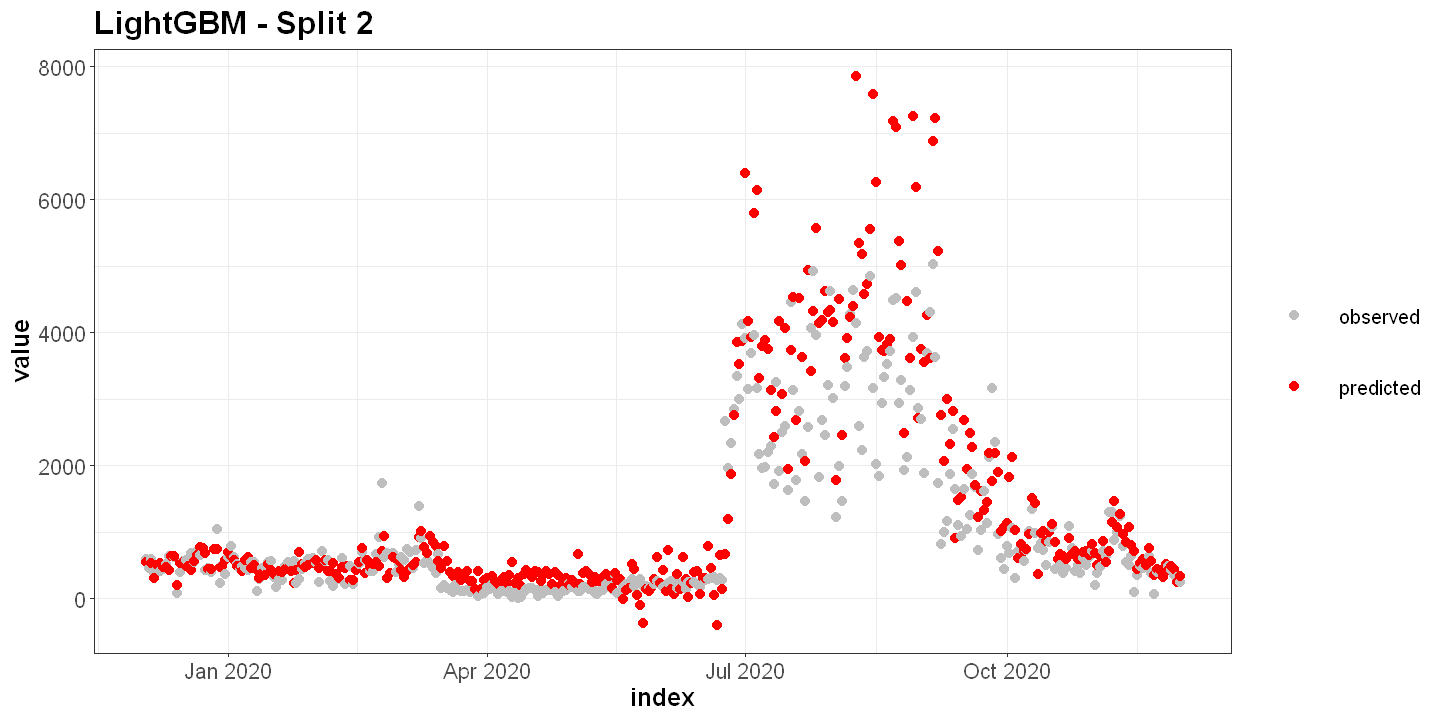

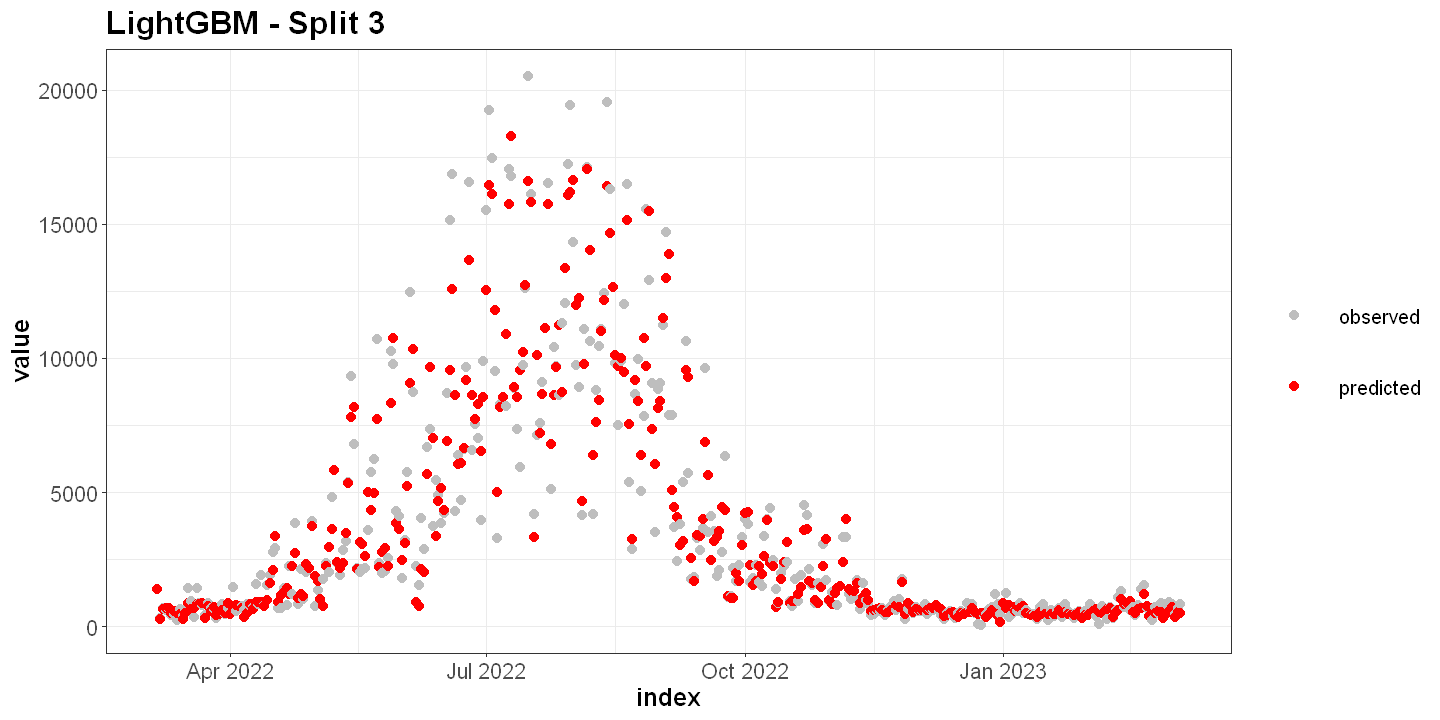

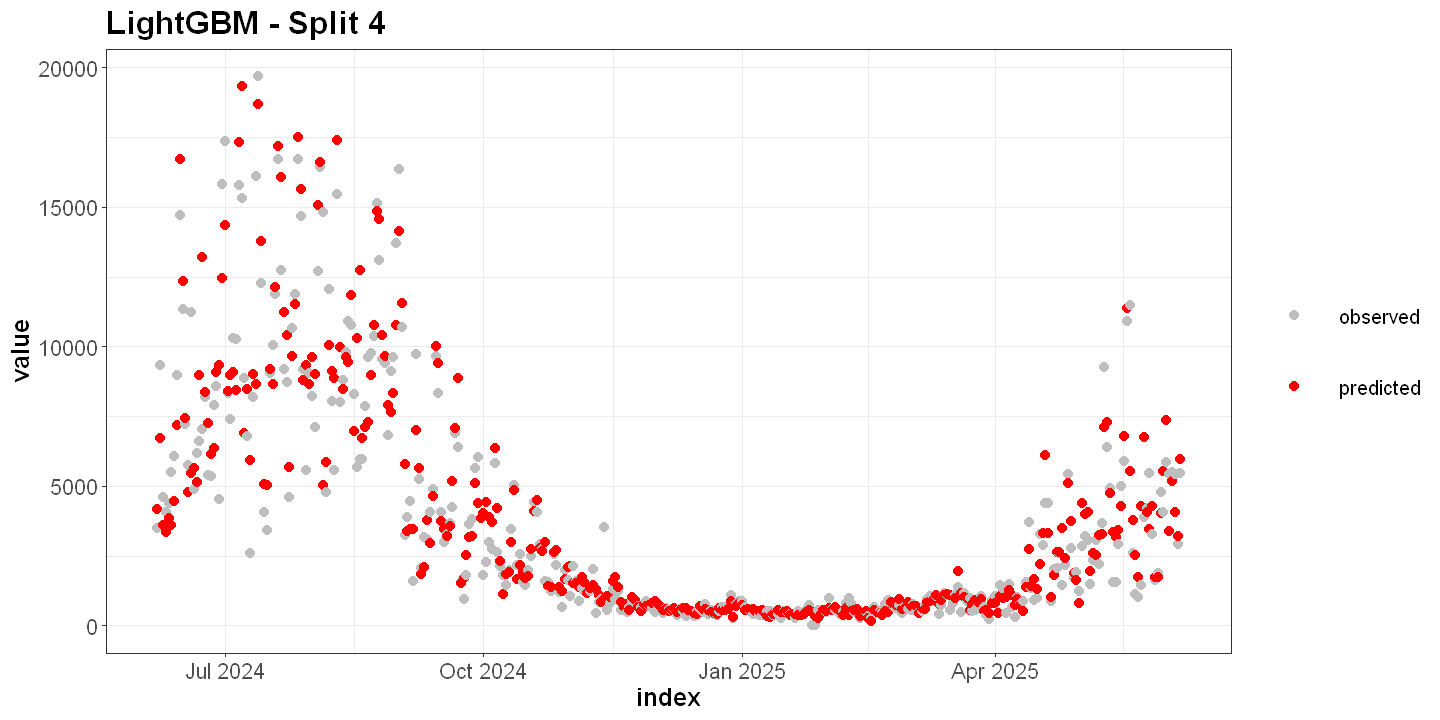

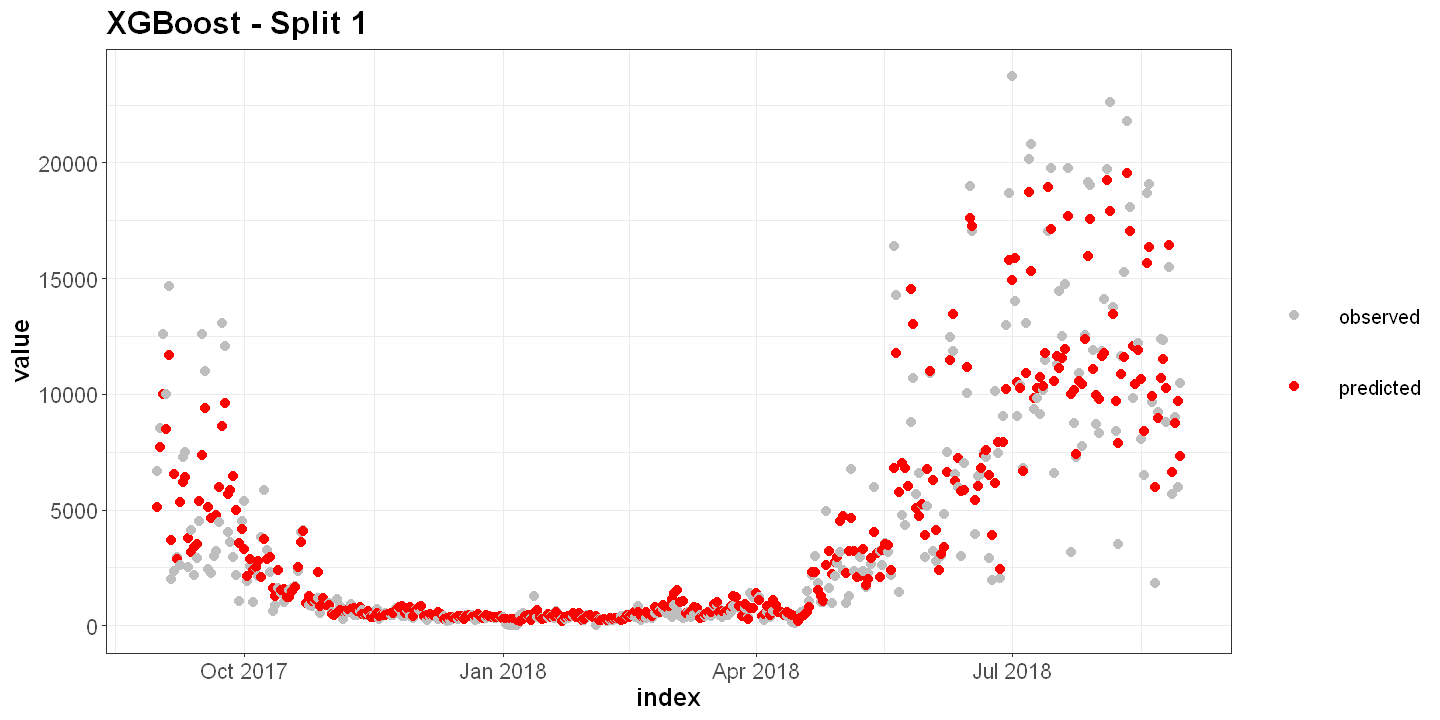

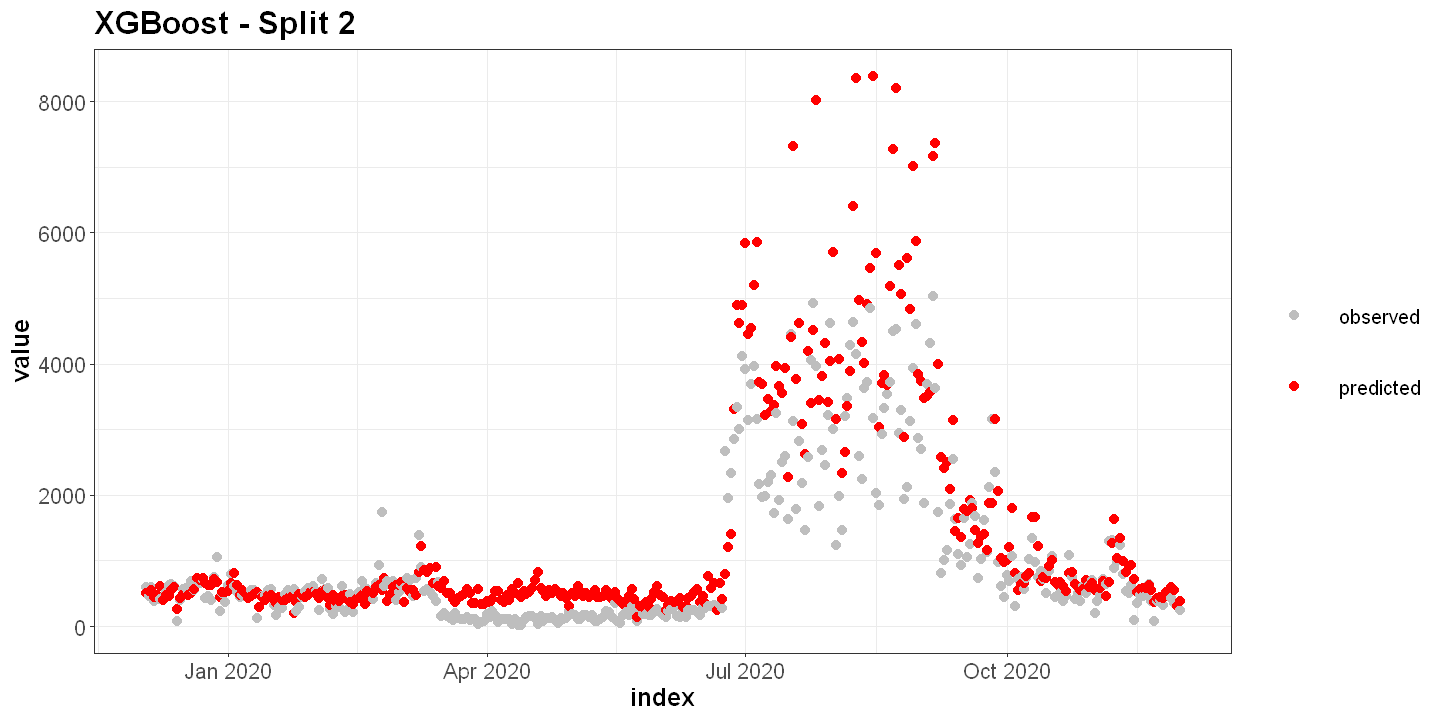

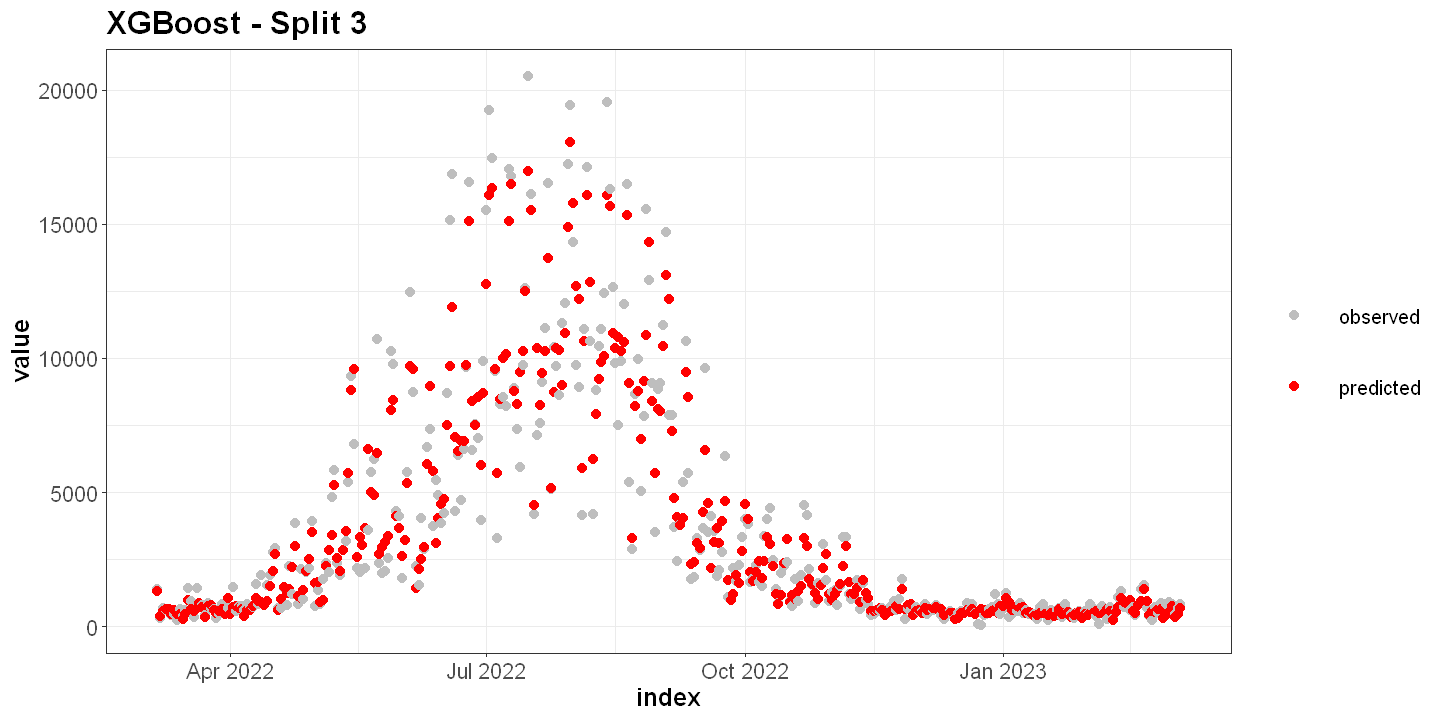

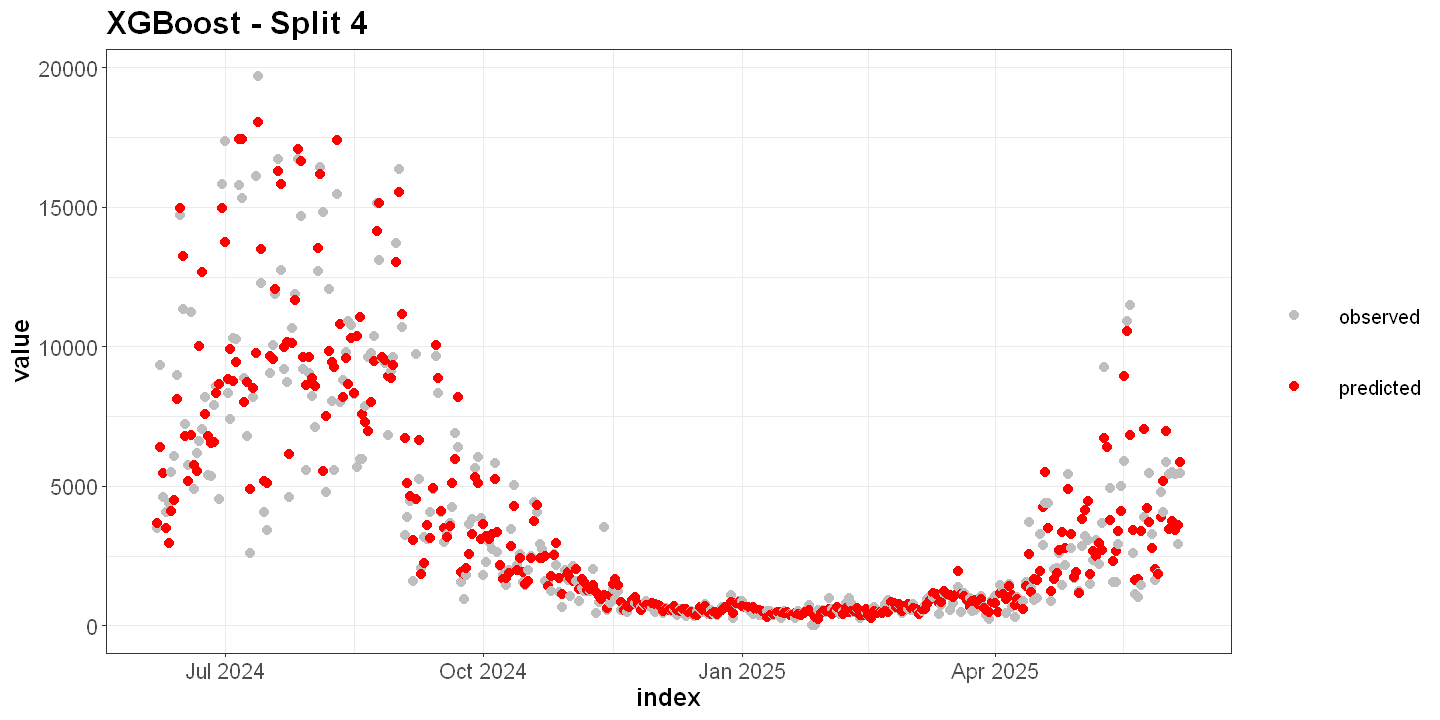

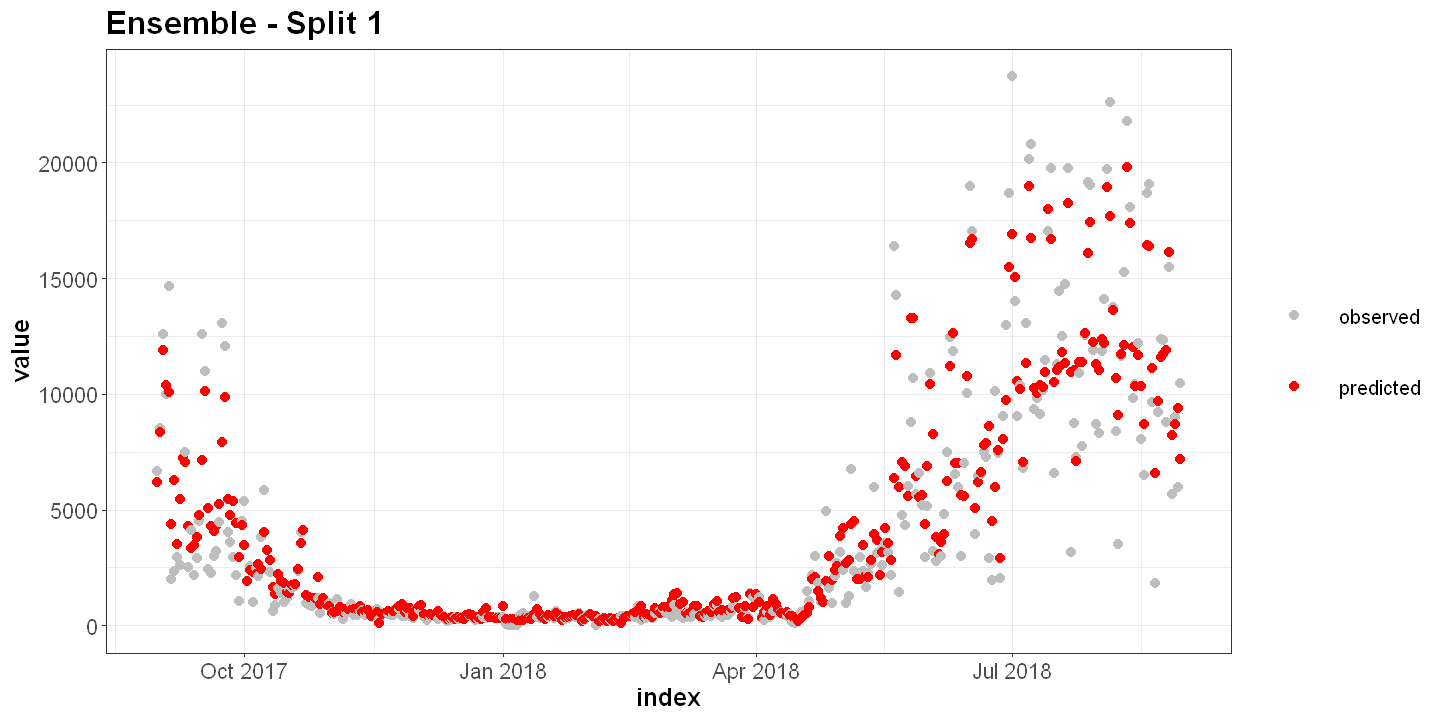

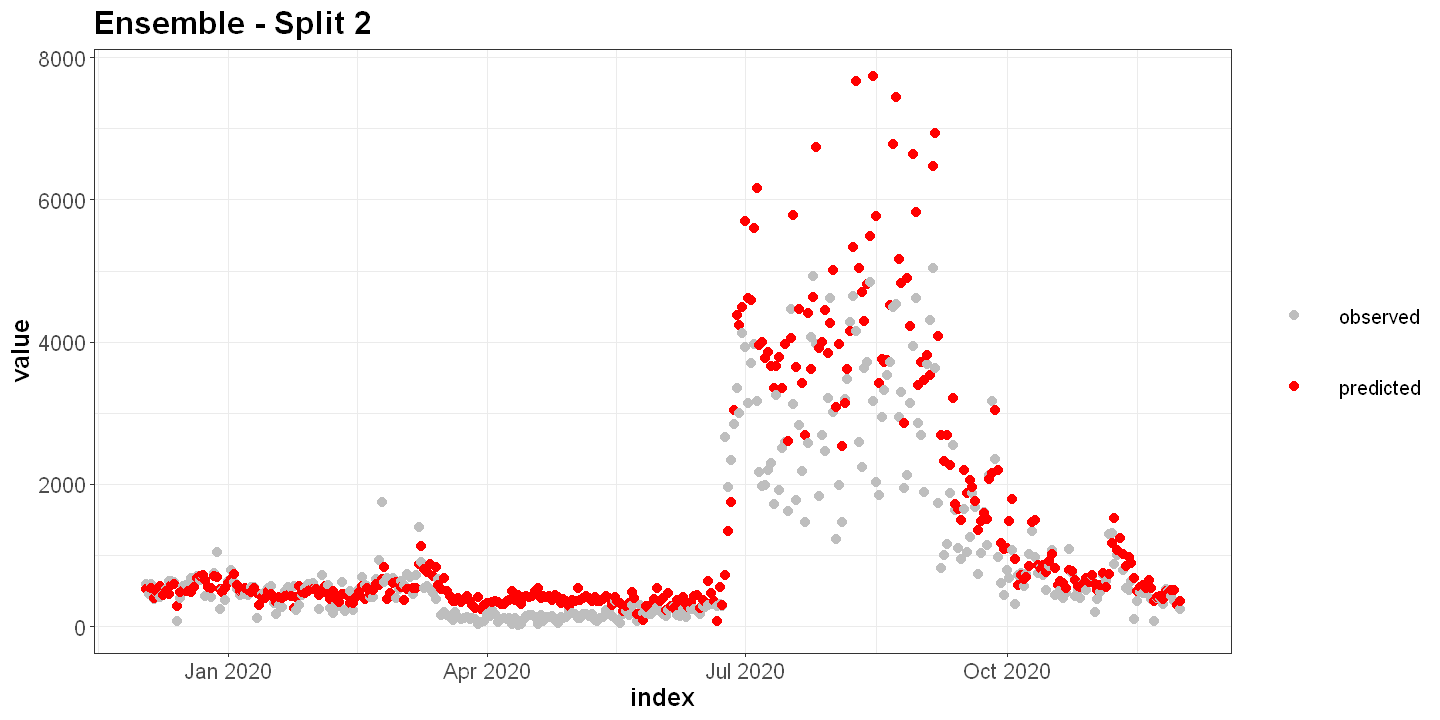

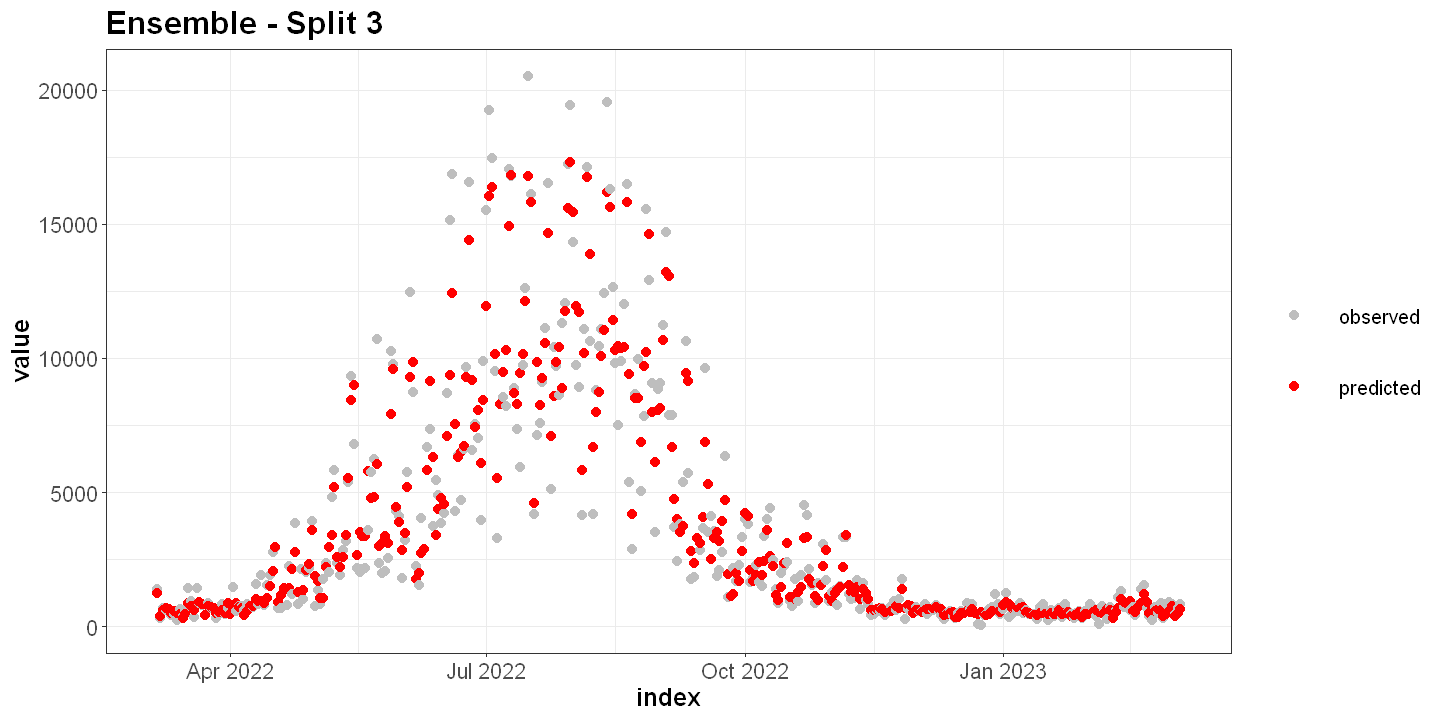

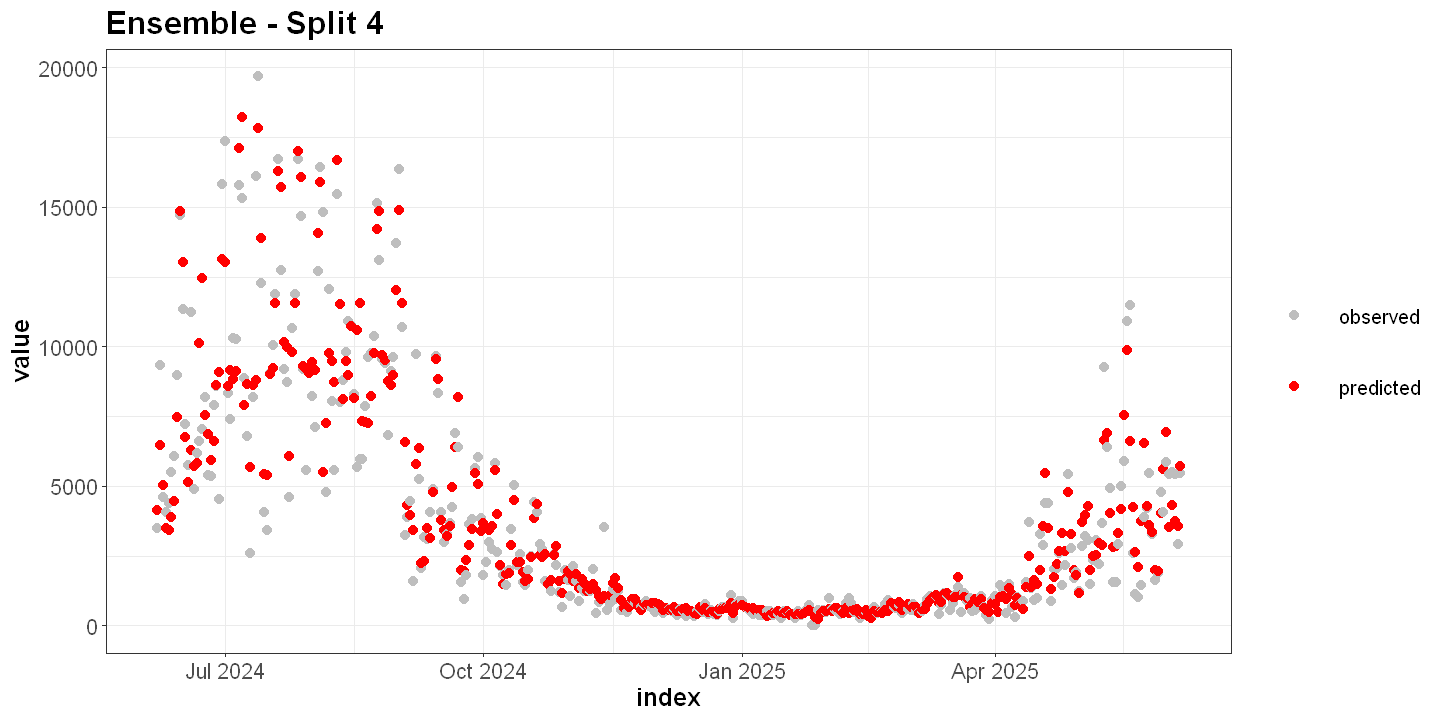

In [71]:
plot_predictions(data = df, preds = sc_result2$preds, target_col = "Sales_Count")

### Plot Variable Importance

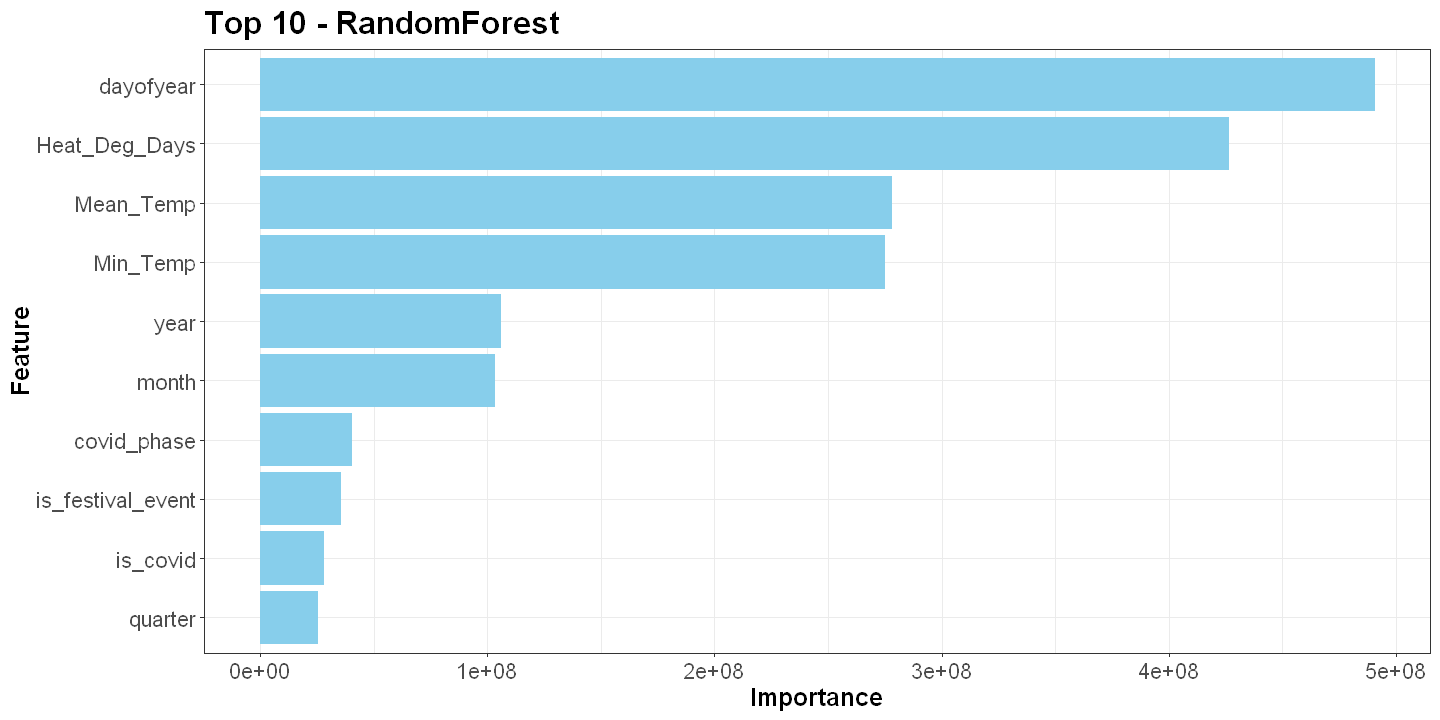

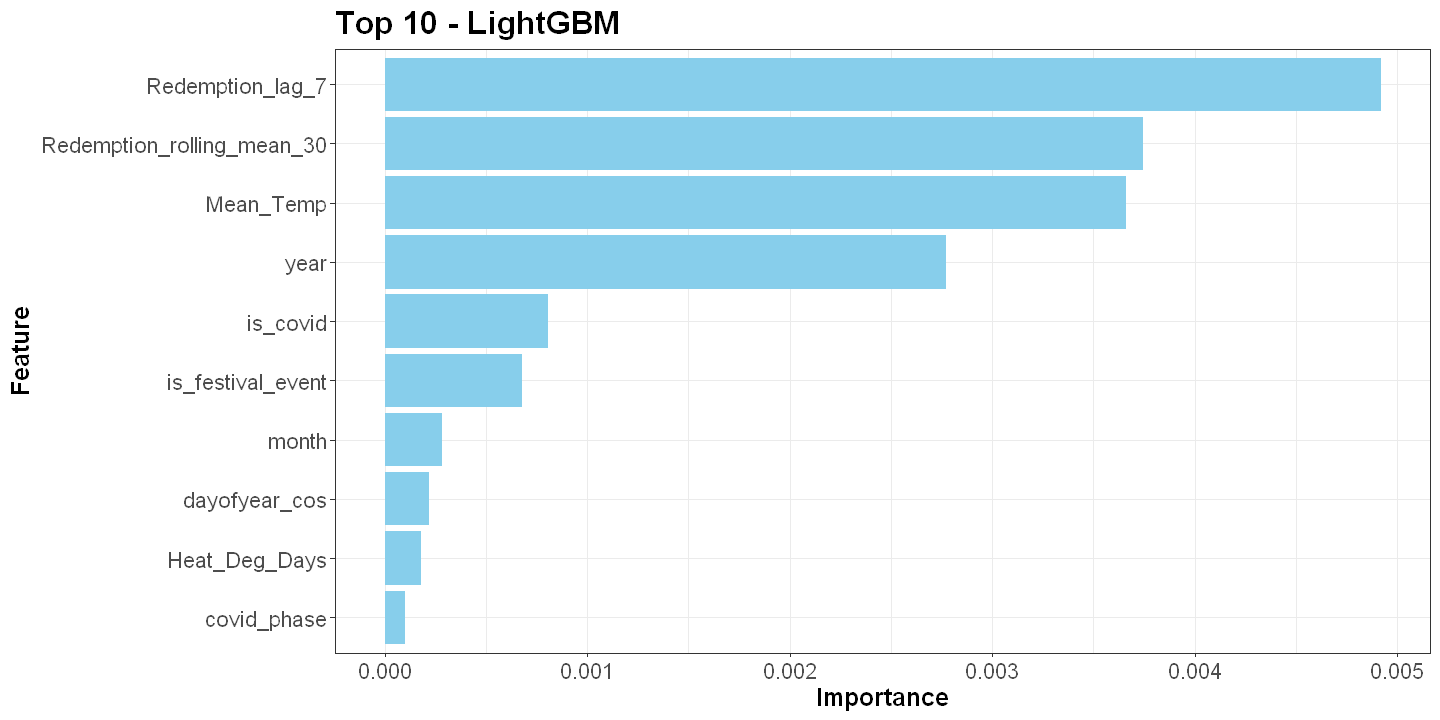

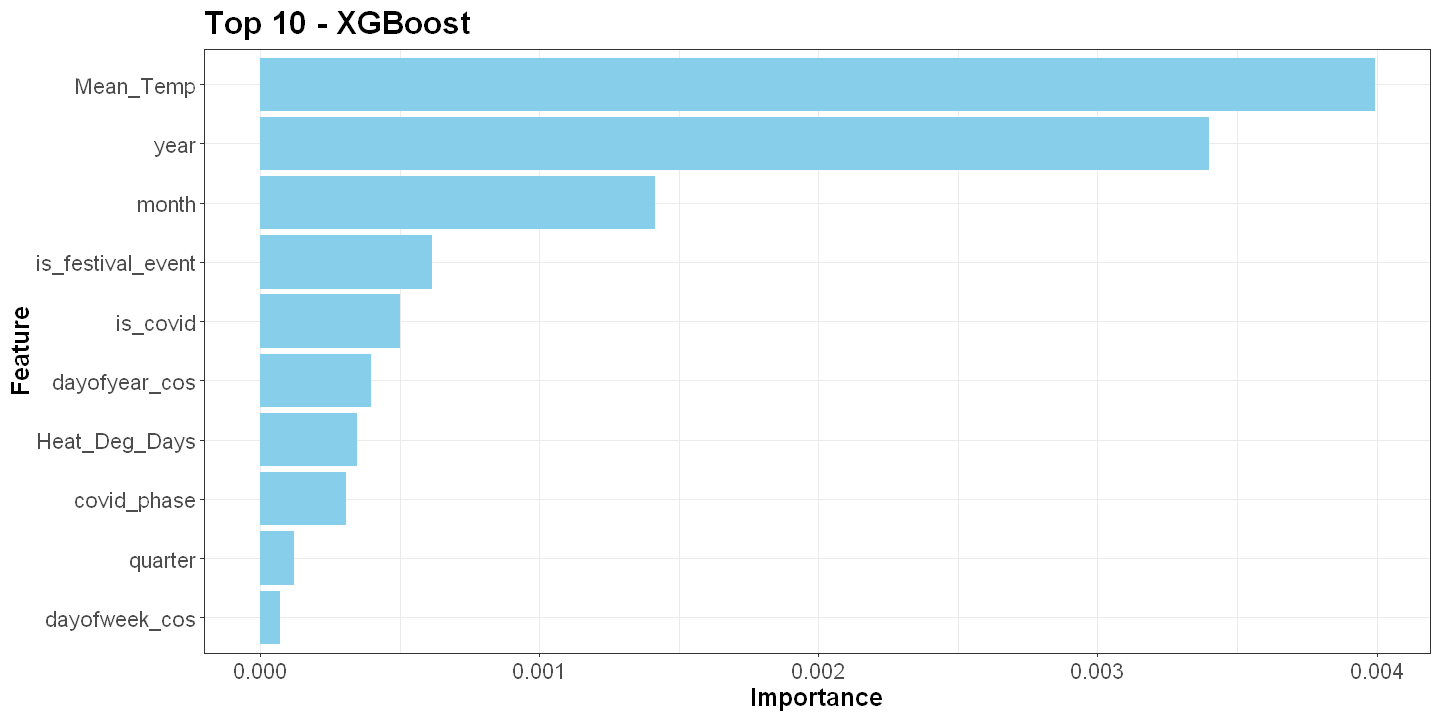

In [72]:
plot_feature_importance(sc_result2$importances)